#  필요 패키지 import

In [1]:
### 필요 패키지 import ###
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import cv2
import PIL
import matplotlib.pyplot as plt
import os

# 데이터 전처리

+ 기본으로 제공된 데이터
    + data_211116.zip (= AI 허브 : https://aihub.or.kr/aidata/34112)
    + 실차 데이터.zip (실제 차량으로 수집한 데이터)
+ 실차데이터는 실제 Test데이터와 비슷한 점을 고려해 Validation Dataset으로 사용
    + 물론 data_211116.zip의 데이터와 조금 섞을 예정
    + 섞는건 코드로 안하고 그냥 windows의 파일탐색기로 그냥 무작위로 옮김
+ 이미지 데이터를 살펴보던 중
    + 데이터 샘플들이 모두 애매한 상태임 (특히, pothole와 filled)
    + pothole 데이터가 가장 적어서 인터넷을 통해 추가적인 이미지를 다운받음
        + Kaggle 사이트를 이용함
+ 따라서 실차데이터를 기반으로한 Validation 데이터를 준비하고
    + train data는 data_211116.zip 데이터를 사용함
    + 적당히 섞었음(실차:201116 = 8:2)
    + 실차데이터의 대략 20장의 이미지는 data_211116 데이터와 교환

### 정리
+ Train_Data.EGG
    + 대략 2만 3개 가량의 이미지 데이터
    + 해당 데이터를 320x320의 크기로 변경하는 전처리 작업을 수행할 예정
+ validate_Data.zip
    + 300개의 검증 데이터
    + 해당 데이터 또한 320x320의 크기로 변경해서 검증에 사용할 예정

In [2]:
### /content/drive/Mydrive/빅데이터및AI 경로에서 모든 데이터의 경로를 저장하는 함수 ### 
def get_file_path(my_list,base_path):
    return [base_path+file for file in my_list]

In [ ]:
### 샘플데이터 1(Open 데이터) ###
stone_train = get_file_path(os.listdir('Train_Data/stone'), 'Train_Data/stone/')
pothole_train = get_file_path(os.listdir('Train_Data/pothole'), 'Train_Data/pothole/')
filled_train = get_file_path(os.listdir('Train_Data/filled'), 'Train_Data/filled/')

print(len(stone_train), len(pothole_train) ,len(filled_train))

9175 7426 6791


In [ ]:
### 샘플데이터 2(실차 데이터) ###
stone_valid = get_file_path(os.listdir('validate_Data/stone'), 'validate_Data/stone/')
pothole_valid = get_file_path(os.listdir('validate_Data/pothole'), 'validate_Data/pothole/')
filled_valid = get_file_path(os.listdir('validate_Data/filled'), 'validate_Data/filled/')

print(len(stone_valid), len(pothole_valid) ,len(filled_valid))

101 101 101


101개 이유는 desktop.ini이라는 이상한 파일이 들어와 있음....?

### Train Data 전처리

In [ ]:
def pre_processing(file_paths, label, base_path):
    global file_summary, idx
    
    for path in file_paths:
        print(path)
        if path[-3:] == 'ini':
            continue
        src = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(src, dsize=(320,320), interpolation=cv2.INTER_AREA)

        img_path = "{}/Image_{}.png".format(base_path,idx+1)
        cv2.imwrite(img_path, img)

        file_summary['file_path'].append(img_path)
        file_summary['label'].append(label)

        idx += 1

In [ ]:
# 전처리한 데이터의 정보를 저장하는 dict
file_summary = {
    "file_path" : [],
    "label" : []
}
idx = 0                        # img의 ID
base_path = "Datasets_Train"

pre_processing(stone_train, 0, base_path)
pre_processing(pothole_train, 1, base_path)
pre_processing(filled_train, 2, base_path)
pd.DataFrame(file_summary)

Train_Data/stone/101490.png
Train_Data/stone/10170.png
Train_Data/stone/102100.png
Train_Data/stone/102810.png
Train_Data/stone/103800.png
Train_Data/stone/107790.png
Train_Data/stone/107990.png
Train_Data/stone/108780.png
Train_Data/stone/1240.png
Train_Data/stone/2210.png
Train_Data/stone/2690.png
Train_Data/stone/3430.png
Train_Data/stone/3920.png
Train_Data/stone/42620.png
Train_Data/stone/48150.png
Train_Data/stone/55160.png
Train_Data/stone/58510.png
Train_Data/stone/73780.png
Train_Data/stone/76980.png
Train_Data/stone/89850.png
Train_Data/stone/90410.png
Train_Data/stone/92590.png
Train_Data/stone/92930.png
Train_Data/stone/9390.png
Train_Data/stone/94640.png
Train_Data/stone/desktop.ini
Train_Data/stone/stone_0_1046.png
Train_Data/stone/stone_0_1112.png
Train_Data/stone/stone_0_1128.png
Train_Data/stone/stone_0_1130.png
Train_Data/stone/stone_0_1166.png
Train_Data/stone/stone_0_1167.png
Train_Data/stone/stone_0_1173.png
Train_Data/stone/stone_0_1209.png
Train_Data/stone/stone_

Train_Data/stone/stone_0_8402.png
Train_Data/stone/stone_0_8464.png
Train_Data/stone/stone_0_8465.png
Train_Data/stone/stone_0_8505.png
Train_Data/stone/stone_0_8528.png
Train_Data/stone/stone_0_8587.png
Train_Data/stone/stone_0_8590.png
Train_Data/stone/stone_0_8612.png
Train_Data/stone/stone_0_8632.png
Train_Data/stone/stone_0_8688.png
Train_Data/stone/stone_0_8716.png
Train_Data/stone/stone_0_8747.png
Train_Data/stone/stone_0_8770.png
Train_Data/stone/stone_0_8798.png
Train_Data/stone/stone_0_8857.png
Train_Data/stone/stone_0_8863.png
Train_Data/stone/stone_0_89.png
Train_Data/stone/stone_0_8901.png
Train_Data/stone/stone_0_8905.png
Train_Data/stone/stone_0_8906.png
Train_Data/stone/stone_0_8917.png
Train_Data/stone/stone_0_8949.png
Train_Data/stone/stone_0_8982.png
Train_Data/stone/stone_0_899.png
Train_Data/stone/stone_0_9093.png
Train_Data/stone/stone_0_9114.png
Train_Data/stone/stone_0_9143.png
Train_Data/stone/stone_0_9144.png
Train_Data/stone/stone_0_9178.png
Train_Data/stone/

Train_Data/stone/V0F_HY_1299_20201228_145220_E_CH1_Busan_Sun_Mainroad_Day_18075.png
Train_Data/stone/V0F_HY_1303_20210107_101928_E_CH0_Busan_Sun_Mainroad_Day_34479.png
Train_Data/stone/V0F_HY_1315_20201117_115200_E_CH1_Busan_Sun_Mainroad_Day_32783.png
Train_Data/stone/V0F_HY_1325_20201007_155530_N_CH0_Busan_Sun_Mainroad_Day_73134.png
Train_Data/stone/V0F_HY_1387_20201228_144457_E_CH1_Busan_Sun_Mainroad_Day_19647.png
Train_Data/stone/V0F_HY_1390_20201228_144358_N_CH2_Busan_Sun_Mainroad_Day_46017.png
Train_Data/stone/V0F_HY_1425_20201228_145220_E_CH2_Busan_Sun_Mainroad_Day_19321.png
Train_Data/stone/V0F_HY_1485_20210104_135739_E_CH0_Busan_Sun_Mainroad_Day_80595.png
Train_Data/stone/V0F_HY_1546_20201022_112342_E_CH0_Busan_Sun_Mainroad_Day_45925.png
Train_Data/stone/V0F_HY_1546_20201223_133717_E_CH2_Busan_Sun_Mainroad_Day_42389.png
Train_Data/stone/V0F_HY_1550_20201214_112222_E_CH1_Busan_Sun_Mainroad_Day_57582.png
Train_Data/stone/V0F_HY_1587_20201228_144358_N_CH2_Busan_Sun_Mainroad_Day_22

Train_Data/stone/V0F_HY_3545_20201228_095019_N_CH2_Busan_Sun_Mainroad_Sunrise_05465.png
Train_Data/stone/V0F_HY_3546_20201228_144457_E_CH2_Busan_Sun_Mainroad_Day_45474.png
Train_Data/stone/V0F_HY_3571_20201228_152349_N_CH2_Busan_Sun_Mainroad_Day_65683.png
Train_Data/stone/V0F_HY_3597_20201228_143713_E_CH1_Busan_Sun_Mainroad_Day_88620.png
Train_Data/stone/V0F_HY_3599_20201228_143713_N_CH2_Busan_Sun_Mainroad_Day_30206.png
Train_Data/stone/V0F_HY_3604_20201223_164344_N_CH2_Busan_Sun_Mainroad_Sunset_32047.png
Train_Data/stone/V0F_HY_3604_20201228_150120_N_CH1_Busan_Sun_Mainroad_Day_31937.png
Train_Data/stone/V0F_HY_3612_20201228_150120_N_CH1_Busan_Sun_Mainroad_Day_50230.png
Train_Data/stone/V0F_HY_3631_20201223_133717_E_CH2_Busan_Sun_Mainroad_Day_78948.png
Train_Data/stone/V0F_HY_3648_20201228_150220_N_CH1_Busan_Sun_Mainroad_Day_50976.png
Train_Data/stone/V0F_HY_3652_20201228_105733_N_CH1_Busan_Sun_Mainroad_Day_30234.png
Train_Data/stone/V0F_HY_3693_20201228_145220_E_CH2_Busan_Sun_Mainroad

Train_Data/stone/V0F_HY_5142_20201228_143814_N_CH2_Busan_Sun_Mainroad_Day_23887.png
Train_Data/stone/V0F_HY_5148_20201228_105834_N_CH2_Busan_Sun_Mainroad_Day_03700.png
Train_Data/stone/V0F_HY_5158_20201228_143713_N_CH1_Busan_Sun_Mainroad_Day_11579.png
Train_Data/stone/V0F_HY_5160_20210104_092214_E_CH1_Busan_Sun_Mainroad_Sunset_70900.png
Train_Data/stone/V0F_HY_5162_20201223_133717_E_CH2_Busan_Sun_Mainroad_Day_04021.png
Train_Data/stone/V0F_HY_5165_20201214_113022_E_CH0_Busan_Sun_Mainroad_Day_09679.png
Train_Data/stone/V0F_HY_5171_20201228_095847_N_CH1_Busan_Sun_Mainroad_Sunrise_29239.png
Train_Data/stone/V0F_HY_5171_20210107_103029_N_CH2_Busan_Sun_Mainroad_Day_83250.png
Train_Data/stone/V0F_HY_5199_20210104_092214_E_CH0_Busan_Sun_Mainroad_Sunset_58663.png
Train_Data/stone/V0F_HY_5201_20201228_150220_N_CH1_Busan_Sun_Mainroad_Day_67256.png
Train_Data/stone/V0F_HY_5208_20201228_144258_N_CH2_Busan_Sun_Mainroad_Day_75952.png
Train_Data/stone/V0F_HY_5219_20201228_144457_N_CH2_Busan_Sun_Mainr

Train_Data/stone/V0F_HY_6654_20201228_150120_N_CH1_Busan_Sun_Mainroad_Day_02935.png
Train_Data/stone/V0F_HY_6665_20201228_143713_N_CH1_Busan_Sun_Mainroad_Day_56909.png
Train_Data/stone/V0F_HY_6667_20210113_142409_N_CH2_Busan_Sun_Mainroad_Day_32112.png
Train_Data/stone/V0F_HY_6687_20201228_145020_N_CH1_Busan_Sun_Mainroad_Day_84161.png
Train_Data/stone/V0F_HY_6692_20201214_113022_E_CH1_Busan_Sun_Mainroad_Day_60691.png
Train_Data/stone/V0F_HY_6711_20210104_092214_N_CH0_Busan_Sun_Mainroad_Sunset_57468.png
Train_Data/stone/V0F_HY_6723_20201228_144457_E_CH2_Busan_Sun_Mainroad_Day_26559.png
Train_Data/stone/V0F_HY_6731_20201228_143713_N_CH2_Busan_Sun_Mainroad_Day_03074.png
Train_Data/stone/V0F_HY_6742_20210111_103121_E_CH2_Busan_Sun_Mainroad_Day_10299.png
Train_Data/stone/V0F_HY_6747_20201228_093712_E_CH1_Busan_Sun_Mainroad_Sunrise_06772.png
Train_Data/stone/V0F_HY_6761_20201228_145220_E_CH2_Busan_Sun_Mainroad_Day_49623.png
Train_Data/stone/V0F_HY_6766_20210104_091814_E_CH2_Busan_Sun_Mainroad

Train_Data/stone/V0F_HY_7868_20201228_144258_N_CH1_Busan_Sun_Mainroad_Day_18688.png
Train_Data/stone/V0F_HY_7874_20210107_085757_E_CH0_Busan_Snow_Mainroad_Sunrise_08993.png
Train_Data/stone/V0F_HY_7893_20201228_095847_N_CH2_Busan_Sun_Mainroad_Sunrise_27053.png
Train_Data/stone/V0F_HY_7897_20201228_144358_N_CH2_Busan_Sun_Mainroad_Day_07742.png
Train_Data/stone/V0F_HY_7900_20210104_091814_N_CH2_Busan_Sun_Mainroad_Sunset_71092.png
Train_Data/stone/V0F_HY_7909_20201122_121832_E_CH0_Busan_Rain_Mainroad_Day_48613.png
Train_Data/stone/V0F_HY_7914_20201228_143713_N_CH1_Busan_Sun_Mainroad_Day_82494.png
Train_Data/stone/V0F_HY_7917_20201228_152449_N_CH2_Busan_Sun_Mainroad_Day_41021.png
Train_Data/stone/V0F_HY_7922_20201228_150020_E_CH1_Busan_Sun_Mainroad_Day_73604.png
Train_Data/stone/V0F_HY_7936_20201228_110133_N_CH1_Busan_Sun_Mainroad_Day_60148.png
Train_Data/stone/V0F_HY_7947_20201228_143713_N_CH2_Busan_Sun_Mainroad_Day_79091.png
Train_Data/stone/V0F_HY_7964_20201228_150020_N_CH1_Busan_Sun_Ma

Train_Data/stone/V0F_HY_9503_20201119_155039_E_CH1_Busan_Cloud_Mainroad_Day_48210.png
Train_Data/stone/V0F_HY_9536_20201228_144358_N_CH1_Busan_Sun_Mainroad_Day_67119.png
Train_Data/stone/V0F_HY_9538_20201228_110133_E_CH2_Busan_Sun_Mainroad_Day_89996.png
Train_Data/stone/V0F_HY_9539_20201228_143713_N_CH1_Busan_Sun_Mainroad_Day_36581.png
Train_Data/stone/V0F_HY_9560_20201228_104933_N_CH1_Busan_Sun_Mainroad_Day_24891.png
Train_Data/stone/V0F_HY_9595_20201228_095947_N_CH2_Busan_Sun_Mainroad_Sunrise_12684.png
Train_Data/stone/V0F_HY_9635_20201228_144457_E_CH2_Busan_Sun_Mainroad_Day_66012.png
Train_Data/stone/V0F_HY_9684_20201228_105834_N_CH2_Busan_Sun_Mainroad_Day_11109.png
Train_Data/stone/V0F_HY_9685_20201214_112222_E_CH1_Busan_Sun_Mainroad_Day_44469.png
Train_Data/stone/V0F_HY_9693_20201228_145220_E_CH1_Busan_Sun_Mainroad_Day_76192.png
Train_Data/stone/V0F_HY_9704_20201228_145220_E_CH1_Busan_Sun_Mainroad_Day_93729.png
Train_Data/stone/V0F_HY_9710_20201228_143113_N_CH2_Busan_Sun_Mainroad_

Train_Data/stone/V1F_HY_0799_20201230_130809_N_CH0_Busan_Sun_Mainroad_Day_25165.png
Train_Data/stone/V1F_HY_0817_20201230_131109_N_CH1_Busan_Sun_Mainroad_Day_70487.png
Train_Data/stone/V1F_HY_0845_20201230_103414_N_CH1_Busan_Sun_Mainroad_Day_37231.png
Train_Data/stone/V1F_HY_0861_20201230_103314_E_CH0_Busan_Sun_Mainroad_Day_99879.png
Train_Data/stone/V1F_HY_0862_20201230_140018_E_CH2_Busan_Sun_Mainroad_Day_79572.png
Train_Data/stone/V1F_HY_0875_20201230_140018_E_CH0_Busan_Sun_Mainroad_Day_84180.png
Train_Data/stone/V1F_HY_0882_20201230_103314_N_CH1_Busan_Sun_Mainroad_Day_07206.png
Train_Data/stone/V1F_HY_0892_20201230_140018_N_CH1_Busan_Sun_Mainroad_Day_93578.png
Train_Data/stone/V1F_HY_0939_20201230_130809_N_CH1_Busan_Sun_Mainroad_Day_25983.png
Train_Data/stone/V1F_HY_0944_20201230_131958_N_CH2_Busan_Sun_Mainroad_Day_60616.png
Train_Data/stone/V1F_HY_0946_20201230_102915_N_CH1_Busan_Sun_Mainroad_Day_07715.png
Train_Data/stone/V1F_HY_0947_20201230_140018_E_CH0_Busan_Sun_Mainroad_Day_09

Train_Data/stone/V1F_HY_1186_20210104_155659_E_CH0_Busan_Sun_Mainroad_Sunset_51873.png
Train_Data/stone/V1F_HY_1187_20210104_161145_N_CH0_Busan_Sun_Mainroad_Sunset_12792.png
Train_Data/stone/V1F_HY_1188_20201230_140919_E_CH0_Busan_Sun_Mainroad_Day_24894.png
Train_Data/stone/V1F_HY_1191_20210106_083937_E_CH0_Busan_Sun_Mainroad_Sunrise_65037.png
Train_Data/stone/V1F_HY_1197_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_18975.png
Train_Data/stone/V1F_HY_1198_20210106_093747_E_CH0_Busan_Sun_Mainroad_Sunrise_11328.png
Train_Data/stone/V1F_HY_1199_20210105_084553_E_CH0_Busan_Sun_Mainroad_Sunrise_05019.png
Train_Data/stone/V1F_HY_1200_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_26047.png
Train_Data/stone/V1F_HY_1202_20201224_133132_E_CH0_Busan_Sun_Mainroad_Day_67508.png
Train_Data/stone/V1F_HY_1202_20210104_155358_E_CH0_Busan_Sun_Mainroad_Sunset_85258.png
Train_Data/stone/V1F_HY_1204_20210104_162428_N_CH2_Busan_Sun_Mainroad_Sunset_83468.png
Train_Data/stone/V1F_HY_1210_20210104_161845_

Train_Data/stone/V1F_HY_1410_20201221_142705_N_CH0_Busan_Sun_Mainroad_Day_83761.png
Train_Data/stone/V1F_HY_1411_20210105_085450_N_CH0_Busan_Sun_Mainroad_Sunrise_30109.png
Train_Data/stone/V1F_HY_1412_20210104_161445_E_CH0_Busan_Sun_Mainroad_Sunset_52510.png
Train_Data/stone/V1F_HY_1415_20210104_155659_E_CH0_Busan_Sun_Mainroad_Sunset_82120.png
Train_Data/stone/V1F_HY_1416_20210105_093441_N_CH2_Busan_Sun_Mainroad_Sunrise_56112.png
Train_Data/stone/V1F_HY_1418_20201221_160130_E_CH0_Busan_Sun_Mainroad_Day_78191.png
Train_Data/stone/V1F_HY_1420_20201221_163531_N_CH0_Busan_Sun_Mainroad_Day_53369.png
Train_Data/stone/V1F_HY_1423_20210106_093447_N_CH2_Busan_Sun_Mainroad_Sunrise_08682.png
Train_Data/stone/V1F_HY_1425_20210106_083837_N_CH0_Busan_Sun_Mainroad_Sunrise_63138.png
Train_Data/stone/V1F_HY_1426_20210104_161244_N_CH2_Busan_Sun_Mainroad_Sunset_53482.png
Train_Data/stone/V1F_HY_1426_20210106_082637_N_CH2_Busan_Sun_Mainroad_Sunrise_62667.png
Train_Data/stone/V1F_HY_1427_20210104_155358_N_

Train_Data/stone/V1F_HY_1580_20210106_083437_E_CH0_Busan_Sun_Mainroad_Sunrise_85051.png
Train_Data/stone/V1F_HY_1582_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_04577.png
Train_Data/stone/V1F_HY_1584_20201221_151801_N_CH0_Busan_Sun_Mainroad_Day_36659.png
Train_Data/stone/V1F_HY_1587_20201230_103414_N_CH1_Busan_Sun_Mainroad_Day_31968.png
Train_Data/stone/V1F_HY_1588_20210104_163838_E_CH0_Busan_Sun_Mainroad_Sunset_08109.png
Train_Data/stone/V1F_HY_1589_20210104_155358_E_CH2_Busan_Sun_Mainroad_Sunset_71614.png
Train_Data/stone/V1F_HY_1590_20210104_161145_N_CH0_Busan_Sun_Mainroad_Sunset_60919.png
Train_Data/stone/V1F_HY_1592_20210106_083137_N_CH0_Busan_Sun_Mainroad_Sunrise_07988.png
Train_Data/stone/V1F_HY_1595_20210106_093447_N_CH2_Busan_Sun_Mainroad_Sunrise_43792.png
Train_Data/stone/V1F_HY_1596_20210105_093441_N_CH0_Busan_Sun_Mainroad_Sunrise_72554.png
Train_Data/stone/V1F_HY_1597_20201230_140418_E_CH1_Busan_Sun_Mainroad_Day_52930.png
Train_Data/stone/V1F_HY_1600_20210104_155059_N_

Train_Data/stone/V1F_HY_1800_20210104_154758_N_CH0_Busan_Sun_Mainroad_Sunset_40008.png
Train_Data/stone/V1F_HY_1801_20201230_130809_N_CH1_Busan_Sun_Mainroad_Day_49037.png
Train_Data/stone/V1F_HY_1805_20201221_140736_E_CH0_Busan_Sun_Mainroad_Day_71332.png
Train_Data/stone/V1F_HY_1806_20210104_154758_N_CH0_Busan_Sun_Mainroad_Sunset_57196.png
Train_Data/stone/V1F_HY_1810_20210104_154558_N_CH2_Busan_Sun_Mainroad_Sunset_29324.png
Train_Data/stone/V1F_HY_1812_20210106_082637_N_CH2_Busan_Sun_Mainroad_Sunrise_94774.png
Train_Data/stone/V1F_HY_1813_20201230_131958_N_CH0_Busan_Sun_Mainroad_Day_69540.png
Train_Data/stone/V1F_HY_1814_20210104_155358_N_CH2_Busan_Sun_Mainroad_Sunset_17960.png
Train_Data/stone/V1F_HY_1815_20210104_154358_N_CH0_Busan_Sun_Mainroad_Sunset_43023.png
Train_Data/stone/V1F_HY_1816_20210104_161745_E_CH0_Busan_Sun_Mainroad_Sunset_29821.png
Train_Data/stone/V1F_HY_1818_20201230_131558_N_CH1_Busan_Sun_Mainroad_Day_73903.png
Train_Data/stone/V1F_HY_1823_20201221_114550_N_CH0_Bus

Train_Data/stone/V1F_HY_2015_20210106_083137_N_CH0_Busan_Sun_Mainroad_Sunrise_35804.png
Train_Data/stone/V1F_HY_2016_20201230_131958_E_CH2_Busan_Sun_Mainroad_Day_71101.png
Train_Data/stone/V1F_HY_2019_20210104_161745_N_CH0_Busan_Sun_Mainroad_Sunset_10095.png
Train_Data/stone/V1F_HY_2025_20210104_161244_E_CH0_Busan_Sun_Mainroad_Sunset_82114.png
Train_Data/stone/V1F_HY_2027_20210104_154758_N_CH0_Busan_Sun_Mainroad_Sunset_17626.png
Train_Data/stone/V1F_HY_2039_20210105_084553_E_CH0_Busan_Sun_Mainroad_Sunrise_69559.png
Train_Data/stone/V1F_HY_2040_20210105_094641_N_CH2_Busan_Sun_Mainroad_Sunrise_32530.png
Train_Data/stone/V1F_HY_2042_20210104_161745_E_CH0_Busan_Sun_Mainroad_Sunset_94281.png
Train_Data/stone/V1F_HY_2043_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_75928.png
Train_Data/stone/V1F_HY_2048_20210104_161845_E_CH2_Busan_Sun_Mainroad_Sunset_56195.png
Train_Data/stone/V1F_HY_2050_20210106_092946_N_CH2_Busan_Sun_Mainroad_Sunrise_15244.png
Train_Data/stone/V1F_HY_2053_20201230_140

Train_Data/stone/V1F_HY_2230_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_22927.png
Train_Data/stone/V1F_HY_2231_20201230_102515_N_CH0_Busan_Sun_Mainroad_Day_95937.png
Train_Data/stone/V1F_HY_2232_20210106_093347_E_CH2_Busan_Sun_Mainroad_Sunrise_79642.png
Train_Data/stone/V1F_HY_2234_20201230_140418_N_CH1_Busan_Sun_Mainroad_Day_21294.png
Train_Data/stone/V1F_HY_2234_20210105_085650_N_CH0_Busan_Sun_Mainroad_Sunrise_16233.png
Train_Data/stone/V1F_HY_2235_20210105_094141_N_CH0_Busan_Sun_Mainroad_Sunrise_70341.png
Train_Data/stone/V1F_HY_2236_20201230_102515_E_CH1_Busan_Sun_Mainroad_Day_05500.png
Train_Data/stone/V1F_HY_2236_20210104_154558_N_CH2_Busan_Sun_Mainroad_Sunset_78706.png
Train_Data/stone/V1F_HY_2240_20201221_151100_N_CH0_Busan_Sun_Mainroad_Day_82106.png
Train_Data/stone/V1F_HY_2241_20201230_131958_N_CH1_Busan_Sun_Mainroad_Day_88698.png
Train_Data/stone/V1F_HY_2243_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_78132.png
Train_Data/stone/V1F_HY_2244_20210106_083137_N_CH2_Bus

Train_Data/stone/V1F_HY_2449_20210104_154458_E_CH0_Busan_Sun_Mainroad_Sunset_22479.png
Train_Data/stone/V1F_HY_2451_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_49960.png
Train_Data/stone/V1F_HY_2454_20210105_092841_N_CH0_Busan_Sun_Mainroad_Sunrise_92207.png
Train_Data/stone/V1F_HY_2463_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_45624.png
Train_Data/stone/V1F_HY_2469_20210104_155059_N_CH0_Busan_Sun_Mainroad_Sunset_41489.png
Train_Data/stone/V1F_HY_2470_20210104_161145_N_CH0_Busan_Sun_Mainroad_Sunset_06441.png
Train_Data/stone/V1F_HY_2471_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_69641.png
Train_Data/stone/V1F_HY_2473_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_38823.png
Train_Data/stone/V1F_HY_2474_20210106_092946_N_CH2_Busan_Sun_Mainroad_Sunrise_10705.png
Train_Data/stone/V1F_HY_2477_20210106_082637_N_CH2_Busan_Sun_Mainroad_Sunrise_08533.png
Train_Data/stone/V1F_HY_2478_20201221_110620_E_CH0_Busan_Sun_Mainroad_Day_31142.png
Train_Data/stone/V1F_HY_2480_20210104_1

Train_Data/stone/V1F_HY_2654_20210104_155659_E_CH2_Busan_Sun_Mainroad_Sunset_57739.png
Train_Data/stone/V1F_HY_2666_20201230_140018_N_CH2_Busan_Sun_Mainroad_Day_30966.png
Train_Data/stone/V1F_HY_2667_20201221_150800_E_CH0_Busan_Sun_Mainroad_Day_87788.png
Train_Data/stone/V1F_HY_2668_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_95456.png
Train_Data/stone/V1F_HY_2669_20210104_163538_N_CH0_Busan_Sun_Mainroad_Sunset_68473.png
Train_Data/stone/V1F_HY_2670_20201230_131958_N_CH2_Busan_Sun_Mainroad_Day_61354.png
Train_Data/stone/V1F_HY_2670_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_40986.png
Train_Data/stone/V1F_HY_2672_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_46196.png
Train_Data/stone/V1F_HY_2686_20210106_083137_E_CH0_Busan_Sun_Mainroad_Sunrise_86797.png
Train_Data/stone/V1F_HY_2688_20210104_154458_N_CH0_Busan_Sun_Mainroad_Sunset_01674.png
Train_Data/stone/V1F_HY_2688_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_06229.png
Train_Data/stone/V1F_HY_2689_20210106_083937_N_C

Train_Data/stone/V1F_HY_2887_20201230_141019_E_CH2_Busan_Sun_Mainroad_Day_66234.png
Train_Data/stone/V1F_HY_2890_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_35033.png
Train_Data/stone/V1F_HY_2891_20210106_094247_N_CH2_Busan_Sun_Mainroad_Sunrise_91908.png
Train_Data/stone/V1F_HY_2892_20210106_083137_E_CH0_Busan_Sun_Mainroad_Sunrise_08567.png
Train_Data/stone/V1F_HY_2895_20201221_143922_N_CH0_Busan_Sun_Mainroad_Day_99464.png
Train_Data/stone/V1F_HY_2897_20210104_154659_N_CH2_Busan_Sun_Mainroad_Sunset_24216.png
Train_Data/stone/V1F_HY_2897_20210105_085150_N_CH0_Busan_Sun_Mainroad_Sunrise_90074.png
Train_Data/stone/V1F_HY_2898_20210105_094141_N_CH0_Busan_Sun_Mainroad_Sunrise_59576.png
Train_Data/stone/V1F_HY_2901_20210106_082637_E_CH2_Busan_Sun_Mainroad_Sunrise_76184.png
Train_Data/stone/V1F_HY_2902_20201221_151801_N_CH0_Busan_Sun_Mainroad_Day_81881.png
Train_Data/stone/V1F_HY_2904_20210106_083937_E_CH2_Busan_Sun_Mainroad_Sunrise_11785.png
Train_Data/stone/V1F_HY_2905_20210106_093447_E

Train_Data/stone/V1F_HY_3111_20201221_144023_N_CH0_Busan_Sun_Mainroad_Day_90391.png
Train_Data/stone/V1F_HY_3115_20210104_161845_E_CH0_Busan_Sun_Mainroad_Sunset_30031.png
Train_Data/stone/V1F_HY_3115_20210105_093541_N_CH2_Busan_Sun_Mainroad_Sunrise_28753.png
Train_Data/stone/V1F_HY_3116_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_97390.png
Train_Data/stone/V1F_HY_3118_20210105_093441_N_CH0_Busan_Sun_Mainroad_Sunrise_98605.png
Train_Data/stone/V1F_HY_3121_20201221_160530_E_CH0_Busan_Sun_Mainroad_Day_91297.png
Train_Data/stone/V1F_HY_3122_20201221_142204_N_CH0_Busan_Sun_Mainroad_Day_90292.png
Train_Data/stone/V1F_HY_3123_20201230_135718_E_CH1_Busan_Sun_Mainroad_Day_14327.png
Train_Data/stone/V1F_HY_3125_20201221_110620_N_CH0_Busan_Sun_Mainroad_Day_59445.png
Train_Data/stone/V1F_HY_3127_20201224_145901_E_CH0_Busan_Sun_Mainroad_Day_75579.png
Train_Data/stone/V1F_HY_3129_20210104_161545_N_CH2_Busan_Sun_Mainroad_Sunset_55094.png
Train_Data/stone/V1F_HY_3131_20210106_082637_E_CH2_Busan_Su

Train_Data/stone/V1F_HY_3318_20201221_151801_N_CH0_Busan_Sun_Mainroad_Day_50562.png
Train_Data/stone/V1F_HY_3321_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_08329.png
Train_Data/stone/V1F_HY_3322_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_04370.png
Train_Data/stone/V1F_HY_3324_20210106_093447_E_CH2_Busan_Sun_Mainroad_Sunrise_91341.png
Train_Data/stone/V1F_HY_3332_20210104_154358_E_CH0_Busan_Sun_Mainroad_Sunset_92651.png
Train_Data/stone/V1F_HY_3337_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_08098.png
Train_Data/stone/V1F_HY_3337_20210105_094141_N_CH2_Busan_Sun_Mainroad_Sunrise_89099.png
Train_Data/stone/V1F_HY_3338_20201221_143305_E_CH0_Busan_Sun_Mainroad_Day_18148.png
Train_Data/stone/V1F_HY_3339_20210105_092841_N_CH2_Busan_Sun_Mainroad_Sunrise_19830.png
Train_Data/stone/V1F_HY_3344_20201221_134309_E_CH0_Busan_Sun_Mainroad_Day_42293.png
Train_Data/stone/V1F_HY_3345_20210104_154659_N_CH2_Busan_Sun_Mainroad_Sunset_09521.png
Train_Data/stone/V1F_HY_3347_20210106_082737_N_

Train_Data/stone/V1F_HY_3534_20210105_093541_E_CH2_Busan_Sun_Mainroad_Sunrise_46866.png
Train_Data/stone/V1F_HY_3536_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_01382.png
Train_Data/stone/V1F_HY_3538_20201224_135532_E_CH0_Busan_Sun_Mainroad_Day_89911.png
Train_Data/stone/V1F_HY_3541_20210105_093441_N_CH2_Busan_Sun_Mainroad_Sunrise_30091.png
Train_Data/stone/V1F_HY_3543_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_10377.png
Train_Data/stone/V1F_HY_3544_20210104_155659_N_CH2_Busan_Sun_Mainroad_Sunset_07788.png
Train_Data/stone/V1F_HY_3544_20210105_084950_N_CH0_Busan_Sun_Mainroad_Sunrise_64881.png
Train_Data/stone/V1F_HY_3547_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_61977.png
Train_Data/stone/V1F_HY_3549_20210104_154458_E_CH2_Busan_Sun_Mainroad_Sunset_72368.png
Train_Data/stone/V1F_HY_3551_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_73898.png
Train_Data/stone/V1F_HY_3553_20201221_115135_N_CH0_Busan_Sun_Mainroad_Day_08847.png
Train_Data/stone/V1F_HY_3558_20201221_150800

Train_Data/stone/V1F_HY_3992_20210104_154458_E_CH0_Busan_Sun_Mainroad_Sunset_13035.png
Train_Data/stone/V1F_HY_3996_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_35677.png
Train_Data/stone/V1F_HY_4000_20210106_082637_N_CH2_Busan_Sun_Mainroad_Sunrise_58391.png
Train_Data/stone/V1F_HY_4001_20201230_140919_N_CH2_Busan_Sun_Mainroad_Day_15377.png
Train_Data/stone/V1F_HY_4006_20201224_150556_N_CH0_Busan_Sun_Mainroad_Day_54038.png
Train_Data/stone/V1F_HY_4006_20210104_161545_E_CH0_Busan_Sun_Mainroad_Sunset_91197.png
Train_Data/stone/V1F_HY_4006_20210105_085450_N_CH2_Busan_Sun_Mainroad_Sunrise_66063.png
Train_Data/stone/V1F_HY_4007_20210106_083837_E_CH0_Busan_Sun_Mainroad_Sunrise_84848.png
Train_Data/stone/V1F_HY_4009_20210104_155059_N_CH0_Busan_Sun_Mainroad_Sunset_26364.png
Train_Data/stone/V1F_HY_4010_20210106_083137_N_CH0_Busan_Sun_Mainroad_Sunrise_88462.png
Train_Data/stone/V1F_HY_4011_20210104_154558_N_CH0_Busan_Sun_Mainroad_Sunset_32375.png
Train_Data/stone/V1F_HY_4021_20201221_160530_

Train_Data/stone/V1F_HY_4226_20201221_140236_E_CH0_Busan_Sun_Mainroad_Day_62509.png
Train_Data/stone/V1F_HY_4231_20201221_140236_E_CH0_Busan_Sun_Mainroad_Day_38022.png
Train_Data/stone/V1F_HY_4231_20201224_132100_E_CH0_Busan_Sun_Mainroad_Day_88760.png
Train_Data/stone/V1F_HY_4239_20210104_154659_N_CH0_Busan_Sun_Mainroad_Sunset_83146.png
Train_Data/stone/V1F_HY_4243_20201221_160530_E_CH0_Busan_Sun_Mainroad_Day_18450.png
Train_Data/stone/V1F_HY_4244_20210104_155659_N_CH2_Busan_Sun_Mainroad_Sunset_89258.png
Train_Data/stone/V1F_HY_4244_20210105_093441_N_CH2_Busan_Sun_Mainroad_Sunrise_62641.png
Train_Data/stone/V1F_HY_4254_20210104_155659_N_CH0_Busan_Sun_Mainroad_Sunset_65225.png
Train_Data/stone/V1F_HY_4254_20210106_084337_E_CH0_Busan_Sun_Mainroad_Sunrise_38217.png
Train_Data/stone/V1F_HY_4259_20210104_161745_N_CH0_Busan_Sun_Mainroad_Sunset_77220.png
Train_Data/stone/V1F_HY_4263_20210106_094247_N_CH0_Busan_Sun_Mainroad_Sunrise_36756.png
Train_Data/stone/V1F_HY_4265_20201221_140236_E_CH0_B

Train_Data/stone/V1F_HY_4433_20210106_082637_N_CH2_Busan_Sun_Mainroad_Sunrise_31623.png
Train_Data/stone/V1F_HY_4436_20210104_161545_N_CH2_Busan_Sun_Mainroad_Sunset_23793.png
Train_Data/stone/V1F_HY_4439_20210106_094247_E_CH0_Busan_Sun_Mainroad_Sunrise_37354.png
Train_Data/stone/V1F_HY_4444_20201221_152301_N_CH0_Busan_Sun_Mainroad_Day_35323.png
Train_Data/stone/V1F_HY_4446_20201221_160630_N_CH0_Busan_Sun_Mainroad_Day_41217.png
Train_Data/stone/V1F_HY_4447_20201230_130809_N_CH0_Busan_Sun_Mainroad_Day_53060.png
Train_Data/stone/V1F_HY_4454_20201224_132100_E_CH0_Busan_Sun_Mainroad_Day_87464.png
Train_Data/stone/V1F_HY_4454_20210104_154558_N_CH2_Busan_Sun_Mainroad_Sunset_55707.png
Train_Data/stone/V1F_HY_4460_20201221_115135_E_CH0_Busan_Sun_Mainroad_Day_01257.png
Train_Data/stone/V1F_HY_4463_20210106_083237_N_CH0_Busan_Sun_Mainroad_Sunrise_18072.png
Train_Data/stone/V1F_HY_4465_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_31760.png
Train_Data/stone/V1F_HY_4466_20210105_085049_N_CH2_Busa

Train_Data/stone/V1F_HY_4638_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_28183.png
Train_Data/stone/V1F_HY_4638_20210106_082637_E_CH2_Busan_Sun_Mainroad_Sunrise_08180.png
Train_Data/stone/V1F_HY_4639_20210104_154458_N_CH2_Busan_Sun_Mainroad_Sunset_15406.png
Train_Data/stone/V1F_HY_4642_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_75106.png
Train_Data/stone/V1F_HY_4642_20210106_083937_E_CH2_Busan_Sun_Mainroad_Sunrise_54942.png
Train_Data/stone/V1F_HY_4643_20201230_131558_N_CH1_Busan_Sun_Mainroad_Day_03003.png
Train_Data/stone/V1F_HY_4645_20201224_134732_E_CH0_Busan_Sun_Mainroad_Day_18230.png
Train_Data/stone/V1F_HY_4645_20210105_085150_E_CH2_Busan_Sun_Mainroad_Sunrise_89384.png
Train_Data/stone/V1F_HY_4647_20201221_160630_N_CH0_Busan_Sun_Mainroad_Day_28546.png
Train_Data/stone/V1F_HY_4652_20201221_163531_N_CH0_Busan_Sun_Mainroad_Day_47085.png
Train_Data/stone/V1F_HY_4658_20201224_135532_N_CH0_Busan_Sun_Mainroad_Day_17404.png
Train_Data/stone/V1F_HY_4661_20210104_161445_E_CH0_Busa

Train_Data/stone/V1F_HY_4847_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_60089.png
Train_Data/stone/V1F_HY_4849_20210104_154659_N_CH2_Busan_Sun_Mainroad_Sunset_89827.png
Train_Data/stone/V1F_HY_4850_20210106_093347_E_CH0_Busan_Sun_Mainroad_Sunrise_37375.png
Train_Data/stone/V1F_HY_4851_20201221_155230_E_CH0_Busan_Sun_Mainroad_Day_37318.png
Train_Data/stone/V1F_HY_4853_20210104_161845_N_CH0_Busan_Sun_Mainroad_Sunset_18942.png
Train_Data/stone/V1F_HY_4856_20210104_155659_E_CH2_Busan_Sun_Mainroad_Sunset_44521.png
Train_Data/stone/V1F_HY_4858_20201221_160130_E_CH0_Busan_Sun_Mainroad_Day_60695.png
Train_Data/stone/V1F_HY_4858_20210104_163838_N_CH2_Busan_Sun_Mainroad_Sunset_62103.png
Train_Data/stone/V1F_HY_4859_20210105_094541_N_CH0_Busan_Sun_Mainroad_Sunrise_65754.png
Train_Data/stone/V1F_HY_4860_20201224_134832_N_CH0_Busan_Sun_Mainroad_Day_06337.png
Train_Data/stone/V1F_HY_4860_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_59490.png
Train_Data/stone/V1F_HY_4860_20210106_083937_N_CH2

Train_Data/stone/V1F_HY_5073_20210106_083437_E_CH2_Busan_Sun_Mainroad_Sunrise_92865.png
Train_Data/stone/V1F_HY_5074_20210104_154558_E_CH2_Busan_Sun_Mainroad_Sunset_58544.png
Train_Data/stone/V1F_HY_5080_20210105_084950_N_CH0_Busan_Sun_Mainroad_Sunrise_24600.png
Train_Data/stone/V1F_HY_5083_20210105_094141_N_CH0_Busan_Sun_Mainroad_Sunrise_88661.png
Train_Data/stone/V1F_HY_5084_20210106_084337_E_CH0_Busan_Sun_Mainroad_Sunrise_60999.png
Train_Data/stone/V1F_HY_5085_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_26259.png
Train_Data/stone/V1F_HY_5087_20210106_093347_N_CH0_Busan_Sun_Mainroad_Sunrise_96765.png
Train_Data/stone/V1F_HY_5089_20210104_161145_N_CH0_Busan_Sun_Mainroad_Sunset_70318.png
Train_Data/stone/V1F_HY_5090_20201230_130809_N_CH2_Busan_Sun_Mainroad_Day_85030.png
Train_Data/stone/V1F_HY_5092_20210105_085650_N_CH2_Busan_Sun_Mainroad_Sunrise_97209.png
Train_Data/stone/V1F_HY_5093_20210105_084553_E_CH2_Busan_Sun_Mainroad_Sunrise_16660.png
Train_Data/stone/V1F_HY_5093_20210106_0

Train_Data/stone/V1F_HY_5472_20210106_083437_N_CH0_Busan_Sun_Mainroad_Sunrise_65559.png
Train_Data/stone/V1F_HY_5474_20201221_160630_N_CH0_Busan_Sun_Mainroad_Day_14519.png
Train_Data/stone/V1F_HY_5476_20201230_140018_N_CH2_Busan_Sun_Mainroad_Day_97192.png
Train_Data/stone/V1F_HY_5480_20210104_154659_N_CH2_Busan_Sun_Mainroad_Sunset_59091.png
Train_Data/stone/V1F_HY_5481_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_20684.png
Train_Data/stone/V1F_HY_5487_20210104_161445_N_CH2_Busan_Sun_Mainroad_Sunset_31483.png
Train_Data/stone/V1F_HY_5489_20210104_163838_N_CH2_Busan_Sun_Mainroad_Sunset_28580.png
Train_Data/stone/V1F_HY_5491_20210104_163838_E_CH2_Busan_Sun_Mainroad_Sunset_93074.png
Train_Data/stone/V1F_HY_5493_20210104_154358_N_CH0_Busan_Sun_Mainroad_Sunset_85816.png
Train_Data/stone/V1F_HY_5497_20201221_135819_E_CH0_Busan_Sun_Mainroad_Day_83021.png
Train_Data/stone/V1F_HY_5497_20201230_102515_N_CH2_Busan_Sun_Mainroad_Day_45097.png
Train_Data/stone/V1F_HY_5498_20201230_130709_E_CH0_Bu

Train_Data/stone/V1F_HY_5674_20210104_161244_N_CH2_Busan_Sun_Mainroad_Sunset_17500.png
Train_Data/stone/V1F_HY_5676_20201221_134309_E_CH0_Busan_Sun_Mainroad_Day_23773.png
Train_Data/stone/V1F_HY_5678_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_27778.png
Train_Data/stone/V1F_HY_5679_20210104_155059_N_CH0_Busan_Sun_Mainroad_Sunset_93798.png
Train_Data/stone/V1F_HY_5683_20201221_114550_E_CH0_Busan_Sun_Mainroad_Day_52057.png
Train_Data/stone/V1F_HY_5684_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_32595.png
Train_Data/stone/V1F_HY_5687_20210104_154659_N_CH2_Busan_Sun_Mainroad_Sunset_54947.png
Train_Data/stone/V1F_HY_5687_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_42101.png
Train_Data/stone/V1F_HY_5692_20210104_154458_N_CH0_Busan_Sun_Mainroad_Sunset_32744.png
Train_Data/stone/V1F_HY_5692_20210106_093347_N_CH2_Busan_Sun_Mainroad_Sunrise_99876.png
Train_Data/stone/V1F_HY_5696_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_31856.png
Train_Data/stone/V1F_HY_5697_20210104_161745_N_

Train_Data/stone/V1F_HY_5914_20210105_093441_N_CH0_Busan_Sun_Mainroad_Sunrise_95254.png
Train_Data/stone/V1F_HY_5916_20210105_094641_N_CH2_Busan_Sun_Mainroad_Sunrise_86400.png
Train_Data/stone/V1F_HY_5917_20210104_161545_N_CH2_Busan_Sun_Mainroad_Sunset_99381.png
Train_Data/stone/V1F_HY_5918_20210104_163838_E_CH0_Busan_Sun_Mainroad_Sunset_84446.png
Train_Data/stone/V1F_HY_5919_20201221_164131_E_CH0_Busan_Sun_Mainroad_Day_03442.png
Train_Data/stone/V1F_HY_5920_20210104_154659_N_CH0_Busan_Sun_Mainroad_Sunset_19775.png
Train_Data/stone/V1F_HY_5921_20201230_140319_N_CH1_Busan_Sun_Mainroad_Day_16730.png
Train_Data/stone/V1F_HY_5921_20210106_082637_E_CH0_Busan_Sun_Mainroad_Sunrise_96192.png
Train_Data/stone/V1F_HY_5924_20201230_135718_N_CH2_Busan_Sun_Mainroad_Day_69221.png
Train_Data/stone/V1F_HY_5928_20201230_103314_N_CH2_Busan_Sun_Mainroad_Day_98787.png
Train_Data/stone/V1F_HY_5929_20210104_155659_E_CH0_Busan_Sun_Mainroad_Sunset_15303.png
Train_Data/stone/V1F_HY_5933_20210104_155659_E_CH2_B

Train_Data/stone/V1F_HY_6094_20210104_161145_E_CH0_Busan_Sun_Mainroad_Sunset_07522.png
Train_Data/stone/V1F_HY_6094_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_90470.png
Train_Data/stone/V1F_HY_6095_20210104_161745_N_CH0_Busan_Sun_Mainroad_Sunset_77652.png
Train_Data/stone/V1F_HY_6096_20210106_083137_E_CH0_Busan_Sun_Mainroad_Sunrise_52767.png
Train_Data/stone/V1F_HY_6099_20210104_163538_E_CH2_Busan_Sun_Mainroad_Sunset_17299.png
Train_Data/stone/V1F_HY_6100_20201230_140919_E_CH2_Busan_Sun_Mainroad_Day_18268.png
Train_Data/stone/V1F_HY_6101_20210104_161445_N_CH0_Busan_Sun_Mainroad_Sunset_13892.png
Train_Data/stone/V1F_HY_6103_20201224_135632_N_CH0_Busan_Sun_Mainroad_Day_97106.png
Train_Data/stone/V1F_HY_6108_20210104_161745_N_CH0_Busan_Sun_Mainroad_Sunset_96564.png
Train_Data/stone/V1F_HY_6112_20210104_161745_E_CH2_Busan_Sun_Mainroad_Sunset_10578.png
Train_Data/stone/V1F_HY_6113_20210104_154659_N_CH0_Busan_Sun_Mainroad_Sunset_89918.png
Train_Data/stone/V1F_HY_6114_20201221_151100_E_

Train_Data/stone/V1F_HY_6303_20201221_151100_N_CH0_Busan_Sun_Mainroad_Day_95650.png
Train_Data/stone/V1F_HY_6305_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_54323.png
Train_Data/stone/V1F_HY_6305_20210105_093441_N_CH2_Busan_Sun_Mainroad_Sunrise_16981.png
Train_Data/stone/V1F_HY_6307_20210106_093347_N_CH2_Busan_Sun_Mainroad_Sunrise_42192.png
Train_Data/stone/V1F_HY_6314_20201221_155230_E_CH0_Busan_Sun_Mainroad_Day_48823.png
Train_Data/stone/V1F_HY_6314_20201230_140919_N_CH0_Busan_Sun_Mainroad_Day_40324.png
Train_Data/stone/V1F_HY_6315_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_18859.png
Train_Data/stone/V1F_HY_6316_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_91649.png
Train_Data/stone/V1F_HY_6319_20201230_140418_N_CH1_Busan_Sun_Mainroad_Day_23707.png
Train_Data/stone/V1F_HY_6322_20201224_150556_E_CH0_Busan_Sun_Mainroad_Day_22147.png
Train_Data/stone/V1F_HY_6322_20210104_161845_N_CH0_Busan_Sun_Mainroad_Sunset_16905.png
Train_Data/stone/V1F_HY_6324_20201230_103314_E_CH2_Busan

Train_Data/stone/V1F_HY_6562_20201230_131958_N_CH2_Busan_Sun_Mainroad_Day_19825.png
Train_Data/stone/V1F_HY_6564_20210104_161445_E_CH2_Busan_Sun_Mainroad_Sunset_95921.png
Train_Data/stone/V1F_HY_6568_20210104_161445_E_CH2_Busan_Sun_Mainroad_Sunset_98377.png
Train_Data/stone/V1F_HY_6568_20210105_084950_N_CH0_Busan_Sun_Mainroad_Sunrise_75410.png
Train_Data/stone/V1F_HY_6570_20210104_154458_N_CH0_Busan_Sun_Mainroad_Sunset_24139.png
Train_Data/stone/V1F_HY_6570_20210105_092841_N_CH0_Busan_Sun_Mainroad_Sunrise_98947.png
Train_Data/stone/V1F_HY_6574_20201224_133932_N_CH0_Busan_Sun_Mainroad_Day_98056.png
Train_Data/stone/V1F_HY_6575_20210105_093441_N_CH2_Busan_Sun_Mainroad_Sunrise_59290.png
Train_Data/stone/V1F_HY_6576_20210104_163838_E_CH0_Busan_Sun_Mainroad_Sunset_12702.png
Train_Data/stone/V1F_HY_6577_20201230_140919_N_CH1_Busan_Sun_Mainroad_Day_48444.png
Train_Data/stone/V1F_HY_6581_20201230_102915_N_CH0_Busan_Sun_Mainroad_Day_07245.png
Train_Data/stone/V1F_HY_6581_20210106_094247_N_CH0_B

Train_Data/stone/V1F_HY_6796_20201230_131958_E_CH2_Busan_Sun_Mainroad_Day_26983.png
Train_Data/stone/V1F_HY_6797_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_98128.png
Train_Data/stone/V1F_HY_6801_20201221_153337_E_CH0_Busan_Sun_Mainroad_Day_17562.png
Train_Data/stone/V1F_HY_6802_20210106_084337_E_CH0_Busan_Sun_Mainroad_Sunrise_01688.png
Train_Data/stone/V1F_HY_6806_20210104_154458_N_CH2_Busan_Sun_Mainroad_Sunset_10811.png
Train_Data/stone/V1F_HY_6813_20210104_154358_E_CH0_Busan_Sun_Mainroad_Sunset_43690.png
Train_Data/stone/V1F_HY_6814_20210104_154758_N_CH0_Busan_Sun_Mainroad_Sunset_66681.png
Train_Data/stone/V1F_HY_6817_20201230_102515_E_CH1_Busan_Sun_Mainroad_Day_41210.png
Train_Data/stone/V1F_HY_6817_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_86487.png
Train_Data/stone/V1F_HY_6819_20201230_103014_N_CH1_Busan_Sun_Mainroad_Day_86479.png
Train_Data/stone/V1F_HY_6821_20210106_083137_N_CH2_Busan_Sun_Mainroad_Sunrise_65345.png
Train_Data/stone/V1F_HY_6823_20210106_082737_N_CH2_B

Train_Data/stone/V1F_HY_7036_20201224_145114_N_CH0_Busan_Sun_Mainroad_Day_59071.png
Train_Data/stone/V1F_HY_7037_20201221_164131_N_CH0_Busan_Sun_Mainroad_Day_07824.png
Train_Data/stone/V1F_HY_7038_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_94448.png
Train_Data/stone/V1F_HY_7040_20210104_154659_E_CH2_Busan_Sun_Mainroad_Sunset_17221.png
Train_Data/stone/V1F_HY_7042_20201230_103414_N_CH2_Busan_Sun_Mainroad_Day_22730.png
Train_Data/stone/V1F_HY_7042_20210104_161145_N_CH0_Busan_Sun_Mainroad_Sunset_15614.png
Train_Data/stone/V1F_HY_7043_20201221_140736_E_CH0_Busan_Sun_Mainroad_Day_01567.png
Train_Data/stone/V1F_HY_7046_20210104_154458_N_CH2_Busan_Sun_Mainroad_Sunset_97111.png
Train_Data/stone/V1F_HY_7048_20201221_164131_N_CH0_Busan_Sun_Mainroad_Day_24917.png
Train_Data/stone/V1F_HY_7048_20201230_140319_E_CH1_Busan_Sun_Mainroad_Day_61953.png
Train_Data/stone/V1F_HY_7049_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_97098.png
Train_Data/stone/V1F_HY_7052_20210106_083137_N_CH0_Busan_Su

Train_Data/stone/V1F_HY_7222_20210104_154458_E_CH0_Busan_Sun_Mainroad_Sunset_31332.png
Train_Data/stone/V1F_HY_7223_20210106_093447_N_CH2_Busan_Sun_Mainroad_Sunrise_06582.png
Train_Data/stone/V1F_HY_7226_20210104_161145_N_CH0_Busan_Sun_Mainroad_Sunset_09484.png
Train_Data/stone/V1F_HY_7228_20210104_154458_E_CH0_Busan_Sun_Mainroad_Sunset_29195.png
Train_Data/stone/V1F_HY_7232_20201224_135632_E_CH0_Busan_Sun_Mainroad_Day_78919.png
Train_Data/stone/V1F_HY_7232_20210106_093347_E_CH2_Busan_Sun_Mainroad_Sunrise_90797.png
Train_Data/stone/V1F_HY_7234_20210104_161545_E_CH0_Busan_Sun_Mainroad_Sunset_94549.png
Train_Data/stone/V1F_HY_7235_20210104_161745_N_CH0_Busan_Sun_Mainroad_Sunset_82373.png
Train_Data/stone/V1F_HY_7238_20201230_131658_N_CH1_Busan_Sun_Mainroad_Day_75546.png
Train_Data/stone/V1F_HY_7238_20210104_163538_E_CH2_Busan_Sun_Mainroad_Sunset_01062.png
Train_Data/stone/V1F_HY_7242_20201230_135718_E_CH0_Busan_Sun_Mainroad_Day_37287.png
Train_Data/stone/V1F_HY_7242_20210104_161545_E_CH2

Train_Data/stone/V1F_HY_7460_20210104_154458_N_CH0_Busan_Sun_Mainroad_Sunset_11210.png
Train_Data/stone/V1F_HY_7460_20210106_093447_N_CH0_Busan_Sun_Mainroad_Sunrise_27788.png
Train_Data/stone/V1F_HY_7462_20210106_094247_N_CH2_Busan_Sun_Mainroad_Sunrise_31457.png
Train_Data/stone/V1F_HY_7465_20210105_085049_N_CH0_Busan_Sun_Mainroad_Sunrise_69621.png
Train_Data/stone/V1F_HY_7466_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_92008.png
Train_Data/stone/V1F_HY_7467_20210104_155358_N_CH0_Busan_Sun_Mainroad_Sunset_41815.png
Train_Data/stone/V1F_HY_7469_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_63621.png
Train_Data/stone/V1F_HY_7470_20201221_152301_N_CH0_Busan_Sun_Mainroad_Day_70472.png
Train_Data/stone/V1F_HY_7470_20210104_161545_N_CH2_Busan_Sun_Mainroad_Sunset_48799.png
Train_Data/stone/V1F_HY_7472_20201224_145114_E_CH0_Busan_Sun_Mainroad_Day_34652.png
Train_Data/stone/V1F_HY_7472_20210106_083937_E_CH2_Busan_Sun_Mainroad_Sunrise_94166.png
Train_Data/stone/V1F_HY_7473_20210106_09424

Train_Data/stone/V1F_HY_7661_20210105_084950_E_CH0_Busan_Sun_Mainroad_Sunrise_15169.png
Train_Data/stone/V1F_HY_7663_20210104_161745_E_CH2_Busan_Sun_Mainroad_Sunset_25396.png
Train_Data/stone/V1F_HY_7664_20210106_083837_E_CH0_Busan_Sun_Mainroad_Sunrise_10312.png
Train_Data/stone/V1F_HY_7668_20201230_102515_E_CH1_Busan_Sun_Mainroad_Day_11287.png
Train_Data/stone/V1F_HY_7668_20210104_155059_E_CH0_Busan_Sun_Mainroad_Sunset_56479.png
Train_Data/stone/V1F_HY_7671_20201221_143305_N_CH0_Busan_Sun_Mainroad_Day_07452.png
Train_Data/stone/V1F_HY_7671_20201221_151100_E_CH0_Busan_Sun_Mainroad_Day_30334.png
Train_Data/stone/V1F_HY_7671_20201224_134832_N_CH0_Busan_Sun_Mainroad_Day_02380.png
Train_Data/stone/V1F_HY_7672_20201230_131109_N_CH1_Busan_Sun_Mainroad_Day_76559.png
Train_Data/stone/V1F_HY_7672_20210105_085049_N_CH2_Busan_Sun_Mainroad_Sunrise_97174.png
Train_Data/stone/V1F_HY_7674_20210106_093347_E_CH0_Busan_Sun_Mainroad_Sunrise_47742.png
Train_Data/stone/V1F_HY_7680_20210106_083437_N_CH0_Bus

Train_Data/stone/V1F_HY_7883_20210104_155659_E_CH0_Busan_Sun_Mainroad_Sunset_67709.png
Train_Data/stone/V1F_HY_7885_20201221_150500_N_CH0_Busan_Sun_Mainroad_Day_53336.png
Train_Data/stone/V1F_HY_7886_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_12786.png
Train_Data/stone/V1F_HY_7887_20210104_154758_N_CH0_Busan_Sun_Mainroad_Sunset_30463.png
Train_Data/stone/V1F_HY_7887_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_47948.png
Train_Data/stone/V1F_HY_7888_20201224_133132_N_CH0_Busan_Sun_Mainroad_Day_27687.png
Train_Data/stone/V1F_HY_7890_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_98744.png
Train_Data/stone/V1F_HY_7892_20210104_161445_E_CH2_Busan_Sun_Mainroad_Sunset_97269.png
Train_Data/stone/V1F_HY_7892_20210106_093447_N_CH0_Busan_Sun_Mainroad_Sunrise_21064.png
Train_Data/stone/V1F_HY_7895_20201230_131958_E_CH2_Busan_Sun_Mainroad_Day_42294.png
Train_Data/stone/V1F_HY_7896_20201230_135718_E_CH0_Busan_Sun_Mainroad_Day_59839.png
Train_Data/stone/V1F_HY_7897_20210105_085650_N_CH0_

Train_Data/stone/V1F_HY_8087_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_44795.png
Train_Data/stone/V1F_HY_8089_20210106_083137_N_CH2_Busan_Sun_Mainroad_Sunrise_39394.png
Train_Data/stone/V1F_HY_8093_20201221_150500_N_CH0_Busan_Sun_Mainroad_Day_36211.png
Train_Data/stone/V1F_HY_8104_20201230_131958_N_CH0_Busan_Sun_Mainroad_Day_01107.png
Train_Data/stone/V1F_HY_8106_20210105_085450_N_CH0_Busan_Sun_Mainroad_Sunrise_27719.png
Train_Data/stone/V1F_HY_8108_20201221_105654_N_CH0_Busan_Sun_Mainroad_Day_44275.png
Train_Data/stone/V1F_HY_8109_20201230_131958_E_CH0_Busan_Sun_Mainroad_Day_90151.png
Train_Data/stone/V1F_HY_8111_20210104_154758_N_CH2_Busan_Sun_Mainroad_Sunset_09652.png
Train_Data/stone/V1F_HY_8112_20201230_130809_N_CH1_Busan_Sun_Mainroad_Day_29359.png
Train_Data/stone/V1F_HY_8120_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_60417.png
Train_Data/stone/V1F_HY_8122_20210106_083837_N_CH2_Busan_Sun_Mainroad_Sunrise_67710.png
Train_Data/stone/V1F_HY_8124_20201230_130809_N_CH0_Bus

Train_Data/stone/V1F_HY_8297_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_65931.png
Train_Data/stone/V1F_HY_8298_20210104_155059_E_CH0_Busan_Sun_Mainroad_Sunset_54734.png
Train_Data/stone/V1F_HY_8299_20201230_103414_N_CH0_Busan_Sun_Mainroad_Day_95507.png
Train_Data/stone/V1F_HY_8299_20210104_161545_E_CH0_Busan_Sun_Mainroad_Sunset_99784.png
Train_Data/stone/V1F_HY_8300_20201221_143205_N_CH0_Busan_Sun_Mainroad_Day_96701.png
Train_Data/stone/V1F_HY_8303_20201224_134732_N_CH0_Busan_Sun_Mainroad_Day_57132.png
Train_Data/stone/V1F_HY_8305_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_36043.png
Train_Data/stone/V1F_HY_8310_20210104_161745_N_CH2_Busan_Sun_Mainroad_Sunset_53697.png
Train_Data/stone/V1F_HY_8311_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_04410.png
Train_Data/stone/V1F_HY_8313_20201221_143205_N_CH0_Busan_Sun_Mainroad_Day_05290.png
Train_Data/stone/V1F_HY_8314_20210106_094247_E_CH0_Busan_Sun_Mainroad_Sunrise_73141.png
Train_Data/stone/V1F_HY_8315_20201224_135532_E_CH0_

Train_Data/stone/V1F_HY_8517_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_95672.png
Train_Data/stone/V1F_HY_8520_20210104_154659_E_CH0_Busan_Sun_Mainroad_Sunset_63794.png
Train_Data/stone/V1F_HY_8524_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_91627.png
Train_Data/stone/V1F_HY_8526_20201224_132932_N_CH0_Busan_Sun_Mainroad_Day_08602.png
Train_Data/stone/V1F_HY_8531_20210104_154458_E_CH0_Busan_Sun_Mainroad_Sunset_25307.png
Train_Data/stone/V1F_HY_8533_20210105_094141_N_CH2_Busan_Sun_Mainroad_Sunrise_75132.png
Train_Data/stone/V1F_HY_8534_20210104_161145_N_CH2_Busan_Sun_Mainroad_Sunset_73188.png
Train_Data/stone/V1F_HY_8534_20210106_083437_N_CH2_Busan_Sun_Mainroad_Sunrise_86914.png
Train_Data/stone/V1F_HY_8538_20210105_084553_N_CH0_Busan_Sun_Mainroad_Sunrise_79458.png
Train_Data/stone/V1F_HY_8538_20210106_084337_N_CH0_Busan_Sun_Mainroad_Sunrise_85973.png
Train_Data/stone/V1F_HY_8540_20210105_083953_N_CH0_Busan_Sun_Mainroad_Sunrise_26164.png
Train_Data/stone/V1F_HY_8541_20201221_15

Train_Data/stone/V1F_HY_8912_20210104_155358_E_CH2_Busan_Sun_Mainroad_Sunset_61517.png
Train_Data/stone/V1F_HY_8913_20210104_161845_N_CH0_Busan_Sun_Mainroad_Sunset_66110.png
Train_Data/stone/V1F_HY_8914_20210105_093441_N_CH2_Busan_Sun_Mainroad_Sunrise_92831.png
Train_Data/stone/V1F_HY_8915_20210105_085450_N_CH2_Busan_Sun_Mainroad_Sunrise_32397.png
Train_Data/stone/V1F_HY_8918_20210104_161745_N_CH0_Busan_Sun_Mainroad_Sunset_47005.png
Train_Data/stone/V1F_HY_8919_20201230_102915_E_CH2_Busan_Sun_Mainroad_Day_08977.png
Train_Data/stone/V1F_HY_8919_20210104_155459_N_CH0_Busan_Sun_Mainroad_Sunset_58261.png
Train_Data/stone/V1F_HY_8921_20210106_084337_E_CH0_Busan_Sun_Mainroad_Sunrise_92502.png
Train_Data/stone/V1F_HY_8924_20210104_155358_E_CH0_Busan_Sun_Mainroad_Sunset_21417.png
Train_Data/stone/V1F_HY_8924_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_96086.png
Train_Data/stone/V1F_HY_8928_20210106_092946_N_CH0_Busan_Sun_Mainroad_Sunrise_40780.png
Train_Data/stone/V1F_HY_8938_20210104_155

Train_Data/stone/V1F_HY_9127_20210104_154358_E_CH0_Busan_Sun_Mainroad_Sunset_51666.png
Train_Data/stone/V1F_HY_9129_20201221_151700_E_CH0_Busan_Sun_Mainroad_Day_66041.png
Train_Data/stone/V1F_HY_9130_20201230_140919_E_CH1_Busan_Sun_Mainroad_Day_43458.png
Train_Data/stone/V1F_HY_9133_20210104_163538_N_CH0_Busan_Sun_Mainroad_Sunset_13254.png
Train_Data/stone/V1F_HY_9136_20201221_151200_N_CH0_Busan_Sun_Mainroad_Day_06394.png
Train_Data/stone/V1F_HY_9139_20201230_130709_E_CH1_Busan_Sun_Mainroad_Day_06324.png
Train_Data/stone/V1F_HY_9141_20201221_110620_N_CH0_Busan_Sun_Mainroad_Day_59102.png
Train_Data/stone/V1F_HY_9141_20201230_140018_E_CH1_Busan_Sun_Mainroad_Day_38703.png
Train_Data/stone/V1F_HY_9143_20210104_154558_N_CH0_Busan_Sun_Mainroad_Sunset_67810.png
Train_Data/stone/V1F_HY_9148_20201221_150800_E_CH0_Busan_Sun_Mainroad_Day_91068.png
Train_Data/stone/V1F_HY_9148_20210104_163538_E_CH0_Busan_Sun_Mainroad_Sunset_80239.png
Train_Data/stone/V1F_HY_9149_20201221_160630_N_CH0_Busan_Sun_Mai

Train_Data/stone/V1F_HY_9342_20210106_084337_E_CH2_Busan_Sun_Mainroad_Sunrise_06071.png
Train_Data/stone/V1F_HY_9343_20201230_140018_N_CH1_Busan_Sun_Mainroad_Day_69100.png
Train_Data/stone/V1F_HY_9347_20201230_140919_E_CH0_Busan_Sun_Mainroad_Day_69832.png
Train_Data/stone/V1F_HY_9347_20210105_093541_N_CH0_Busan_Sun_Mainroad_Sunrise_94873.png
Train_Data/stone/V1F_HY_9350_20201221_140236_E_CH0_Busan_Sun_Mainroad_Day_39205.png
Train_Data/stone/V1F_HY_9350_20201230_131958_N_CH1_Busan_Sun_Mainroad_Day_88037.png
Train_Data/stone/V1F_HY_9352_20201224_135532_N_CH0_Busan_Sun_Mainroad_Day_25345.png
Train_Data/stone/V1F_HY_9352_20210104_154758_N_CH0_Busan_Sun_Mainroad_Sunset_36993.png
Train_Data/stone/V1F_HY_9353_20210104_163538_E_CH0_Busan_Sun_Mainroad_Sunset_92662.png
Train_Data/stone/V1F_HY_9353_20210105_085049_N_CH0_Busan_Sun_Mainroad_Sunrise_26380.png
Train_Data/stone/V1F_HY_9360_20210104_155358_N_CH2_Busan_Sun_Mainroad_Sunset_45012.png
Train_Data/stone/V1F_HY_9360_20210106_084337_E_CH2_Busa

Train_Data/stone/V1F_HY_9583_20210106_082737_N_CH2_Busan_Sun_Mainroad_Sunrise_61739.png
Train_Data/stone/V1F_HY_9585_20210104_154358_E_CH0_Busan_Sun_Mainroad_Sunset_71136.png
Train_Data/stone/V1F_HY_9586_20210104_155659_E_CH0_Busan_Sun_Mainroad_Sunset_05963.png
Train_Data/stone/V1F_HY_9586_20210106_083937_N_CH2_Busan_Sun_Mainroad_Sunrise_27845.png
Train_Data/stone/V1F_HY_9587_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_52236.png
Train_Data/stone/V1F_HY_9588_20210104_161845_N_CH2_Busan_Sun_Mainroad_Sunset_60821.png
Train_Data/stone/V1F_HY_9592_20201221_141904_E_CH0_Busan_Sun_Mainroad_Day_81736.png
Train_Data/stone/V1F_HY_9594_20210106_082737_N_CH0_Busan_Sun_Mainroad_Sunrise_70517.png
Train_Data/stone/V1F_HY_9596_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_92192.png
Train_Data/stone/V1F_HY_9599_20201221_143205_N_CH0_Busan_Sun_Mainroad_Day_52153.png
Train_Data/stone/V1F_HY_9603_20201224_135532_E_CH0_Busan_Sun_Mainroad_Day_67170.png
Train_Data/stone/V1F_HY_9604_20201221_155230_N_

Train_Data/stone/V1F_HY_9798_20201230_135718_E_CH0_Busan_Sun_Mainroad_Day_01931.png
Train_Data/stone/V1F_HY_9800_20210104_163838_N_CH2_Busan_Sun_Mainroad_Sunset_46365.png
Train_Data/stone/V1F_HY_9804_20210104_154659_N_CH0_Busan_Sun_Mainroad_Sunset_29208.png
Train_Data/stone/V1F_HY_9806_20201221_143205_N_CH0_Busan_Sun_Mainroad_Day_13430.png
Train_Data/stone/V1F_HY_9812_20210104_155358_E_CH2_Busan_Sun_Mainroad_Sunset_02243.png
Train_Data/stone/V1F_HY_9813_20210104_161545_N_CH0_Busan_Sun_Mainroad_Sunset_95731.png
Train_Data/stone/V1F_HY_9814_20201221_153337_E_CH0_Busan_Sun_Mainroad_Day_87588.png
Train_Data/stone/V1F_HY_9817_20201221_113943_N_CH0_Busan_Sun_Mainroad_Day_44619.png
Train_Data/stone/V1F_HY_9817_20210106_082737_N_CH2_Busan_Sun_Mainroad_Sunrise_80209.png
Train_Data/stone/V1F_HY_9820_20210105_092841_N_CH2_Busan_Sun_Mainroad_Sunrise_91821.png
Train_Data/stone/V1F_HY_9821_20210104_155358_N_CH2_Busan_Sun_Mainroad_Sunset_21597.png
Train_Data/stone/V1F_HY_9823_20210104_161145_N_CH2_Bu

Train_Data/stone/V2F_HY_0008_20210106_144547_N_CH1_Busan_Sun_Mainroad_Day_29808.png
Train_Data/stone/V2F_HY_0008_20210106_150544_N_CH1_Busan_Sun_Mainroad_Day_73699.png
Train_Data/stone/V2F_HY_0009_20210106_145544_N_CH1_Busan_Sun_Mainroad_Day_33905.png
Train_Data/stone/V2F_HY_0011_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_90071.png
Train_Data/stone/V2F_HY_0015_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_65400.png
Train_Data/stone/V2F_HY_0016_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_69098.png
Train_Data/stone/V2F_HY_0018_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_47021.png
Train_Data/stone/V2F_HY_0019_20210106_151244_N_CH2_Busan_Sun_Mainroad_Day_80852.png
Train_Data/stone/V2F_HY_0021_20210106_144547_N_CH1_Busan_Sun_Mainroad_Day_78148.png
Train_Data/stone/V2F_HY_0022_20201231_094805_N_CH1_Busan_Sun_Mainroad_Sunrise_73518.png
Train_Data/stone/V2F_HY_0025_20210106_104557_N_CH2_Busan_Sun_Mainroad_Day_67785.png
Train_Data/stone/V2F_HY_0025_20210106_145744_N_CH2_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_0582_20210106_151946_N_CH1_Busan_Sun_Mainroad_Day_68469.png
Train_Data/stone/V2F_HY_0586_20210106_110643_E_CH1_Busan_Sun_Mainroad_Day_34096.png
Train_Data/stone/V2F_HY_0588_20210106_145544_N_CH0_Busan_Sun_Mainroad_Day_51601.png
Train_Data/stone/V2F_HY_0589_20210106_145244_E_CH2_Busan_Sun_Mainroad_Day_15448.png
Train_Data/stone/V2F_HY_0590_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_22938.png
Train_Data/stone/V2F_HY_0591_20210106_105544_E_CH1_Busan_Sun_Mainroad_Day_89767.png
Train_Data/stone/V2F_HY_0591_20210106_151844_N_CH2_Busan_Sun_Mainroad_Day_19649.png
Train_Data/stone/V2F_HY_0594_20210106_150544_E_CH2_Busan_Sun_Mainroad_Day_84536.png
Train_Data/stone/V2F_HY_0597_20210106_150544_E_CH2_Busan_Sun_Mainroad_Day_79602.png
Train_Data/stone/V2F_HY_0602_20210106_103958_E_CH2_Busan_Sun_Mainroad_Day_17952.png
Train_Data/stone/V2F_HY_0603_20210106_151144_E_CH2_Busan_Sun_Mainroad_Day_43291.png
Train_Data/stone/V2F_HY_0612_20210106_144908_N_CH1_Busan_Sun_Mainroad_Day_36

Train_Data/stone/V2F_HY_0848_20210106_104457_N_CH1_Busan_Sun_Mainroad_Day_52665.png
Train_Data/stone/V2F_HY_0850_20210106_110444_N_CH0_Busan_Sun_Mainroad_Day_12559.png
Train_Data/stone/V2F_HY_0850_20210106_155502_E_CH1_Busan_Sun_Mainroad_Day_11363.png
Train_Data/stone/V2F_HY_0851_20210106_145544_E_CH2_Busan_Sun_Mainroad_Day_99876.png
Train_Data/stone/V2F_HY_0854_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_25145.png
Train_Data/stone/V2F_HY_0856_20210106_110444_N_CH1_Busan_Sun_Mainroad_Day_18294.png
Train_Data/stone/V2F_HY_0857_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_24643.png
Train_Data/stone/V2F_HY_0864_20210106_150844_E_CH1_Busan_Sun_Mainroad_Day_53433.png
Train_Data/stone/V2F_HY_0867_20210106_110143_N_CH1_Busan_Sun_Mainroad_Day_29904.png
Train_Data/stone/V2F_HY_0870_20210106_143747_E_CH1_Busan_Sun_Mainroad_Day_59841.png
Train_Data/stone/V2F_HY_0870_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_64631.png
Train_Data/stone/V2F_HY_0872_20210106_155502_N_CH1_Busan_Sun_Mainroad_Day_41

Train_Data/stone/V2F_HY_1117_20210106_145844_N_CH0_Busan_Sun_Mainroad_Day_35238.png
Train_Data/stone/V2F_HY_1118_20210106_110043_N_CH1_Busan_Sun_Mainroad_Day_29881.png
Train_Data/stone/V2F_HY_1122_20210106_151244_N_CH2_Busan_Sun_Mainroad_Day_99400.png
Train_Data/stone/V2F_HY_1125_20210106_143747_E_CH1_Busan_Sun_Mainroad_Day_45702.png
Train_Data/stone/V2F_HY_1127_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_72212.png
Train_Data/stone/V2F_HY_1129_20210106_145844_N_CH2_Busan_Sun_Mainroad_Day_98636.png
Train_Data/stone/V2F_HY_1136_20210106_144547_N_CH2_Busan_Sun_Mainroad_Day_43708.png
Train_Data/stone/V2F_HY_1138_20210106_145244_E_CH2_Busan_Sun_Mainroad_Day_48609.png
Train_Data/stone/V2F_HY_1143_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_91290.png
Train_Data/stone/V2F_HY_1144_20210106_151244_N_CH1_Busan_Sun_Mainroad_Day_62012.png
Train_Data/stone/V2F_HY_1156_20210106_103958_E_CH1_Busan_Sun_Mainroad_Day_41049.png
Train_Data/stone/V2F_HY_1157_20210106_150844_E_CH1_Busan_Sun_Mainroad_Day_77

Train_Data/stone/V2F_HY_1376_20210106_110341_N_CH1_Busan_Sun_Mainroad_Day_10082.png
Train_Data/stone/V2F_HY_1376_20210106_151444_E_CH1_Busan_Sun_Mainroad_Day_25364.png
Train_Data/stone/V2F_HY_1378_20210106_110341_N_CH1_Busan_Sun_Mainroad_Day_40566.png
Train_Data/stone/V2F_HY_1380_20210106_103958_E_CH2_Busan_Sun_Mainroad_Day_13078.png
Train_Data/stone/V2F_HY_1381_20210106_143647_N_CH1_Busan_Sun_Mainroad_Day_52838.png
Train_Data/stone/V2F_HY_1389_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_53258.png
Train_Data/stone/V2F_HY_1391_20210106_105544_N_CH0_Busan_Sun_Mainroad_Day_59922.png
Train_Data/stone/V2F_HY_1392_20210106_151144_N_CH2_Busan_Sun_Mainroad_Day_41446.png
Train_Data/stone/V2F_HY_1395_20210106_103958_E_CH1_Busan_Sun_Mainroad_Day_51428.png
Train_Data/stone/V2F_HY_1396_20210106_103958_N_CH2_Busan_Sun_Mainroad_Day_12860.png
Train_Data/stone/V2F_HY_1398_20210106_145744_E_CH2_Busan_Sun_Mainroad_Day_26485.png
Train_Data/stone/V2F_HY_1401_20210106_144047_N_CH1_Busan_Sun_Mainroad_Day_39

Train_Data/stone/V2F_HY_1871_20210106_111044_N_CH0_Busan_Sun_Mainroad_Day_47465.png
Train_Data/stone/V2F_HY_1872_20210106_145844_N_CH2_Busan_Sun_Mainroad_Day_96814.png
Train_Data/stone/V2F_HY_1875_20210106_143947_N_CH2_Busan_Sun_Mainroad_Day_23503.png
Train_Data/stone/V2F_HY_1878_20210106_143647_N_CH2_Busan_Sun_Mainroad_Day_27570.png
Train_Data/stone/V2F_HY_1879_20201231_103650_N_CH1_Busan_Sun_Mainroad_Day_33807.png
Train_Data/stone/V2F_HY_1879_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_40274.png
Train_Data/stone/V2F_HY_1880_20210106_150544_E_CH2_Busan_Sun_Mainroad_Day_12001.png
Train_Data/stone/V2F_HY_1883_20210106_110444_N_CH2_Busan_Sun_Mainroad_Day_94824.png
Train_Data/stone/V2F_HY_1884_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_14190.png
Train_Data/stone/V2F_HY_1894_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_84913.png
Train_Data/stone/V2F_HY_1895_20201231_095717_N_CH1_Busan_Sun_Mainroad_Sunrise_83610.png
Train_Data/stone/V2F_HY_1896_20210106_145744_N_CH1_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_2397_20210106_145744_E_CH1_Busan_Sun_Mainroad_Day_87772.png
Train_Data/stone/V2F_HY_2401_20210106_144708_N_CH1_Busan_Sun_Mainroad_Day_45981.png
Train_Data/stone/V2F_HY_2405_20210106_111044_N_CH2_Busan_Sun_Mainroad_Day_54622.png
Train_Data/stone/V2F_HY_2407_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_12644.png
Train_Data/stone/V2F_HY_2411_20210106_145844_E_CH2_Busan_Sun_Mainroad_Day_77368.png
Train_Data/stone/V2F_HY_2414_20210106_145544_E_CH1_Busan_Sun_Mainroad_Day_91865.png
Train_Data/stone/V2F_HY_2418_20210106_144347_E_CH2_Busan_Sun_Mainroad_Day_29616.png
Train_Data/stone/V2F_HY_2419_20210106_110444_N_CH0_Busan_Sun_Mainroad_Day_90223.png
Train_Data/stone/V2F_HY_2423_20210106_145844_N_CH0_Busan_Sun_Mainroad_Day_23645.png
Train_Data/stone/V2F_HY_2425_20210106_104457_E_CH2_Busan_Sun_Mainroad_Day_07889.png
Train_Data/stone/V2F_HY_2426_20210106_143747_E_CH0_Busan_Sun_Mainroad_Day_32899.png
Train_Data/stone/V2F_HY_2428_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_09

Train_Data/stone/V2F_HY_2679_20201231_094605_N_CH1_Busan_Sun_Mainroad_Sunrise_05442.png
Train_Data/stone/V2F_HY_2679_20210106_145544_N_CH2_Busan_Sun_Mainroad_Day_05435.png
Train_Data/stone/V2F_HY_2689_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_99414.png
Train_Data/stone/V2F_HY_2693_20210106_155502_N_CH1_Busan_Sun_Mainroad_Day_36481.png
Train_Data/stone/V2F_HY_2697_20210106_144908_E_CH1_Busan_Sun_Mainroad_Day_73069.png
Train_Data/stone/V2F_HY_2702_20210106_150844_E_CH1_Busan_Sun_Mainroad_Day_23036.png
Train_Data/stone/V2F_HY_2707_20210106_103958_N_CH1_Busan_Sun_Mainroad_Day_39066.png
Train_Data/stone/V2F_HY_2718_20210106_145244_N_CH2_Busan_Sun_Mainroad_Day_47184.png
Train_Data/stone/V2F_HY_2721_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_93660.png
Train_Data/stone/V2F_HY_2731_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_18914.png
Train_Data/stone/V2F_HY_2733_20210106_155159_N_CH2_Busan_Sun_Mainroad_Day_92458.png
Train_Data/stone/V2F_HY_2734_20210106_105843_N_CH1_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_2929_20210106_145744_E_CH1_Busan_Sun_Mainroad_Day_62241.png
Train_Data/stone/V2F_HY_2934_20210106_151946_N_CH2_Busan_Sun_Mainroad_Day_67134.png
Train_Data/stone/V2F_HY_2937_20210106_144708_N_CH0_Busan_Sun_Mainroad_Day_11790.png
Train_Data/stone/V2F_HY_2939_20210106_150844_N_CH1_Busan_Sun_Mainroad_Day_63842.png
Train_Data/stone/V2F_HY_2942_20210106_144347_E_CH1_Busan_Sun_Mainroad_Day_08787.png
Train_Data/stone/V2F_HY_2948_20210106_143947_E_CH2_Busan_Sun_Mainroad_Day_96948.png
Train_Data/stone/V2F_HY_2953_20210106_105442_E_CH0_Busan_Sun_Mainroad_Day_24439.png
Train_Data/stone/V2F_HY_2958_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_42160.png
Train_Data/stone/V2F_HY_2960_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_18379.png
Train_Data/stone/V2F_HY_2962_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_98322.png
Train_Data/stone/V2F_HY_2963_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_40398.png
Train_Data/stone/V2F_HY_2964_20210106_144708_N_CH1_Busan_Sun_Mainroad_Day_06

Train_Data/stone/V2F_HY_3202_20210106_110643_E_CH1_Busan_Sun_Mainroad_Day_51503.png
Train_Data/stone/V2F_HY_3208_20210106_151544_N_CH2_Busan_Sun_Mainroad_Day_70737.png
Train_Data/stone/V2F_HY_3210_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_83349.png
Train_Data/stone/V2F_HY_3211_20210106_151144_N_CH1_Busan_Sun_Mainroad_Day_18268.png
Train_Data/stone/V2F_HY_3212_20210106_143647_N_CH2_Busan_Sun_Mainroad_Day_18850.png
Train_Data/stone/V2F_HY_3215_20210106_110043_N_CH2_Busan_Sun_Mainroad_Day_35573.png
Train_Data/stone/V2F_HY_3220_20210106_105843_N_CH1_Busan_Sun_Mainroad_Day_08808.png
Train_Data/stone/V2F_HY_3222_20210106_145744_N_CH2_Busan_Sun_Mainroad_Day_65945.png
Train_Data/stone/V2F_HY_3225_20210106_110043_N_CH2_Busan_Sun_Mainroad_Day_04766.png
Train_Data/stone/V2F_HY_3228_20210106_145244_E_CH1_Busan_Sun_Mainroad_Day_96660.png
Train_Data/stone/V2F_HY_3229_20210106_110742_N_CH0_Busan_Sun_Mainroad_Day_41844.png
Train_Data/stone/V2F_HY_3232_20210106_143947_N_CH2_Busan_Sun_Mainroad_Day_08

Train_Data/stone/V2F_HY_3452_20210106_155159_N_CH2_Busan_Sun_Mainroad_Day_13558.png
Train_Data/stone/V2F_HY_3456_20210106_145844_N_CH0_Busan_Sun_Mainroad_Day_54577.png
Train_Data/stone/V2F_HY_3458_20210106_110341_E_CH0_Busan_Sun_Mainroad_Day_08619.png
Train_Data/stone/V2F_HY_3464_20210106_150144_N_CH2_Busan_Sun_Mainroad_Day_39673.png
Train_Data/stone/V2F_HY_3475_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_69355.png
Train_Data/stone/V2F_HY_3484_20210106_143647_N_CH2_Busan_Sun_Mainroad_Day_36104.png
Train_Data/stone/V2F_HY_3484_20210106_151844_N_CH2_Busan_Sun_Mainroad_Day_70441.png
Train_Data/stone/V2F_HY_3485_20210106_105442_E_CH2_Busan_Sun_Mainroad_Day_19617.png
Train_Data/stone/V2F_HY_3485_20210106_150144_E_CH2_Busan_Sun_Mainroad_Day_40279.png
Train_Data/stone/V2F_HY_3491_20210106_150844_N_CH2_Busan_Sun_Mainroad_Day_90739.png
Train_Data/stone/V2F_HY_3492_20210106_143747_N_CH1_Busan_Sun_Mainroad_Day_38834.png
Train_Data/stone/V2F_HY_3493_20201231_094805_N_CH1_Busan_Sun_Mainroad_Sunris

Train_Data/stone/V2F_HY_3733_20210106_150144_N_CH2_Busan_Sun_Mainroad_Day_94477.png
Train_Data/stone/V2F_HY_3734_20210106_151844_N_CH2_Busan_Sun_Mainroad_Day_84305.png
Train_Data/stone/V2F_HY_3735_20210106_144047_E_CH2_Busan_Sun_Mainroad_Day_35717.png
Train_Data/stone/V2F_HY_3738_20210106_151144_N_CH2_Busan_Sun_Mainroad_Day_60279.png
Train_Data/stone/V2F_HY_3739_20210106_145244_E_CH2_Busan_Sun_Mainroad_Day_09500.png
Train_Data/stone/V2F_HY_3741_20210106_143647_E_CH1_Busan_Sun_Mainroad_Day_60000.png
Train_Data/stone/V2F_HY_3742_20201231_103650_N_CH1_Busan_Sun_Mainroad_Day_48347.png
Train_Data/stone/V2F_HY_3745_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_69117.png
Train_Data/stone/V2F_HY_3748_20210106_104557_E_CH1_Busan_Sun_Mainroad_Day_97226.png
Train_Data/stone/V2F_HY_3749_20210106_151144_E_CH1_Busan_Sun_Mainroad_Day_12210.png
Train_Data/stone/V2F_HY_3752_20210106_104457_N_CH1_Busan_Sun_Mainroad_Day_22271.png
Train_Data/stone/V2F_HY_3755_20210106_155502_N_CH1_Busan_Sun_Mainroad_Day_17

Train_Data/stone/V2F_HY_3962_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_50816.png
Train_Data/stone/V2F_HY_3963_20210106_143947_N_CH2_Busan_Sun_Mainroad_Day_77791.png
Train_Data/stone/V2F_HY_3964_20210106_151244_E_CH1_Busan_Sun_Mainroad_Day_37389.png
Train_Data/stone/V2F_HY_3969_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_97161.png
Train_Data/stone/V2F_HY_3973_20210106_144347_N_CH1_Busan_Sun_Mainroad_Day_68330.png
Train_Data/stone/V2F_HY_3974_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_00829.png
Train_Data/stone/V2F_HY_3978_20210106_145244_N_CH2_Busan_Sun_Mainroad_Day_33022.png
Train_Data/stone/V2F_HY_3979_20210106_145444_N_CH2_Busan_Sun_Mainroad_Day_17148.png
Train_Data/stone/V2F_HY_3980_20210106_103858_N_CH2_Busan_Sun_Mainroad_Day_14781.png
Train_Data/stone/V2F_HY_3983_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_81604.png
Train_Data/stone/V2F_HY_3984_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_65216.png
Train_Data/stone/V2F_HY_3985_20210106_111044_N_CH0_Busan_Sun_Mainroad_Day_60

Train_Data/stone/V2F_HY_4192_20210106_145244_E_CH1_Busan_Sun_Mainroad_Day_86091.png
Train_Data/stone/V2F_HY_4193_20210106_110043_N_CH2_Busan_Sun_Mainroad_Day_47876.png
Train_Data/stone/V2F_HY_4196_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_43140.png
Train_Data/stone/V2F_HY_4202_20210106_150544_E_CH1_Busan_Sun_Mainroad_Day_84849.png
Train_Data/stone/V2F_HY_4203_20210106_110742_E_CH0_Busan_Sun_Mainroad_Day_15309.png
Train_Data/stone/V2F_HY_4204_20210106_155502_N_CH1_Busan_Sun_Mainroad_Day_23694.png
Train_Data/stone/V2F_HY_4207_20210106_145444_E_CH2_Busan_Sun_Mainroad_Day_65953.png
Train_Data/stone/V2F_HY_4208_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_71166.png
Train_Data/stone/V2F_HY_4209_20210106_144908_E_CH1_Busan_Sun_Mainroad_Day_10325.png
Train_Data/stone/V2F_HY_4213_20210106_110742_N_CH1_Busan_Sun_Mainroad_Day_94767.png
Train_Data/stone/V2F_HY_4221_20210106_145544_E_CH2_Busan_Sun_Mainroad_Day_51915.png
Train_Data/stone/V2F_HY_4226_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_38

Train_Data/stone/V2F_HY_4442_20210106_150144_E_CH2_Busan_Sun_Mainroad_Day_81024.png
Train_Data/stone/V2F_HY_4444_20201231_095105_N_CH1_Busan_Sun_Mainroad_Sunrise_06497.png
Train_Data/stone/V2F_HY_4445_20210106_110643_N_CH0_Busan_Sun_Mainroad_Day_27952.png
Train_Data/stone/V2F_HY_4447_20210106_110143_E_CH1_Busan_Sun_Mainroad_Day_00731.png
Train_Data/stone/V2F_HY_4448_20210106_144047_N_CH0_Busan_Sun_Mainroad_Day_72567.png
Train_Data/stone/V2F_HY_4449_20210106_143947_N_CH2_Busan_Sun_Mainroad_Day_51073.png
Train_Data/stone/V2F_HY_4452_20210106_110143_N_CH1_Busan_Sun_Mainroad_Day_83702.png
Train_Data/stone/V2F_HY_4453_20210106_105742_N_CH2_Busan_Sun_Mainroad_Day_34523.png
Train_Data/stone/V2F_HY_4454_20210106_144047_N_CH2_Busan_Sun_Mainroad_Day_86616.png
Train_Data/stone/V2F_HY_4456_20210106_150844_E_CH1_Busan_Sun_Mainroad_Day_22050.png
Train_Data/stone/V2F_HY_4458_20210106_144047_N_CH2_Busan_Sun_Mainroad_Day_00839.png
Train_Data/stone/V2F_HY_4460_20210106_145844_N_CH0_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_4693_20210106_145244_E_CH0_Busan_Sun_Mainroad_Day_78922.png
Train_Data/stone/V2F_HY_4695_20210106_150544_N_CH1_Busan_Sun_Mainroad_Day_21123.png
Train_Data/stone/V2F_HY_4698_20210106_143747_N_CH1_Busan_Sun_Mainroad_Day_71575.png
Train_Data/stone/V2F_HY_4701_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_50109.png
Train_Data/stone/V2F_HY_4704_20210106_151844_N_CH2_Busan_Sun_Mainroad_Day_38611.png
Train_Data/stone/V2F_HY_4707_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_82999.png
Train_Data/stone/V2F_HY_4712_20210106_151844_E_CH1_Busan_Sun_Mainroad_Day_90711.png
Train_Data/stone/V2F_HY_4715_20210106_155159_N_CH2_Busan_Sun_Mainroad_Day_14047.png
Train_Data/stone/V2F_HY_4716_20210106_150144_N_CH2_Busan_Sun_Mainroad_Day_02042.png
Train_Data/stone/V2F_HY_4718_20210106_103958_N_CH1_Busan_Sun_Mainroad_Day_81732.png
Train_Data/stone/V2F_HY_4724_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_30484.png
Train_Data/stone/V2F_HY_4734_20210106_104557_N_CH0_Busan_Sun_Mainroad_Day_84

Train_Data/stone/V2F_HY_4929_20210106_144047_E_CH0_Busan_Sun_Mainroad_Day_15785.png
Train_Data/stone/V2F_HY_4933_20210106_145244_N_CH2_Busan_Sun_Mainroad_Day_37540.png
Train_Data/stone/V2F_HY_4936_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_15364.png
Train_Data/stone/V2F_HY_4938_20210106_143747_N_CH1_Busan_Sun_Mainroad_Day_81724.png
Train_Data/stone/V2F_HY_4946_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_80828.png
Train_Data/stone/V2F_HY_4947_20210106_110043_E_CH1_Busan_Sun_Mainroad_Day_13843.png
Train_Data/stone/V2F_HY_4948_20210106_145444_N_CH1_Busan_Sun_Mainroad_Day_40260.png
Train_Data/stone/V2F_HY_4949_20210106_143747_N_CH0_Busan_Sun_Mainroad_Day_43939.png
Train_Data/stone/V2F_HY_4958_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_00292.png
Train_Data/stone/V2F_HY_4960_20201231_103650_N_CH2_Busan_Sun_Mainroad_Day_03408.png
Train_Data/stone/V2F_HY_4962_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_42645.png
Train_Data/stone/V2F_HY_4963_20210106_145544_N_CH0_Busan_Sun_Mainroad_Day_80

Train_Data/stone/V2F_HY_5179_20210106_110043_N_CH1_Busan_Sun_Mainroad_Day_53220.png
Train_Data/stone/V2F_HY_5186_20210106_110043_N_CH0_Busan_Sun_Mainroad_Day_84224.png
Train_Data/stone/V2F_HY_5186_20210106_145544_N_CH2_Busan_Sun_Mainroad_Day_82669.png
Train_Data/stone/V2F_HY_5190_20210106_143747_N_CH1_Busan_Sun_Mainroad_Day_45830.png
Train_Data/stone/V2F_HY_5191_20210106_145244_N_CH2_Busan_Sun_Mainroad_Day_76598.png
Train_Data/stone/V2F_HY_5192_20210106_151946_N_CH1_Busan_Sun_Mainroad_Day_64759.png
Train_Data/stone/V2F_HY_5197_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_21544.png
Train_Data/stone/V2F_HY_5198_20210106_151544_N_CH1_Busan_Sun_Mainroad_Day_49642.png
Train_Data/stone/V2F_HY_5204_20210106_145244_E_CH2_Busan_Sun_Mainroad_Day_19750.png
Train_Data/stone/V2F_HY_5205_20210106_144347_N_CH0_Busan_Sun_Mainroad_Day_32004.png
Train_Data/stone/V2F_HY_5206_20201231_095004_E_CH1_Busan_Sun_Mainroad_Sunrise_40658.png
Train_Data/stone/V2F_HY_5210_20210106_145844_N_CH1_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_5471_20210106_151544_N_CH2_Busan_Sun_Mainroad_Day_98952.png
Train_Data/stone/V2F_HY_5477_20210106_144708_N_CH1_Busan_Sun_Mainroad_Day_69050.png
Train_Data/stone/V2F_HY_5479_20210106_150144_N_CH2_Busan_Sun_Mainroad_Day_45484.png
Train_Data/stone/V2F_HY_5480_20210106_110643_E_CH0_Busan_Sun_Mainroad_Day_32322.png
Train_Data/stone/V2F_HY_5480_20210106_151244_E_CH1_Busan_Sun_Mainroad_Day_47917.png
Train_Data/stone/V2F_HY_5485_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_12309.png
Train_Data/stone/V2F_HY_5491_20210106_105742_E_CH1_Busan_Sun_Mainroad_Day_61252.png
Train_Data/stone/V2F_HY_5491_20210106_151244_N_CH2_Busan_Sun_Mainroad_Day_71219.png
Train_Data/stone/V2F_HY_5492_20210106_110742_N_CH1_Busan_Sun_Mainroad_Day_58470.png
Train_Data/stone/V2F_HY_5496_20210106_145244_N_CH1_Busan_Sun_Mainroad_Day_30147.png
Train_Data/stone/V2F_HY_5506_20210106_110444_N_CH1_Busan_Sun_Mainroad_Day_33360.png
Train_Data/stone/V2F_HY_5506_20210106_151946_N_CH2_Busan_Sun_Mainroad_Day_38

Train_Data/stone/V2F_HY_5731_20210106_110444_N_CH0_Busan_Sun_Mainroad_Day_33304.png
Train_Data/stone/V2F_HY_5732_20210106_110341_N_CH1_Busan_Sun_Mainroad_Day_55243.png
Train_Data/stone/V2F_HY_5733_20210106_110643_E_CH0_Busan_Sun_Mainroad_Day_74618.png
Train_Data/stone/V2F_HY_5733_20210106_145544_E_CH1_Busan_Sun_Mainroad_Day_20014.png
Train_Data/stone/V2F_HY_5734_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_19167.png
Train_Data/stone/V2F_HY_5736_20210106_103958_N_CH0_Busan_Sun_Mainroad_Day_84032.png
Train_Data/stone/V2F_HY_5737_20201231_103650_N_CH1_Busan_Sun_Mainroad_Day_54569.png
Train_Data/stone/V2F_HY_5738_20210106_151244_N_CH2_Busan_Sun_Mainroad_Day_67580.png
Train_Data/stone/V2F_HY_5741_20210106_144708_N_CH1_Busan_Sun_Mainroad_Day_08733.png
Train_Data/stone/V2F_HY_5747_20210106_110444_N_CH0_Busan_Sun_Mainroad_Day_17605.png
Train_Data/stone/V2F_HY_5749_20210106_150844_E_CH1_Busan_Sun_Mainroad_Day_77725.png
Train_Data/stone/V2F_HY_5750_20210106_103958_N_CH2_Busan_Sun_Mainroad_Day_00

Train_Data/stone/V2F_HY_6195_20210106_144047_N_CH0_Busan_Sun_Mainroad_Day_40831.png
Train_Data/stone/V2F_HY_6199_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_17500.png
Train_Data/stone/V2F_HY_6201_20210106_155159_E_CH2_Busan_Sun_Mainroad_Day_43701.png
Train_Data/stone/V2F_HY_6202_20210106_105843_E_CH0_Busan_Sun_Mainroad_Day_59679.png
Train_Data/stone/V2F_HY_6208_20210106_144547_N_CH1_Busan_Sun_Mainroad_Day_40206.png
Train_Data/stone/V2F_HY_6210_20201231_103650_N_CH2_Busan_Sun_Mainroad_Day_64581.png
Train_Data/stone/V2F_HY_6220_20210106_150144_E_CH0_Busan_Sun_Mainroad_Day_76104.png
Train_Data/stone/V2F_HY_6224_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_24226.png
Train_Data/stone/V2F_HY_6225_20210106_145244_E_CH1_Busan_Sun_Mainroad_Day_51859.png
Train_Data/stone/V2F_HY_6227_20210106_145544_E_CH1_Busan_Sun_Mainroad_Day_47475.png
Train_Data/stone/V2F_HY_6229_20210106_105442_E_CH0_Busan_Sun_Mainroad_Day_09752.png
Train_Data/stone/V2F_HY_6230_20210106_144908_N_CH1_Busan_Sun_Mainroad_Day_59

Train_Data/stone/V2F_HY_6446_20210106_111044_N_CH2_Busan_Sun_Mainroad_Day_22299.png
Train_Data/stone/V2F_HY_6450_20210106_150144_N_CH1_Busan_Sun_Mainroad_Day_23503.png
Train_Data/stone/V2F_HY_6456_20201231_093904_N_CH2_Busan_Sun_Mainroad_Sunrise_99410.png
Train_Data/stone/V2F_HY_6464_20210106_103858_N_CH1_Busan_Sun_Mainroad_Day_44000.png
Train_Data/stone/V2F_HY_6465_20210106_110643_N_CH2_Busan_Sun_Mainroad_Day_17591.png
Train_Data/stone/V2F_HY_6470_20210106_110742_N_CH2_Busan_Sun_Mainroad_Day_70317.png
Train_Data/stone/V2F_HY_6470_20210106_151946_N_CH2_Busan_Sun_Mainroad_Day_51872.png
Train_Data/stone/V2F_HY_6473_20210106_105843_N_CH0_Busan_Sun_Mainroad_Day_95220.png
Train_Data/stone/V2F_HY_6473_20210106_151244_N_CH2_Busan_Sun_Mainroad_Day_58772.png
Train_Data/stone/V2F_HY_6476_20210106_144347_N_CH1_Busan_Sun_Mainroad_Day_58057.png
Train_Data/stone/V2F_HY_6477_20210106_151544_N_CH1_Busan_Sun_Mainroad_Day_41082.png
Train_Data/stone/V2F_HY_6479_20210106_150144_N_CH0_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_6718_20210106_103858_N_CH2_Busan_Sun_Mainroad_Day_78304.png
Train_Data/stone/V2F_HY_6719_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_66201.png
Train_Data/stone/V2F_HY_6726_20210106_105742_N_CH0_Busan_Sun_Mainroad_Day_83495.png
Train_Data/stone/V2F_HY_6728_20210106_150144_E_CH2_Busan_Sun_Mainroad_Day_57794.png
Train_Data/stone/V2F_HY_6734_20210106_145444_N_CH1_Busan_Sun_Mainroad_Day_34594.png
Train_Data/stone/V2F_HY_6737_20210106_105544_E_CH2_Busan_Sun_Mainroad_Day_56713.png
Train_Data/stone/V2F_HY_6742_20210106_144347_N_CH1_Busan_Sun_Mainroad_Day_25932.png
Train_Data/stone/V2F_HY_6742_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_36213.png
Train_Data/stone/V2F_HY_6743_20210106_144547_N_CH1_Busan_Sun_Mainroad_Day_41890.png
Train_Data/stone/V2F_HY_6746_20210106_103858_N_CH1_Busan_Sun_Mainroad_Day_59614.png
Train_Data/stone/V2F_HY_6747_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_98928.png
Train_Data/stone/V2F_HY_6747_20210106_145544_E_CH1_Busan_Sun_Mainroad_Day_94

Train_Data/stone/V2F_HY_6975_20210106_151844_E_CH1_Busan_Sun_Mainroad_Day_33859.png
Train_Data/stone/V2F_HY_6976_20210106_110143_N_CH1_Busan_Sun_Mainroad_Day_62031.png
Train_Data/stone/V2F_HY_6976_20210106_150544_E_CH1_Busan_Sun_Mainroad_Day_38351.png
Train_Data/stone/V2F_HY_6978_20210106_105442_E_CH0_Busan_Sun_Mainroad_Day_91947.png
Train_Data/stone/V2F_HY_6979_20210106_145244_N_CH1_Busan_Sun_Mainroad_Day_17041.png
Train_Data/stone/V2F_HY_6981_20210106_143947_N_CH2_Busan_Sun_Mainroad_Day_52702.png
Train_Data/stone/V2F_HY_6983_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_58939.png
Train_Data/stone/V2F_HY_6985_20210106_110043_N_CH1_Busan_Sun_Mainroad_Day_64448.png
Train_Data/stone/V2F_HY_6988_20210106_110341_E_CH0_Busan_Sun_Mainroad_Day_58249.png
Train_Data/stone/V2F_HY_6990_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_18337.png
Train_Data/stone/V2F_HY_6997_20210106_110444_E_CH2_Busan_Sun_Mainroad_Day_91748.png
Train_Data/stone/V2F_HY_7005_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_83

Train_Data/stone/V2F_HY_7231_20201231_103650_N_CH2_Busan_Sun_Mainroad_Day_65527.png
Train_Data/stone/V2F_HY_7232_20210106_150144_E_CH0_Busan_Sun_Mainroad_Day_23009.png
Train_Data/stone/V2F_HY_7234_20210106_143947_N_CH1_Busan_Sun_Mainroad_Day_95552.png
Train_Data/stone/V2F_HY_7237_20210106_103858_N_CH1_Busan_Sun_Mainroad_Day_85816.png
Train_Data/stone/V2F_HY_7238_20210106_103958_N_CH2_Busan_Sun_Mainroad_Day_69270.png
Train_Data/stone/V2F_HY_7242_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_92901.png
Train_Data/stone/V2F_HY_7245_20210106_110742_N_CH0_Busan_Sun_Mainroad_Day_68143.png
Train_Data/stone/V2F_HY_7251_20210106_110341_N_CH1_Busan_Sun_Mainroad_Day_02039.png
Train_Data/stone/V2F_HY_7251_20210106_151544_N_CH1_Busan_Sun_Mainroad_Day_34693.png
Train_Data/stone/V2F_HY_7253_20210106_144908_E_CH2_Busan_Sun_Mainroad_Day_26978.png
Train_Data/stone/V2F_HY_7253_20210106_145544_E_CH2_Busan_Sun_Mainroad_Day_75313.png
Train_Data/stone/V2F_HY_7254_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_97

Train_Data/stone/V2F_HY_7450_20210106_150844_N_CH1_Busan_Sun_Mainroad_Day_26279.png
Train_Data/stone/V2F_HY_7452_20210106_105442_E_CH1_Busan_Sun_Mainroad_Day_41627.png
Train_Data/stone/V2F_HY_7453_20210106_155502_N_CH1_Busan_Sun_Mainroad_Day_35955.png
Train_Data/stone/V2F_HY_7456_20210106_110043_N_CH2_Busan_Sun_Mainroad_Day_46572.png
Train_Data/stone/V2F_HY_7456_20210106_151946_N_CH2_Busan_Sun_Mainroad_Day_54098.png
Train_Data/stone/V2F_HY_7457_20210106_110143_N_CH0_Busan_Sun_Mainroad_Day_98347.png
Train_Data/stone/V2F_HY_7458_20210106_150844_N_CH2_Busan_Sun_Mainroad_Day_39106.png
Train_Data/stone/V2F_HY_7460_20210106_110341_N_CH1_Busan_Sun_Mainroad_Day_52531.png
Train_Data/stone/V2F_HY_7460_20210106_155159_E_CH1_Busan_Sun_Mainroad_Day_04734.png
Train_Data/stone/V2F_HY_7461_20210106_145544_E_CH2_Busan_Sun_Mainroad_Day_14797.png
Train_Data/stone/V2F_HY_7462_20210106_144547_E_CH1_Busan_Sun_Mainroad_Day_55576.png
Train_Data/stone/V2F_HY_7467_20210106_145544_N_CH0_Busan_Sun_Mainroad_Day_26

Train_Data/stone/V2F_HY_7939_20210106_150544_N_CH1_Busan_Sun_Mainroad_Day_17573.png
Train_Data/stone/V2F_HY_7942_20210106_150544_N_CH2_Busan_Sun_Mainroad_Day_93088.png
Train_Data/stone/V2F_HY_7950_20210106_151244_N_CH2_Busan_Sun_Mainroad_Day_61701.png
Train_Data/stone/V2F_HY_7951_20210106_145444_N_CH1_Busan_Sun_Mainroad_Day_42570.png
Train_Data/stone/V2F_HY_7956_20210106_110341_N_CH2_Busan_Sun_Mainroad_Day_32769.png
Train_Data/stone/V2F_HY_7959_20210106_145244_E_CH2_Busan_Sun_Mainroad_Day_36355.png
Train_Data/stone/V2F_HY_7962_20210106_155502_E_CH1_Busan_Sun_Mainroad_Day_96036.png
Train_Data/stone/V2F_HY_7963_20210106_151844_N_CH1_Busan_Sun_Mainroad_Day_36430.png
Train_Data/stone/V2F_HY_7964_20210106_150144_N_CH2_Busan_Sun_Mainroad_Day_44413.png
Train_Data/stone/V2F_HY_7969_20210106_145844_N_CH2_Busan_Sun_Mainroad_Day_77116.png
Train_Data/stone/V2F_HY_7977_20210106_104457_N_CH2_Busan_Sun_Mainroad_Day_72517.png
Train_Data/stone/V2F_HY_7978_20210106_143747_E_CH0_Busan_Sun_Mainroad_Day_33

Train_Data/stone/V2F_HY_8211_20210106_143647_N_CH1_Busan_Sun_Mainroad_Day_79625.png
Train_Data/stone/V2F_HY_8213_20210106_150844_E_CH2_Busan_Sun_Mainroad_Day_96034.png
Train_Data/stone/V2F_HY_8218_20210106_144908_E_CH1_Busan_Sun_Mainroad_Day_71743.png
Train_Data/stone/V2F_HY_8220_20210106_143747_N_CH2_Busan_Sun_Mainroad_Day_47341.png
Train_Data/stone/V2F_HY_8221_20210106_144347_E_CH0_Busan_Sun_Mainroad_Day_11188.png
Train_Data/stone/V2F_HY_8226_20210106_144047_N_CH0_Busan_Sun_Mainroad_Day_35414.png
Train_Data/stone/V2F_HY_8230_20210106_155159_E_CH1_Busan_Sun_Mainroad_Day_88681.png
Train_Data/stone/V2F_HY_8234_20210106_110341_N_CH2_Busan_Sun_Mainroad_Day_10783.png
Train_Data/stone/V2F_HY_8234_20210106_145444_N_CH2_Busan_Sun_Mainroad_Day_69424.png
Train_Data/stone/V2F_HY_8238_20210106_110643_E_CH1_Busan_Sun_Mainroad_Day_95077.png
Train_Data/stone/V2F_HY_8239_20210106_144047_E_CH2_Busan_Sun_Mainroad_Day_54869.png
Train_Data/stone/V2F_HY_8243_20210106_145244_N_CH1_Busan_Sun_Mainroad_Day_56

Train_Data/stone/V2F_HY_8501_20210106_144047_N_CH1_Busan_Sun_Mainroad_Day_35337.png
Train_Data/stone/V2F_HY_8505_20210106_144908_E_CH2_Busan_Sun_Mainroad_Day_04504.png
Train_Data/stone/V2F_HY_8507_20210106_111044_N_CH2_Busan_Sun_Mainroad_Day_23974.png
Train_Data/stone/V2F_HY_8510_20210106_110444_N_CH0_Busan_Sun_Mainroad_Day_69824.png
Train_Data/stone/V2F_HY_8512_20210106_144347_E_CH1_Busan_Sun_Mainroad_Day_13140.png
Train_Data/stone/V2F_HY_8514_20210106_110643_N_CH2_Busan_Sun_Mainroad_Day_81210.png
Train_Data/stone/V2F_HY_8517_20210106_110043_E_CH0_Busan_Sun_Mainroad_Day_33746.png
Train_Data/stone/V2F_HY_8517_20210106_151544_N_CH1_Busan_Sun_Mainroad_Day_93525.png
Train_Data/stone/V2F_HY_8518_20210106_110742_E_CH0_Busan_Sun_Mainroad_Day_70155.png
Train_Data/stone/V2F_HY_8521_20210106_145444_N_CH1_Busan_Sun_Mainroad_Day_67319.png
Train_Data/stone/V2F_HY_8522_20210106_151244_N_CH1_Busan_Sun_Mainroad_Day_02765.png
Train_Data/stone/V2F_HY_8523_20210106_143747_N_CH0_Busan_Sun_Mainroad_Day_98

Train_Data/stone/V2F_HY_8959_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_26951.png
Train_Data/stone/V2F_HY_8963_20210106_145244_E_CH1_Busan_Sun_Mainroad_Day_95714.png
Train_Data/stone/V2F_HY_8964_20210106_144347_E_CH2_Busan_Sun_Mainroad_Day_28382.png
Train_Data/stone/V2F_HY_8965_20210106_144547_N_CH2_Busan_Sun_Mainroad_Day_63200.png
Train_Data/stone/V2F_HY_8972_20210106_110341_E_CH2_Busan_Sun_Mainroad_Day_37362.png
Train_Data/stone/V2F_HY_8975_20210106_110742_N_CH2_Busan_Sun_Mainroad_Day_75133.png
Train_Data/stone/V2F_HY_8978_20210106_145444_E_CH1_Busan_Sun_Mainroad_Day_43144.png
Train_Data/stone/V2F_HY_8998_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_07750.png
Train_Data/stone/V2F_HY_9000_20210106_144908_N_CH2_Busan_Sun_Mainroad_Day_05162.png
Train_Data/stone/V2F_HY_9000_20210106_150144_E_CH2_Busan_Sun_Mainroad_Day_70837.png
Train_Data/stone/V2F_HY_9001_20210106_151444_N_CH2_Busan_Sun_Mainroad_Day_74151.png
Train_Data/stone/V2F_HY_9002_20210106_111044_E_CH1_Busan_Sun_Mainroad_Day_23

Train_Data/stone/V2F_HY_9227_20210106_150844_N_CH2_Busan_Sun_Mainroad_Day_53551.png
Train_Data/stone/V2F_HY_9228_20210106_144347_E_CH1_Busan_Sun_Mainroad_Day_45636.png
Train_Data/stone/V2F_HY_9238_20210106_110643_N_CH2_Busan_Sun_Mainroad_Day_63602.png
Train_Data/stone/V2F_HY_9240_20210106_110341_E_CH0_Busan_Sun_Mainroad_Day_90437.png
Train_Data/stone/V2F_HY_9243_20210106_145244_E_CH1_Busan_Sun_Mainroad_Day_06381.png
Train_Data/stone/V2F_HY_9243_20210106_155159_N_CH1_Busan_Sun_Mainroad_Day_50292.png
Train_Data/stone/V2F_HY_9244_20210106_145244_N_CH2_Busan_Sun_Mainroad_Day_59186.png
Train_Data/stone/V2F_HY_9248_20210106_145444_E_CH2_Busan_Sun_Mainroad_Day_46169.png
Train_Data/stone/V2F_HY_9249_20201231_095004_E_CH1_Busan_Sun_Mainroad_Sunrise_16705.png
Train_Data/stone/V2F_HY_9249_20210106_151946_N_CH1_Busan_Sun_Mainroad_Day_65947.png
Train_Data/stone/V2F_HY_9251_20210106_151946_N_CH1_Busan_Sun_Mainroad_Day_08136.png
Train_Data/stone/V2F_HY_9252_20210106_110643_N_CH0_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_9471_20210106_145544_N_CH1_Busan_Sun_Mainroad_Day_18508.png
Train_Data/stone/V2F_HY_9475_20210106_110043_N_CH2_Busan_Sun_Mainroad_Day_02920.png
Train_Data/stone/V2F_HY_9476_20210106_151544_N_CH1_Busan_Sun_Mainroad_Day_62474.png
Train_Data/stone/V2F_HY_9479_20210106_110043_N_CH1_Busan_Sun_Mainroad_Day_19183.png
Train_Data/stone/V2F_HY_9480_20210106_143747_N_CH1_Busan_Sun_Mainroad_Day_85671.png
Train_Data/stone/V2F_HY_9482_20210106_145244_N_CH1_Busan_Sun_Mainroad_Day_76190.png
Train_Data/stone/V2F_HY_9487_20210106_150844_N_CH2_Busan_Sun_Mainroad_Day_85167.png
Train_Data/stone/V2F_HY_9488_20210106_105742_N_CH2_Busan_Sun_Mainroad_Day_15245.png
Train_Data/stone/V2F_HY_9492_20210106_111044_E_CH1_Busan_Sun_Mainroad_Day_98862.png
Train_Data/stone/V2F_HY_9496_20210106_151844_N_CH2_Busan_Sun_Mainroad_Day_29659.png
Train_Data/stone/V2F_HY_9498_20201231_095717_N_CH1_Busan_Sun_Mainroad_Sunrise_27621.png
Train_Data/stone/V2F_HY_9501_20210106_151946_N_CH2_Busan_Sun_Mainroad_Da

Train_Data/stone/V2F_HY_9732_20210106_151844_N_CH1_Busan_Sun_Mainroad_Day_92555.png
Train_Data/stone/V2F_HY_9733_20210106_145244_N_CH1_Busan_Sun_Mainroad_Day_64664.png
Train_Data/stone/V2F_HY_9742_20210106_150144_E_CH1_Busan_Sun_Mainroad_Day_84086.png
Train_Data/stone/V2F_HY_9747_20210106_105843_N_CH2_Busan_Sun_Mainroad_Day_21762.png
Train_Data/stone/V2F_HY_9748_20210106_145244_N_CH0_Busan_Sun_Mainroad_Day_26054.png
Train_Data/stone/V2F_HY_9751_20210106_143647_N_CH1_Busan_Sun_Mainroad_Day_18446.png
Train_Data/stone/V2F_HY_9752_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_30878.png
Train_Data/stone/V2F_HY_9753_20210106_110341_E_CH1_Busan_Sun_Mainroad_Day_58318.png
Train_Data/stone/V2F_HY_9763_20210106_110341_E_CH0_Busan_Sun_Mainroad_Day_75638.png
Train_Data/stone/V2F_HY_9764_20210106_145844_N_CH0_Busan_Sun_Mainroad_Day_67427.png
Train_Data/stone/V2F_HY_9765_20210106_110444_N_CH0_Busan_Sun_Mainroad_Day_11215.png
Train_Data/stone/V2F_HY_9766_20210106_145244_E_CH1_Busan_Sun_Mainroad_Day_17

Train_Data/stone/V2F_HY_9965_20210106_110643_N_CH0_Busan_Sun_Mainroad_Day_43018.png
Train_Data/stone/V2F_HY_9968_20210106_110043_N_CH1_Busan_Sun_Mainroad_Day_54252.png
Train_Data/stone/V2F_HY_9972_20210106_144047_N_CH2_Busan_Sun_Mainroad_Day_12745.png
Train_Data/stone/V2F_HY_9974_20201231_103650_N_CH2_Busan_Sun_Mainroad_Day_47467.png
Train_Data/stone/V2F_HY_9976_20210106_145444_N_CH2_Busan_Sun_Mainroad_Day_69764.png
Train_Data/stone/V2F_HY_9985_20210106_104557_N_CH1_Busan_Sun_Mainroad_Day_08938.png
Train_Data/stone/V2F_HY_9986_20210106_144047_N_CH0_Busan_Sun_Mainroad_Day_44269.png
Train_Data/stone/V2F_HY_9987_20210106_150544_N_CH1_Busan_Sun_Mainroad_Day_86110.png
Train_Data/stone/V2F_HY_9988_20210106_145244_E_CH0_Busan_Sun_Mainroad_Day_50001.png
Train_Data/stone/V2F_HY_9988_20210106_145544_E_CH2_Busan_Sun_Mainroad_Day_33940.png
Train_Data/stone/V2F_HY_9990_20210106_110143_N_CH2_Busan_Sun_Mainroad_Day_51885.png
Train_Data/stone/V2F_HY_9991_20210106_110643_N_CH0_Busan_Sun_Mainroad_Day_18

Train_Data/stone/V3F_HY_3125_20201221_114651_E_CH1_busan_Sun_Mainroad_Day_57537.png
Train_Data/stone/V3F_HY_3268_20201221_114651_E_CH1_busan_Sun_Mainroad_Day_40172.png
Train_Data/stone/V3F_HY_3318_20201221_114651_E_CH1_busan_Sun_Mainroad_Day_16727.png
Train_Data/stone/V3F_HY_3412_20201221_135806_N_CH1_busan_Sun_Mainroad_Day_25164.png
Train_Data/stone/V3F_HY_3435_20201221_132726_E_CH1_busan_Sun_Mainroad_Day_54473.png
Train_Data/stone/V3F_HY_3498_20201221_134225_N_CH1_busan_Sun_Mainroad_Day_01463.png
Train_Data/stone/V3F_HY_3553_20201221_141938_N_CH1_busan_Sun_Mainroad_Day_82051.png
Train_Data/stone/V3F_HY_3608_20201221_132726_E_CH1_busan_Sun_Mainroad_Day_87542.png
Train_Data/stone/V3F_HY_3746_20201221_133725_E_CH1_busan_Sun_Mainroad_Day_70306.png
Train_Data/stone/V3F_HY_3753_20201221_114751_N_CH1_busan_Sun_Mainroad_Day_58002.png
Train_Data/stone/V3F_HY_3770_20201221_114651_E_CH1_busan_Sun_Mainroad_Day_86835.png
Train_Data/stone/V3F_HY_3882_20201221_140806_N_CH1_busan_Sun_Mainroad_Day_84

Train_Data/stone/V3F_HY_8754_20201221_140806_N_CH1_busan_Sun_Mainroad_Day_27890.png
Train_Data/stone/V3F_HY_8865_20201221_115251_N_CH2_busan_Sun_Mainroad_Day_58099.png
Train_Data/stone/V3F_HY_8934_20201221_114146_E_CH1_busan_Sun_Mainroad_Day_25616.png
Train_Data/stone/V3F_HY_9040_20201221_135806_N_CH1_busan_Sun_Mainroad_Day_30549.png
Train_Data/stone/V3F_HY_9095_20201221_135806_N_CH1_busan_Sun_Mainroad_Day_87932.png
Train_Data/stone/V3F_HY_9173_20201221_113746_E_CH1_busan_Sun_Mainroad_Day_04490.png
Train_Data/stone/V3F_HY_9177_20201221_135806_N_CH1_busan_Sun_Mainroad_Day_32933.png
Train_Data/stone/V3F_HY_9245_20201221_140306_N_CH1_busan_Sun_Mainroad_Day_55830.png
Train_Data/stone/V3F_HY_9276_20201221_140406_N_CH1_busan_Sun_Mainroad_Day_65938.png
Train_Data/stone/V3F_HY_9346_20201221_140406_E_CH1_busan_Sun_Mainroad_Day_26774.png
Train_Data/stone/V3F_HY_9382_20201221_134325_E_CH1_busan_Sun_Mainroad_Day_79924.png
Train_Data/stone/V3F_HY_9450_20201221_140306_E_CH1_busan_Sun_Mainroad_Day_12

Train_Data/pothole/312.jpg
Train_Data/pothole/313.jpg
Train_Data/pothole/314.jpg
Train_Data/pothole/315.jpg
Train_Data/pothole/316.jpg
Train_Data/pothole/317.jpg
Train_Data/pothole/318.jpg
Train_Data/pothole/319.jpg
Train_Data/pothole/32.jpg
Train_Data/pothole/320.jpg
Train_Data/pothole/321.jpg
Train_Data/pothole/322.jpg
Train_Data/pothole/323.jpg
Train_Data/pothole/324.jpg
Train_Data/pothole/325.jpg
Train_Data/pothole/326.jpg
Train_Data/pothole/327.jpg
Train_Data/pothole/328.jpg
Train_Data/pothole/329.jpg
Train_Data/pothole/33.jpg
Train_Data/pothole/332.jpg
Train_Data/pothole/333.jpg
Train_Data/pothole/335.jpg
Train_Data/pothole/336.jpg
Train_Data/pothole/337.jpg
Train_Data/pothole/34.jpg
Train_Data/pothole/344.jpg
Train_Data/pothole/348.jpg
Train_Data/pothole/35.jpg
Train_Data/pothole/358.jpg
Train_Data/pothole/36.jpg
Train_Data/pothole/360.jpg
Train_Data/pothole/361.jpg
Train_Data/pothole/364.jpg
Train_Data/pothole/365.jpg
Train_Data/pothole/366.jpg
Train_Data/pothole/369.jpg
Train_

Train_Data/pothole/img-117_jpg.rf.56a7e3b29e60b28e25b3f4a3c7817605.jpg
Train_Data/pothole/img-118_jpg.rf.75b7bf6e55f6d7b25f190d74200033c8.jpg
Train_Data/pothole/img-119_jpg.rf.5df904c99a0e765190d9421a4bf04bc6.jpg
Train_Data/pothole/img-11_jpg.rf.b7a2e18571a53d7512f101f224b7c794.jpg
Train_Data/pothole/img-120_jpg.rf.bc6b90a7439c1ed48339336ca52eda8c.jpg
Train_Data/pothole/img-121_jpg.rf.d202af2960b0bb1928539a6fcb3cdbfd.jpg
Train_Data/pothole/img-122_jpg.rf.90260f1c979ae127d37bb26cf5d1b3cf.jpg
Train_Data/pothole/img-123_jpg.rf.8ae4c2726246a3dea5d41f6ba3a64639.jpg
Train_Data/pothole/img-124_jpg.rf.fdc89fc9a29a16b57ad54dd3c63e7952.jpg
Train_Data/pothole/img-125_jpg.rf.31ca4f64f2a4205e38c28e30b21df509.jpg
Train_Data/pothole/img-126_jpg.rf.eab9b684c8570533e5cd43517776eeec.jpg
Train_Data/pothole/img-127_jpg.rf.cda9134fdf2c217082118b38d27fd7ee.jpg
Train_Data/pothole/img-128_jpg.rf.6d1435fcdbcb19d4ff22f1d865026470.jpg
Train_Data/pothole/img-129_jpg.rf.fbd5c4841019062274b4e9d1daeab4c3.jpg
Train_D

Train_Data/pothole/img-231_jpg.rf.1834b79b17ce894fbdc7c5334407d877.jpg
Train_Data/pothole/img-232_jpg.rf.e586c2966df762ffc459b84153da5380.jpg
Train_Data/pothole/img-233_jpg.rf.95f53597d4cd6932e86dce9fdbcc54c9.jpg
Train_Data/pothole/img-234_jpg.rf.cf4a8f8c19d33c53f38d6a19b3dd054b.jpg
Train_Data/pothole/img-235_jpg.rf.030dcf4264c55859ef30294c84f77482.jpg
Train_Data/pothole/img-236_jpg.rf.67dcb4e2f648c09a7c1bdc4e41fcb7ad.jpg
Train_Data/pothole/img-237_jpg.rf.d68dadf35426df3831bf5af536b2ebde.jpg
Train_Data/pothole/img-238_jpg.rf.f146df7999e374dbeaba65f92c518159.jpg
Train_Data/pothole/img-239_jpg.rf.5c3973ade6d0c6d9cf264b60b2d6061d.jpg
Train_Data/pothole/img-23_jpg.rf.e6aa0daf83e72ccbf1ea10eb6a6ab3bd.jpg
Train_Data/pothole/img-240_jpg.rf.06da3127a48b2f044201c9b2f9755109.jpg
Train_Data/pothole/img-241_jpg.rf.8d98e10538fa3d678b4af250991b8a94.jpg
Train_Data/pothole/img-242_jpg.rf.b18c9a478cd5489f76390ff90e9155dc.jpg
Train_Data/pothole/img-243_jpg.rf.7157d31a68925d226ba29d6b1b9b1d75.jpg
Train_D

Train_Data/pothole/img-349_jpg.rf.6641cef8561560b1437a093be86abf1e.jpg
Train_Data/pothole/img-34_jpg.rf.d9e0079bff5b554f1d9625689dd43075.jpg
Train_Data/pothole/img-350_jpg.rf.643e7315948dd95c0787f6dc5c938ff3.jpg
Train_Data/pothole/img-351_jpg.rf.123b3f4e806dcfb111186da693c996c9.jpg
Train_Data/pothole/img-352_jpg.rf.7071e9840456e2ef41927696dddb3a5a.jpg
Train_Data/pothole/img-353_jpg.rf.07d81ddfa3209fec50df7f1f595468d8.jpg
Train_Data/pothole/img-354_jpg.rf.a4fcd1798fe466fa035172521e93fe6d.jpg
Train_Data/pothole/img-355_jpg.rf.9cddc7f638d211138c7f3d79550da363.jpg
Train_Data/pothole/img-356_jpg.rf.4b2038d60de2fe914265bcb23cf05f89.jpg
Train_Data/pothole/img-357_jpg.rf.3fa531a04a46be8fbe22849b9bceead6.jpg
Train_Data/pothole/img-358_jpg.rf.443b2ea93c68765f0fe6722fa937cd6c.jpg
Train_Data/pothole/img-359_jpg.rf.6d9d100005eb3f84f3de55b14b854b18.jpg
Train_Data/pothole/img-35_jpg.rf.68244fd62825f1f4d383ba257c1186b2.jpg
Train_Data/pothole/img-360_jpg.rf.c4d38dde7ae1c773e6b3fb8e5d75bb77.jpg
Train_Da

Train_Data/pothole/img-45_jpg.rf.e872f0163ffadc7f06542bdf9d17d8bb.jpg
Train_Data/pothole/img-460_jpg.rf.7287edcc89d46ec826fd4a8d2301c3b1.jpg
Train_Data/pothole/img-461_jpg.rf.c8f397ea98b554fde90a8fa53d876fa0.jpg
Train_Data/pothole/img-462_jpg.rf.dc1cdd58947aa0f7d172ad76e4834de7.jpg
Train_Data/pothole/img-463_jpg.rf.1873f1b5bff6ed336b03ff3dfabb69e4.jpg
Train_Data/pothole/img-464_jpg.rf.c69c0cd9a27ebec152f2ca43dd39ddd2.jpg
Train_Data/pothole/img-465_jpg.rf.a4bc474c1391ceb5134993ddccf81723.jpg
Train_Data/pothole/img-466_jpg.rf.7048299d4afb9d58f9bdbb2ebc74ae85.jpg
Train_Data/pothole/img-467_jpg.rf.8e414b6ccee984d7bc43ec0a140616bb.jpg
Train_Data/pothole/img-468_jpg.rf.2b4c6e14c8c1bb5f760bb238892e3929.jpg
Train_Data/pothole/img-469_jpg.rf.a0f424db1106cf40f7cbbf56698ab5ba.jpg
Train_Data/pothole/img-46_jpg.rf.b479d9e82ab3f93117826289011004a9.jpg
Train_Data/pothole/img-470_jpg.rf.c1aa523b26fb96e39f98ab0eaef42516.jpg
Train_Data/pothole/img-471_jpg.rf.fbadb2fbf6289251aa19248169f4b835.jpg
Train_Da

Train_Data/pothole/img-580_jpg.rf.ef207bf01374eb491f8d0145ce0a76a4.jpg
Train_Data/pothole/img-581_jpg.rf.8c5c82afd59e6af22ff5a3e3c72aff1f.jpg
Train_Data/pothole/img-582_jpg.rf.5a67b2d4a4085a2d227651c26648dd80.jpg
Train_Data/pothole/img-583_jpg.rf.1bc1beae7fba61be76c754940edf7c6a.jpg
Train_Data/pothole/img-584_jpg.rf.fc44d8fdba9c7b8af37faaa753133602.jpg
Train_Data/pothole/img-585_jpg.rf.5affd0b2859d074e9e52f8540e31ce8d.jpg
Train_Data/pothole/img-586_jpg.rf.c599e62337598393ee94ecae83a5328a.jpg
Train_Data/pothole/img-587_jpg.rf.728787c37c5255b92d547db8e9effa4e.jpg
Train_Data/pothole/img-588_jpg.rf.a1673547626abed4ad61089fa41b0365.jpg
Train_Data/pothole/img-589_jpg.rf.f5c99c482282385a102f43a01d51cbc6.jpg
Train_Data/pothole/img-58_jpg.rf.e1472bdd09e11193dfe82afc2a0b6e9f.jpg
Train_Data/pothole/img-590_jpg.rf.7ee475f30ca7858338589be9820a3978.jpg
Train_Data/pothole/img-591_jpg.rf.fa268af30a7118608f2149617dd18a96.jpg
Train_Data/pothole/img-592_jpg.rf.6187cc73be9786a0826c78f03b69e072.jpg
Train_D

Train_Data/pothole/img-91_jpg.rf.1eba3ec5933f74ea41d434550d5cb3ca.jpg
Train_Data/pothole/img-92_jpg.rf.84aa5ec68c57d302a51b8b0938e4e1c7.jpg
Train_Data/pothole/img-93_jpg.rf.7dc83bef4593a070f4cea15ebec8a527.jpg
Train_Data/pothole/img-94_jpg.rf.26ce6c0878886e2b49b0191cf4f952bb.jpg
Train_Data/pothole/img-95_jpg.rf.88e456640460ae2424d7881caa5d1f86.jpg
Train_Data/pothole/img-96_jpg.rf.62cddedc415c7b5c50c459bce49adcc9.jpg
Train_Data/pothole/img-97_jpg.rf.4289b6d75214d9d3dcbf17f94867a0f0.jpg
Train_Data/pothole/img-98_jpg.rf.667209472947ff4d519f65c6e206a7c3.jpg
Train_Data/pothole/img-99_jpg.rf.e4e00fb5fb002d3813a2acb346473620.jpg
Train_Data/pothole/img-9_jpg.rf.de0e0920eee97f99bfa4d5a2ed29d82e.jpg
Train_Data/pothole/pothile_0_1.png
Train_Data/pothole/pothile_0_1001.png
Train_Data/pothole/pothile_0_1010.png
Train_Data/pothole/pothile_0_1120.png
Train_Data/pothole/pothile_0_1161.png
Train_Data/pothole/pothile_0_1463.png
Train_Data/pothole/pothile_0_1486.png
Train_Data/pothole/pothile_0_1560.png


Train_Data/pothole/pothole_0_1991.png
Train_Data/pothole/pothole_0_20.png
Train_Data/pothole/pothole_0_2006.png
Train_Data/pothole/pothole_0_2015.png
Train_Data/pothole/pothole_0_2039.png
Train_Data/pothole/pothole_0_2049.png
Train_Data/pothole/pothole_0_2052.png
Train_Data/pothole/pothole_0_2056.png
Train_Data/pothole/pothole_0_2066.png
Train_Data/pothole/pothole_0_2118.png
Train_Data/pothole/pothole_0_2120.png
Train_Data/pothole/pothole_0_2132.png
Train_Data/pothole/pothole_0_2147.png
Train_Data/pothole/pothole_0_2170.png
Train_Data/pothole/pothole_0_2202.png
Train_Data/pothole/pothole_0_223.png
Train_Data/pothole/pothole_0_2235.png
Train_Data/pothole/pothole_0_2260.png
Train_Data/pothole/pothole_0_2268.png
Train_Data/pothole/pothole_0_2282.png
Train_Data/pothole/pothole_0_229.png
Train_Data/pothole/pothole_0_230.png
Train_Data/pothole/pothole_0_2300.png
Train_Data/pothole/pothole_0_2332.png
Train_Data/pothole/pothole_0_2338.png
Train_Data/pothole/pothole_0_2353.png
Train_Data/pothol

Train_Data/pothole/pothole_0_4424.png
Train_Data/pothole/pothole_0_443.png
Train_Data/pothole/pothole_0_4435.png
Train_Data/pothole/pothole_0_4444.png
Train_Data/pothole/pothole_0_4475.png
Train_Data/pothole/pothole_0_4476.png
Train_Data/pothole/pothole_0_4477.png
Train_Data/pothole/pothole_0_4478.png
Train_Data/pothole/pothole_0_4481.png
Train_Data/pothole/pothole_0_4497.png
Train_Data/pothole/pothole_0_4517.png
Train_Data/pothole/pothole_0_4519.png
Train_Data/pothole/pothole_0_4523.png
Train_Data/pothole/pothole_0_4547.png
Train_Data/pothole/pothole_0_4572.png
Train_Data/pothole/pothole_0_4574.png
Train_Data/pothole/pothole_0_4575.png
Train_Data/pothole/pothole_0_4589.png
Train_Data/pothole/pothole_0_4593.png
Train_Data/pothole/pothole_0_4653.png
Train_Data/pothole/pothole_0_4667.png
Train_Data/pothole/pothole_0_4692.png
Train_Data/pothole/pothole_0_47.png
Train_Data/pothole/pothole_0_4719.png
Train_Data/pothole/pothole_0_4743.png
Train_Data/pothole/pothole_0_4749.png
Train_Data/poth

Train_Data/pothole/pothole_0_7230.png
Train_Data/pothole/pothole_0_7237.png
Train_Data/pothole/pothole_0_7240.png
Train_Data/pothole/pothole_0_7244.png
Train_Data/pothole/pothole_0_725.png
Train_Data/pothole/pothole_0_7282.png
Train_Data/pothole/pothole_0_7284.png
Train_Data/pothole/pothole_0_7302.png
Train_Data/pothole/pothole_0_7313.png
Train_Data/pothole/pothole_0_7321.png
Train_Data/pothole/pothole_0_7348.png
Train_Data/pothole/pothole_0_7369.png
Train_Data/pothole/pothole_0_7393.png
Train_Data/pothole/pothole_0_7400.png
Train_Data/pothole/pothole_0_7408.png
Train_Data/pothole/pothole_0_7421.png
Train_Data/pothole/pothole_0_7439.png
Train_Data/pothole/pothole_0_7443.png
Train_Data/pothole/pothole_0_745.png
Train_Data/pothole/pothole_0_7465.png
Train_Data/pothole/pothole_0_7490.png
Train_Data/pothole/pothole_0_7494.png
Train_Data/pothole/pothole_0_7536.png
Train_Data/pothole/pothole_0_7556.png
Train_Data/pothole/pothole_0_7566.png
Train_Data/pothole/pothole_0_7597.png
Train_Data/pot

Train_Data/pothole/pothole_0_9871.png
Train_Data/pothole/pothole_0_9885.png
Train_Data/pothole/pothole_0_9897.png
Train_Data/pothole/pothole_0_9902.png
Train_Data/pothole/pothole_0_9921.png
Train_Data/pothole/pothole_0_9923.png
Train_Data/pothole/pothole_0_9927.png
Train_Data/pothole/pothole_0_9929.png
Train_Data/pothole/pothole_0_9933.png
Train_Data/pothole/pothole_0_9952.png
Train_Data/pothole/pothole_0_997.png
Train_Data/pothole/V0B_HY_0113_20210108_084834_N_CH2_Busan_Sun_Mainroad_Day_19765.png
Train_Data/pothole/V0B_HY_0117_20210108_093838_E_CH2_Busan_Sun_Mainroad_Day_02499.png
Train_Data/pothole/V0B_HY_0160_20210108_093637_E_CH2_Busan_Sun_Mainroad_Day_23029.png
Train_Data/pothole/V0B_HY_0228_20210108_084834_N_CH2_Busan_Sun_Mainroad_Day_65691.png
Train_Data/pothole/V0B_HY_0230_20210108_093637_E_CH0_Busan_Sun_Mainroad_Day_80971.png
Train_Data/pothole/V0B_HY_0252_20210108_092337_N_CH2_Busan_Sun_Mainroad_Day_40821.png
Train_Data/pothole/V0B_HY_0279_20210108_092437_N_CH2_Busan_Sun_Main

Train_Data/pothole/V0B_HY_3609_20210108_090925_E_CH2_Busan_Sun_Mainroad_Day_64462.png
Train_Data/pothole/V0B_HY_3609_20210108_092437_E_CH2_Busan_Sun_Mainroad_Day_50539.png
Train_Data/pothole/V0B_HY_3632_20210108_091616_E_CH2_Busan_Sun_Mainroad_Day_01988.png
Train_Data/pothole/V0B_HY_3641_20210108_090725_E_CH2_Busan_Sun_Mainroad_Day_14826.png
Train_Data/pothole/V0B_HY_3759_20210108_090925_N_CH0_Busan_Sun_Mainroad_Day_77375.png
Train_Data/pothole/V0B_HY_3761_20210108_092538_E_CH2_Busan_Sun_Mainroad_Day_59192.png
Train_Data/pothole/V0B_HY_3791_20210108_092437_E_CH0_Busan_Sun_Mainroad_Day_90988.png
Train_Data/pothole/V0B_HY_3845_20210108_090925_N_CH0_Busan_Sun_Mainroad_Day_89310.png
Train_Data/pothole/V0B_HY_3884_20210108_092337_E_CH2_Busan_Sun_Mainroad_Day_78513.png
Train_Data/pothole/V0B_HY_3885_20210108_092437_N_CH2_Busan_Sun_Mainroad_Day_54432.png
Train_Data/pothole/V0B_HY_3938_20210108_090725_E_CH0_Busan_Sun_Mainroad_Day_80444.png
Train_Data/pothole/V0B_HY_3971_20210108_090725_N_CH2_B

Train_Data/pothole/V0B_HY_9853_20210108_084834_N_CH0_Busan_Sun_Mainroad_Day_85082.png
Train_Data/pothole/V0B_HY_9873_20210108_091516_N_CH2_Busan_Sun_Mainroad_Day_80197.png
Train_Data/pothole/V0B_HY_9940_20210108_092337_E_CH2_Busan_Sun_Mainroad_Day_69469.png
Train_Data/pothole/V0B_HY_9944_20210108_092538_E_CH0_Busan_Sun_Mainroad_Day_27504.png
Train_Data/pothole/V0B_HY_9945_20210112_151521_N_CH0_Busan_Sun_Mainroad_Sunset_01964.png
Train_Data/pothole/V0F_HY_0000_20210111_134256_E_CH2_Busan_Sun_Mainroad_Day_78530.png
Train_Data/pothole/V0F_HY_0003_20201223_144938_N_CH0_Busan_Sun_Mainroad_Day_04344.png
Train_Data/pothole/V0F_HY_0003_20210115_084100_N_CH0_Busan_Sun_Mainroad_Sunset_54575.png
Train_Data/pothole/V0F_HY_0004_20201223_145440_N_CH2_Busan_Sun_Mainroad_Day_56408.png
Train_Data/pothole/V0F_HY_0006_20201223_144938_E_CH0_Busan_Sun_Mainroad_Day_10148.png
Train_Data/pothole/V0F_HY_0007_20210104_094317_N_CH2_Busan_Sun_Mainroad_Day_23301.png
Train_Data/pothole/V0F_HY_0012_20201223_164044_E

Train_Data/pothole/V0F_HY_0196_20201120_144414_E_CH0_Busan_Sun_Mainroad_Day_06774.png
Train_Data/pothole/V0F_HY_0198_20201028_110042_E_CH0_Busan_Sun_Mainroad_Day_06764.png
Train_Data/pothole/V0F_HY_0198_20210104_110039_N_CH0_Busan_Sun_Mainroad_Day_53953.png
Train_Data/pothole/V0F_HY_0199_20210114_143738_E_CH2_Busan_Sun_Mainroad_Day_90503.png
Train_Data/pothole/V0F_HY_0203_20201223_144138_E_CH2_Busan_Sun_Mainroad_Day_99813.png
Train_Data/pothole/V0F_HY_0204_20201125_102448_N_CH1_Busan_Sun_Mainroad_Day_67537.png
Train_Data/pothole/V0F_HY_0204_20210111_141923_E_CH2_Busan_Sun_Mainroad_Day_50444.png
Train_Data/pothole/V0F_HY_0206_20210113_103927_E_CH2_Busan_Sun_Mainroad_Day_44107.png
Train_Data/pothole/V0F_HY_0209_20210114_113418_E_CH2_Busan_Sun_Mainroad_Day_98067.png
Train_Data/pothole/V0F_HY_0213_20210104_133133_E_CH2_Busan_Sun_Kidzone_Day_54057.png
Train_Data/pothole/V0F_HY_0215_20210105_081550_E_CH2_Busan_Sun_Industrialroads_Sunrise_33537.png
Train_Data/pothole/V0F_HY_0216_20210104_0846

Train_Data/pothole/V0F_HY_0433_20201122_103432_N_CH0_Busan_Rain_Mainroad_Day_79402.png
Train_Data/pothole/V0F_HY_0433_20210104_120050_N_CH0_Busan_Sun_Kidzone_Day_38448.png
Train_Data/pothole/V0F_HY_0433_20210111_145524_E_CH2_Busan_Sun_Mainroad_Day_35057.png
Train_Data/pothole/V0F_HY_0434_20210104_110139_N_CH0_Busan_Sun_Mainroad_Day_04608.png
Train_Data/pothole/V0F_HY_0439_20210111_134256_E_CH2_Busan_Sun_Mainroad_Day_20347.png
Train_Data/pothole/V0F_HY_0440_20210111_092645_E_CH0_Busan_Sun_Kidzone_Sunrise_32617.png
Train_Data/pothole/V0F_HY_0443_20210105_092129_E_CH2_Busan_Sun_Mainroad_Sunrise_36677.png
Train_Data/pothole/V0F_HY_0446_20201224_081655_E_CH2_Busan_Cloud_Mainroad_Day_12197.png
Train_Data/pothole/V0F_HY_0446_20210105_084209_E_CH0_Busan_Sun_Industrialroads_Sunrise_25073.png
Train_Data/pothole/V0F_HY_0447_20201223_153419_N_CH0_Busan_Sun_Frontback_Day_83402.png
Train_Data/pothole/V0F_HY_0448_20210107_113807_N_CH1_Busan_Sun_Mainroad_Day_18796.png
Train_Data/pothole/V0F_HY_0451_20

Train_Data/pothole/V0F_HY_0636_20210111_135457_N_CH0_Busan_Sun_Frontback_Day_46741.png
Train_Data/pothole/V0F_HY_0636_20210121_145357_E_CH0_Busan_Sun_Frontback_Day_86839.png
Train_Data/pothole/V0F_HY_0638_20210111_080618_E_CH1_Busan_Sun_Frontback_Sunrise_50494.png
Train_Data/pothole/V0F_HY_0645_20201223_140718_E_CH2_Busan_Sun_Frontback_Day_01712.png
Train_Data/pothole/V0F_HY_0645_20210115_142847_E_CH2_Busan_Sun_Mainroad_Day_86291.png
Train_Data/pothole/V0F_HY_0646_20210105_080706_E_CH2_Busan_Sun_Industrialroads_Sunrise_83385.png
Train_Data/pothole/V0F_HY_0647_20201223_153419_E_CH0_Busan_Sun_Frontback_Day_25281.png
Train_Data/pothole/V0F_HY_0647_20210115_094916_N_CH2_Busan_Sun_Mainroad_Day_22348.png
Train_Data/pothole/V0F_HY_0651_20210107_113807_N_CH2_Busan_Sun_Mainroad_Day_25086.png
Train_Data/pothole/V0F_HY_0656_20210114_114305_N_CH2_Busan_Sun_Mainroad_Day_56017.png
Train_Data/pothole/V0F_HY_0656_20210115_142647_N_CH2_Busan_Sun_Mainroad_Day_86746.png
Train_Data/pothole/V0F_HY_0661_202

Train_Data/pothole/V0F_HY_0822_20210113_133312_N_CH2_Busan_Sun_Mainroad_Day_79708.png
Train_Data/pothole/V0F_HY_0824_20201223_160252_E_CH0_Busan_Sun_Mainroad_Day_78365.png
Train_Data/pothole/V0F_HY_0825_20210104_094317_N_CH0_Busan_Sun_Mainroad_Day_84963.png
Train_Data/pothole/V0F_HY_0827_20210105_083450_E_CH0_Busan_Sun_Mainroad_Sunrise_10695.png
Train_Data/pothole/V0F_HY_0828_20201124_163324_E_CH0_Busan_Sun_Mainroad_Day_57906.png
Train_Data/pothole/V0F_HY_0829_20210105_080706_N_CH0_Busan_Sun_Industrialroads_Sunrise_44192.png
Train_Data/pothole/V0F_HY_0834_20210104_110539_E_CH2_Busan_Sun_Mainroad_Day_55255.png
Train_Data/pothole/V0F_HY_0834_20210128_110212_N_CH1_Busan_Sun_Frontback_Day_21949.png
Train_Data/pothole/V0F_HY_0837_20201126_153100_N_CH1_Busan_Sun_Mainroad_Day_05265.png
Train_Data/pothole/V0F_HY_0837_20210111_134557_E_CH2_Busan_Sun_Mainroad_Day_68773.png
Train_Data/pothole/V0F_HY_0838_20201122_120332_E_CH0_Busan_Rain_Mainroad_Day_18729.png
Train_Data/pothole/V0F_HY_0838_202101

Train_Data/pothole/V0F_HY_1020_20210104_110239_N_CH0_Busan_Sun_Mainroad_Day_31728.png
Train_Data/pothole/V0F_HY_1020_20210122_142110_E_CH2_Busan_Cloud_Mainroad_Day_06616.png
Train_Data/pothole/V0F_HY_1024_20210111_135057_E_CH2_Busan_Sun_Frontback_Day_68599.png
Train_Data/pothole/V0F_HY_1025_20210104_105738_E_CH2_Busan_Sun_Mainroad_Day_44222.png
Train_Data/pothole/V0F_HY_1025_20210107_113807_N_CH0_Busan_Sun_Mainroad_Day_10966.png
Train_Data/pothole/V0F_HY_1028_20201223_160252_E_CH1_Busan_Sun_Frontback_Day_73591.png
Train_Data/pothole/V0F_HY_1029_20201119_154739_E_CH1_Busan_Cloud_Mainroad_Day_92680.png
Train_Data/pothole/V0F_HY_1029_20201122_110332_E_CH1_Busan_Rain_Mainroad_Day_75281.png
Train_Data/pothole/V0F_HY_1030_20210125_081113_E_CH2_Busan_Sun_Kidzone_Sunrise_04056.png
Train_Data/pothole/V0F_HY_1031_20210105_081250_N_CH0_Busan_Sun_Industrialroads_Sunrise_35451.png
Train_Data/pothole/V0F_HY_1032_20201126_114640_E_CH0_Busan_Sun_Mainroad_Day_14006.png
Train_Data/pothole/V0F_HY_1039_20

Train_Data/pothole/V0F_HY_1235_20201224_081255_N_CH2_Busan_Cloud_Mainroad_Day_47214.png
Train_Data/pothole/V0F_HY_1235_20210105_080406_E_CH0_Busan_Sun_Industrialroads_Sunrise_79775.png
Train_Data/pothole/V0F_HY_1237_20210111_102334_E_CH0_Busan_Sun_Frontback_Day_12558.png
Train_Data/pothole/V0F_HY_1239_20201122_121832_E_CH1_Busan_Rain_Mainroad_Day_05392.png
Train_Data/pothole/V0F_HY_1248_20210105_091510_E_CH0_Busan_Sun_Mainroad_Sunrise_82413.png
Train_Data/pothole/V0F_HY_1252_20210121_101840_E_CH2_Busan_Sun_Frontback_Day_44669.png
Train_Data/pothole/V0F_HY_1257_20210105_083450_N_CH1_Busan_Sun_Mainroad_Sunrise_20702.png
Train_Data/pothole/V0F_HY_1259_20210121_101740_E_CH2_Busan_Sun_Frontback_Day_20801.png
Train_Data/pothole/V0F_HY_1260_20210126_102323_N_CH2_Busan_Cloud_Frontback_Day_57470.png
Train_Data/pothole/V0F_HY_1263_20201223_140718_N_CH2_Busan_Sun_Frontback_Day_99540.png
Train_Data/pothole/V0F_HY_1264_20201007_145330_N_CH0_Busan_Sun_Mainroad_Day_67692.png
Train_Data/pothole/V0F_HY

Train_Data/pothole/V0F_HY_1421_20210125_081013_N_CH2_Busan_Sun_Kidzone_Sunrise_66565.png
Train_Data/pothole/V0F_HY_1424_20210111_152910_E_CH1_Busan_Sun_Mainroad_Day_64398.png
Train_Data/pothole/V0F_HY_1427_20201119_152739_N_CH0_Busan_Rain_Mainroad_Day_05962.png
Train_Data/pothole/V0F_HY_1430_20201126_120640_N_CH2_Busan_Sun_Frontback_Day_80086.png
Train_Data/pothole/V0F_HY_1434_20201223_144038_E_CH2_Busan_Sun_Mainroad_Day_19084.png
Train_Data/pothole/V0F_HY_1436_20210104_132532_E_CH0_Busan_Sun_Kidzone_Day_97487.png
Train_Data/pothole/V0F_HY_1441_20210111_133956_E_CH0_Busan_Sun_Frontback_Day_32630.png
Train_Data/pothole/V0F_HY_1444_20201124_115429_N_CH0_Busan_Sun_Mainroad_Day_22443.png
Train_Data/pothole/V0F_HY_1444_20201223_160052_N_CH2_Busan_Sun_Frontback_Day_66732.png
Train_Data/pothole/V0F_HY_1445_20210111_103121_E_CH0_Busan_Sun_Mainroad_Day_58323.png
Train_Data/pothole/V0F_HY_1447_20210104_133918_E_CH2_Busan_Sun_Kidzone_Day_64147.png
Train_Data/pothole/V0F_HY_1448_20210111_135057_E_

Train_Data/pothole/V0F_HY_1845_20201122_120032_N_CH0_Busan_Rain_Mainroad_Day_38464.png
Train_Data/pothole/V0F_HY_1847_20201223_154821_N_CH0_Busan_Sun_Kidzone_Day_50808.png
Train_Data/pothole/V0F_HY_1849_20210105_080706_E_CH0_Busan_Sun_Industrialroads_Sunrise_51501.png
Train_Data/pothole/V0F_HY_1849_20210107_113507_N_CH1_Busan_Sun_Mainroad_Day_13890.png
Train_Data/pothole/V0F_HY_1854_20201224_080855_N_CH2_Busan_Cloud_Mainroad_Day_64243.png
Train_Data/pothole/V0F_HY_1862_20201223_145440_E_CH2_Busan_Sun_Mainroad_Day_50741.png
Train_Data/pothole/V0F_HY_1862_20210121_082813_N_CH2_Busan_Sun_Mainroad_Day_92745.png
Train_Data/pothole/V0F_HY_1864_20210111_154510_E_CH0_Busan_Sun_Mainroad_Day_44436.png
Train_Data/pothole/V0F_HY_1864_20210113_105427_E_CH0_Busan_Sun_Mainroad_Day_56476.png
Train_Data/pothole/V0F_HY_1866_20210107_091758_N_CH2_Busan_Snow_Mainroad_Sunrise_98103.png
Train_Data/pothole/V0F_HY_1868_20210111_152451_E_CH2_Busan_Sun_Mainroad_Day_04495.png
Train_Data/pothole/V0F_HY_1869_20210

Train_Data/pothole/V0F_HY_2047_20210115_094816_N_CH2_Busan_Sun_Mainroad_Day_92379.png
Train_Data/pothole/V0F_HY_2048_20210114_152758_E_CH2_Busan_Sun_Mainroad_Day_54843.png
Train_Data/pothole/V0F_HY_2049_20210105_083450_N_CH2_Busan_Sun_Mainroad_Sunrise_57822.png
Train_Data/pothole/V0F_HY_2053_20201119_145839_E_CH1_Busan_Rain_Mainroad_Day_01897.png
Train_Data/pothole/V0F_HY_2054_20210111_134957_N_CH0_Busan_Sun_Frontback_Day_97660.png
Train_Data/pothole/V0F_HY_2056_20210120_143852_E_CH2_Busan_Sun_Mainroad_Day_34381.png
Train_Data/pothole/V0F_HY_2065_20210111_084152_E_CH2_Busan_Sun_Mainroad_Day_36433.png
Train_Data/pothole/V0F_HY_2066_20201126_120540_E_CH1_Busan_Sun_Frontback_Day_05662.png
Train_Data/pothole/V0F_HY_2067_20210111_135057_E_CH0_Busan_Sun_Frontback_Day_32073.png
Train_Data/pothole/V0F_HY_2069_20201223_144638_N_CH2_Busan_Sun_Mainroad_Day_16413.png
Train_Data/pothole/V0F_HY_2072_20210111_120044_E_CH0_Busan_Sun_Frontback_Day_51671.png
Train_Data/pothole/V0F_HY_2073_20210105_08375

Train_Data/pothole/V0F_HY_2276_20210111_135157_E_CH0_Busan_Sun_Frontback_Day_49711.png
Train_Data/pothole/V0F_HY_2278_20210111_133056_E_CH2_Busan_Sun_Frontback_Day_70239.png
Train_Data/pothole/V0F_HY_2281_20210111_092645_E_CH2_Busan_Sun_Kidzone_Sunrise_40189.png
Train_Data/pothole/V0F_HY_2282_20210107_112648_E_CH2_Busan_Sun_Mainroad_Day_38310.png
Train_Data/pothole/V0F_HY_2282_20210111_085756_E_CH0_Busan_Sun_Mainroad_Day_48486.png
Train_Data/pothole/V0F_HY_2283_20210105_082850_N_CH0_Busan_Sun_Mainroad_Sunrise_32632.png
Train_Data/pothole/V0F_HY_2290_20210113_104627_N_CH2_Busan_Sun_Mainroad_Day_47446.png
Train_Data/pothole/V0F_HY_2294_20201223_144038_N_CH0_Busan_Sun_Mainroad_Day_31958.png
Train_Data/pothole/V0F_HY_2297_20210105_080706_E_CH0_Busan_Sun_Industrialroads_Sunrise_31305.png
Train_Data/pothole/V0F_HY_2297_20210105_083550_E_CH2_Busan_Sun_Mainroad_Sunrise_10039.png
Train_Data/pothole/V0F_HY_2300_20201122_110332_N_CH0_Busan_Rain_Mainroad_Day_36231.png
Train_Data/pothole/V0F_HY_230

Train_Data/pothole/V0F_HY_2498_20210111_145324_E_CH2_Busan_Sun_Mainroad_Day_09758.png
Train_Data/pothole/V0F_HY_2499_20210125_115207_E_CH2_Busan_Sun_Mainroad_Day_54131.png
Train_Data/pothole/V0F_HY_2504_20210105_092330_N_CH2_Busan_Sun_Mainroad_Sunrise_20829.png
Train_Data/pothole/V0F_HY_2508_20201117_111300_N_CH2_Busan_Sun_Mainroad_Day_22883.png
Train_Data/pothole/V0F_HY_2509_20210125_154523_N_CH2_Busan_Sun_Mainroad_Day_00914.png
Train_Data/pothole/V0F_HY_2511_20210114_113418_N_CH2_Busan_Sun_Mainroad_Day_79790.png
Train_Data/pothole/V0F_HY_2518_20210104_110539_E_CH0_Busan_Sun_Mainroad_Day_54384.png
Train_Data/pothole/V0F_HY_2522_20201028_163148_N_CH2_Busan_Sun_Frontback_Day_70194.png
Train_Data/pothole/V0F_HY_2522_20201124_163324_E_CH1_Busan_Sun_Mainroad_Day_16897.png
Train_Data/pothole/V0F_HY_2526_20201214_121710_N_CH2_Busan_Sun_Mainroad_Day_59919.png
Train_Data/pothole/V0F_HY_2526_20201223_154821_N_CH0_Busan_Sun_Kidzone_Day_94319.png
Train_Data/pothole/V0F_HY_2526_20210125_080913_E_C

Train_Data/pothole/V0F_HY_2707_20201119_103949_N_CH0_Busan_Rain_Mainroad_Day_82863.png
Train_Data/pothole/V0F_HY_2707_20210111_135357_E_CH0_Busan_Sun_Frontback_Day_86673.png
Train_Data/pothole/V0F_HY_2708_20210113_133312_N_CH0_Busan_Sun_Mainroad_Day_08873.png
Train_Data/pothole/V0F_HY_2710_20210104_133918_N_CH0_Busan_Sun_Kidzone_Day_59202.png
Train_Data/pothole/V0F_HY_2718_20210125_114707_E_CH2_Busan_Sun_Mainroad_Day_55912.png
Train_Data/pothole/V0F_HY_2725_20210114_144438_E_CH2_Busan_Sun_Mainroad_Day_26687.png
Train_Data/pothole/V0F_HY_2726_20210113_133112_N_CH0_Busan_Sun_Mainroad_Day_61428.png
Train_Data/pothole/V0F_HY_2727_20210104_110039_N_CH0_Busan_Sun_Mainroad_Day_90215.png
Train_Data/pothole/V0F_HY_2727_20210122_141710_N_CH2_Busan_Rain_Mainroad_Day_21642.png
Train_Data/pothole/V0F_HY_2728_20201223_144638_E_CH0_Busan_Sun_Mainroad_Day_40795.png
Train_Data/pothole/V0F_HY_2729_20201028_163048_N_CH2_Busan_Sun_Frontback_Day_96091.png
Train_Data/pothole/V0F_HY_2729_20210125_114707_E_CH

Train_Data/pothole/V0F_HY_2913_20210113_103927_E_CH2_Busan_Sun_Mainroad_Day_40104.png
Train_Data/pothole/V0F_HY_2914_20210105_080706_N_CH2_Busan_Sun_Industrialroads_Sunrise_55739.png
Train_Data/pothole/V0F_HY_2920_20201117_151251_E_CH0_Busan_Sun_Mainroad_Day_52868.png
Train_Data/pothole/V0F_HY_2921_20201028_162848_N_CH2_Busan_Sun_Frontback_Day_33626.png
Train_Data/pothole/V0F_HY_2921_20201223_144538_N_CH0_Busan_Sun_Mainroad_Day_68017.png
Train_Data/pothole/V0F_HY_2922_20210104_132632_N_CH0_Busan_Sun_Kidzone_Day_27369.png
Train_Data/pothole/V0F_HY_2925_20201223_145440_E_CH2_Busan_Sun_Mainroad_Day_16775.png
Train_Data/pothole/V0F_HY_2928_20201028_163148_E_CH0_Busan_Sun_Frontback_Day_30233.png
Train_Data/pothole/V0F_HY_2931_20201122_150742_E_CH1_Busan_Sun_Mainroad_Day_89754.png
Train_Data/pothole/V0F_HY_2933_20210114_152559_E_CH2_Busan_Sun_Mainroad_Day_92088.png
Train_Data/pothole/V0F_HY_2935_20201119_145339_E_CH0_Busan_Rain_Mainroad_Day_00262.png
Train_Data/pothole/V0F_HY_2935_20210105_0

Train_Data/pothole/V0F_HY_3109_20210113_103927_E_CH2_Busan_Sun_Mainroad_Day_67894.png
Train_Data/pothole/V0F_HY_3112_20210104_110339_N_CH0_Busan_Sun_Mainroad_Day_66050.png
Train_Data/pothole/V0F_HY_3119_20210105_084209_E_CH2_Busan_Sun_Industrialroads_Sunrise_09293.png
Train_Data/pothole/V0F_HY_3121_20210112_093549_E_CH0_Busan_Sun_Kidzone_Day_95242.png
Train_Data/pothole/V0F_HY_3122_20201223_144938_N_CH0_Busan_Sun_Mainroad_Day_90486.png
Train_Data/pothole/V0F_HY_3125_20210113_132412_E_CH2_Busan_Sun_Mainroad_Day_80788.png
Train_Data/pothole/V0F_HY_3133_20210114_105135_E_CH2_Busan_Sun_Mainroad_Day_20918.png
Train_Data/pothole/V0F_HY_3135_20201223_160252_E_CH2_Busan_Sun_Frontback_Day_12133.png
Train_Data/pothole/V0F_HY_3137_20210111_133056_N_CH2_Busan_Sun_Frontback_Day_73291.png
Train_Data/pothole/V0F_HY_3138_20201223_155621_E_CH2_Busan_Sun_Mainroad_Day_25462.png
Train_Data/pothole/V0F_HY_3139_20201223_144638_E_CH0_Busan_Sun_Mainroad_Day_62184.png
Train_Data/pothole/V0F_HY_3140_20201122_11

Train_Data/pothole/V0F_HY_3308_20210115_101116_N_CH0_Busan_Sun_Mainroad_Day_63768.png
Train_Data/pothole/V0F_HY_3309_20210107_103534_E_CH2_Busan_Sun_Mainroad_Day_14058.png
Train_Data/pothole/V0F_HY_3310_20210128_141352_N_CH2_Busan_Sun_Mainroad_Day_88159.png
Train_Data/pothole/V0F_HY_3315_20201007_154630_N_CH1_Busan_Sun_Mainroad_Day_92930.png
Train_Data/pothole/V0F_HY_3315_20210111_133856_E_CH0_Busan_Sun_Frontback_Day_57854.png
Train_Data/pothole/V0F_HY_3315_20210121_101840_E_CH1_Busan_Sun_Frontback_Day_17793.png
Train_Data/pothole/V0F_HY_3316_20210105_092129_N_CH0_Busan_Sun_Mainroad_Sunrise_52459.png
Train_Data/pothole/V0F_HY_3319_20201117_113300_N_CH2_Busan_Sun_Mainroad_Day_42978.png
Train_Data/pothole/V0F_HY_3323_20210115_094816_N_CH2_Busan_Sun_Mainroad_Day_04110.png
Train_Data/pothole/V0F_HY_3329_20210111_090644_N_CH2_Busan_Sun_Kidzone_Sunrise_34235.png
Train_Data/pothole/V0F_HY_3330_20210111_092745_E_CH2_Busan_Sun_Kidzone_Sunrise_06888.png
Train_Data/pothole/V0F_HY_3332_20210105_08

Train_Data/pothole/V0F_HY_3473_20210111_100945_E_CH2_Busan_Sun_Frontback_Day_50332.png
Train_Data/pothole/V0F_HY_3474_20210105_080706_E_CH2_Busan_Sun_Industrialroads_Sunrise_03950.png
Train_Data/pothole/V0F_HY_3474_20210111_090644_E_CH0_Busan_Sun_Kidzone_Sunrise_49349.png
Train_Data/pothole/V0F_HY_3476_20210105_081250_N_CH0_Busan_Sun_Industrialroads_Sunrise_82008.png
Train_Data/pothole/V0F_HY_3480_20201223_153419_E_CH0_Busan_Sun_Frontback_Day_08321.png
Train_Data/pothole/V0F_HY_3480_20210105_080406_E_CH0_Busan_Sun_Industrialroads_Sunrise_05493.png
Train_Data/pothole/V0F_HY_3480_20210105_091510_E_CH1_Busan_Sun_Mainroad_Sunrise_89271.png
Train_Data/pothole/V0F_HY_3483_20210121_151718_N_CH2_Busan_Sun_Frontback_Day_93901.png
Train_Data/pothole/V0F_HY_3485_20210113_111350_E_CH0_Busan_Sun_Mainroad_Day_95041.png
Train_Data/pothole/V0F_HY_3487_20210115_094816_N_CH0_Busan_Sun_Mainroad_Day_11009.png
Train_Data/pothole/V0F_HY_3491_20210105_083750_E_CH2_Busan_Sun_Industrialroads_Sunrise_62056.png


Train_Data/pothole/V0F_HY_3677_20210115_094616_N_CH2_Busan_Sun_Mainroad_Day_60846.png
Train_Data/pothole/V0F_HY_3678_20210115_094616_N_CH2_Busan_Sun_Mainroad_Day_35684.png
Train_Data/pothole/V0F_HY_3679_20210114_101023_N_CH2_Busan_Sun_Mainroad_Day_92234.png
Train_Data/pothole/V0F_HY_3679_20210128_105434_E_CH1_Busan_Sun_Frontback_Day_19802.png
Train_Data/pothole/V0F_HY_3681_20201122_121532_E_CH1_Busan_Rain_Mainroad_Day_56024.png
Train_Data/pothole/V0F_HY_3681_20201224_080855_N_CH2_Busan_Cloud_Mainroad_Day_99863.png
Train_Data/pothole/V0F_HY_3681_20210111_103321_E_CH0_Busan_Sun_Mainroad_Day_46787.png
Train_Data/pothole/V0F_HY_3688_20201122_150742_E_CH0_Busan_Sun_Mainroad_Day_28471.png
Train_Data/pothole/V0F_HY_3688_20210104_105639_N_CH0_Busan_Sun_Mainroad_Day_28376.png
Train_Data/pothole/V0F_HY_3689_20210105_083450_N_CH2_Busan_Sun_Mainroad_Sunrise_89953.png
Train_Data/pothole/V0F_HY_3691_20210125_081113_N_CH0_Busan_Sun_Kidzone_Sunrise_28385.png
Train_Data/pothole/V0F_HY_3693_20201224_081

Train_Data/pothole/V0F_HY_3881_20201223_160252_E_CH0_Busan_Sun_Frontback_Day_73145.png
Train_Data/pothole/V0F_HY_3882_20210107_110248_N_CH2_Busan_Sun_Mainroad_Day_01079.png
Train_Data/pothole/V0F_HY_3887_20201022_111142_N_CH0_Busan_Sun_Mainroad_Day_17032.png
Train_Data/pothole/V0F_HY_3890_20210120_080901_E_CH2_Busan_Sun_Frontback_Day_40737.png
Train_Data/pothole/V0F_HY_3892_20210104_110039_N_CH0_Busan_Sun_Mainroad_Day_50082.png
Train_Data/pothole/V0F_HY_3894_20210104_140059_E_CH2_Busan_Sun_Mainroad_Day_32349.png
Train_Data/pothole/V0F_HY_3894_20210107_112348_E_CH2_Busan_Sun_Mainroad_Day_84259.png
Train_Data/pothole/V0F_HY_3895_20201126_143700_E_CH2_Busan_Sun_Mainroad_Day_92738.png
Train_Data/pothole/V0F_HY_3896_20210111_093745_E_CH2_Busan_Sun_Kidzone_Sunrise_31837.png
Train_Data/pothole/V0F_HY_3899_20201126_101040_N_CH1_Busan_Sun_Mainroad_Day_96165.png
Train_Data/pothole/V0F_HY_3900_20210114_111755_E_CH2_Busan_Sun_Mainroad_Day_66240.png
Train_Data/pothole/V0F_HY_3910_20210104_094317_N_

Train_Data/pothole/V0F_HY_4076_20201118_115638_N_CH2_Busan_Sun_Frontback_Day_95491.png
Train_Data/pothole/V0F_HY_4076_20210115_103506_N_CH2_Busan_Sun_Mainroad_Day_34980.png
Train_Data/pothole/V0F_HY_4078_20210104_133918_E_CH2_Busan_Sun_Kidzone_Day_32842.png
Train_Data/pothole/V0F_HY_4078_20210107_102329_N_CH2_Busan_Sun_Mainroad_Day_07954.png
Train_Data/pothole/V0F_HY_4080_20201223_143938_N_CH2_Busan_Sun_Mainroad_Day_23608.png
Train_Data/pothole/V0F_HY_4080_20201223_145440_N_CH2_Busan_Sun_Mainroad_Day_20716.png
Train_Data/pothole/V0F_HY_4081_20201122_115832_N_CH2_Busan_Rain_Mainroad_Day_62975.png
Train_Data/pothole/V0F_HY_4081_20201223_160252_E_CH0_Busan_Sun_Frontback_Day_50587.png
Train_Data/pothole/V0F_HY_4083_20201007_170730_N_CH2_Busan_Sun_Mainroad_Day_24052.png
Train_Data/pothole/V0F_HY_4084_20201119_145239_E_CH1_Busan_Rain_Mainroad_Day_61527.png
Train_Data/pothole/V0F_HY_4085_20210111_102233_E_CH0_Busan_Sun_Frontback_Day_55697.png
Train_Data/pothole/V0F_HY_4088_20210114_154222_N_C

Train_Data/pothole/V0F_HY_4271_20210121_155745_N_CH0_Busan_Sun_Mainroad_Day_64329.png
Train_Data/pothole/V0F_HY_4272_20201228_102940_N_CH2_Busan_Sun_Mainroad_Day_64824.png
Train_Data/pothole/V0F_HY_4274_20210104_110139_E_CH2_Busan_Sun_Mainroad_Day_11423.png
Train_Data/pothole/V0F_HY_4276_20201119_104249_E_CH1_Busan_Rain_Mainroad_Day_16321.png
Train_Data/pothole/V0F_HY_4277_20201223_144138_E_CH2_Busan_Sun_Mainroad_Day_49002.png
Train_Data/pothole/V0F_HY_4281_20201223_160252_E_CH2_Busan_Sun_Frontback_Day_86874.png
Train_Data/pothole/V0F_HY_4284_20201223_160352_E_CH2_Busan_Sun_Mainroad_Day_37398.png
Train_Data/pothole/V0F_HY_4284_20210113_103026_E_CH1_Busan_Sun_Mainroad_Day_06642.png
Train_Data/pothole/V0F_HY_4285_20210113_111350_E_CH0_Busan_Sun_Mainroad_Day_86036.png
Train_Data/pothole/V0F_HY_4286_20210104_132832_N_CH0_Busan_Sun_Kidzone_Day_73694.png
Train_Data/pothole/V0F_HY_4287_20210111_113056_E_CH0_Busan_Sun_Frontback_Day_92639.png
Train_Data/pothole/V0F_HY_4291_20210105_091910_E_CH2

Train_Data/pothole/V0F_HY_4480_20210107_113807_E_CH2_Busan_Sun_Mainroad_Day_77047.png
Train_Data/pothole/V0F_HY_4481_20210107_113507_N_CH2_Busan_Sun_Mainroad_Day_46501.png
Train_Data/pothole/V0F_HY_4481_20210113_133312_N_CH0_Busan_Sun_Mainroad_Day_61688.png
Train_Data/pothole/V0F_HY_4481_20210121_145657_E_CH2_Busan_Sun_Frontback_Day_42089.png
Train_Data/pothole/V0F_HY_4483_20210104_104351_E_CH1_Busan_Sun_Frontback_Day_53766.png
Train_Data/pothole/V0F_HY_4485_20210107_113507_N_CH0_Busan_Sun_Mainroad_Day_75113.png
Train_Data/pothole/V0F_HY_4485_20210113_144309_E_CH0_Busan_Sun_Mainroad_Day_68056.png
Train_Data/pothole/V0F_HY_4486_20201118_145622_E_CH1_Busan_Sun_Frontback_Day_08655.png
Train_Data/pothole/V0F_HY_4489_20201124_112229_E_CH2_Busan_Sun_Mainroad_Day_75473.png
Train_Data/pothole/V0F_HY_4490_20210105_083550_N_CH2_Busan_Sun_Mainroad_Sunrise_59263.png
Train_Data/pothole/V0F_HY_4491_20210115_090404_N_CH2_Busan_Sun_Mainroad_Sunset_12685.png
Train_Data/pothole/V0F_HY_4494_20210113_1331

Train_Data/pothole/V0F_HY_4655_20201119_145239_E_CH1_Busan_Rain_Mainroad_Day_71175.png
Train_Data/pothole/V0F_HY_4655_20210121_133953_N_CH2_Busan_Sun_Mainroad_Day_00273.png
Train_Data/pothole/V0F_HY_4657_20210115_083900_N_CH0_Busan_Sun_Mainroad_Sunset_24010.png
Train_Data/pothole/V0F_HY_4660_20210111_092826_E_CH2_Busan_Sun_Frontback_Day_18588.png
Train_Data/pothole/V0F_HY_4661_20210111_145324_E_CH2_Busan_Sun_Mainroad_Day_64728.png
Train_Data/pothole/V0F_HY_4664_20201224_081155_N_CH0_Busan_Cloud_Mainroad_Day_73334.png
Train_Data/pothole/V0F_HY_4666_20210115_094916_N_CH0_Busan_Sun_Mainroad_Day_48709.png
Train_Data/pothole/V0F_HY_4672_20210107_113807_N_CH2_Busan_Sun_Mainroad_Day_93842.png
Train_Data/pothole/V0F_HY_4676_20201126_135100_N_CH1_Busan_Sun_Frontback_Day_60729.png
Train_Data/pothole/V0F_HY_4681_20201223_153419_E_CH0_Busan_Sun_Mainroad_Day_73762.png
Train_Data/pothole/V0F_HY_4682_20201228_110133_N_CH2_Busan_Sun_Mainroad_Day_93655.png
Train_Data/pothole/V0F_HY_4682_20210105_080406

Train_Data/pothole/V0F_HY_4850_20210111_150024_N_CH2_Busan_Sun_Mainroad_Day_92820.png
Train_Data/pothole/V0F_HY_4851_20201122_105532_N_CH0_Busan_Rain_Mainroad_Day_22958.png
Train_Data/pothole/V0F_HY_4853_20201125_152641_N_CH2_Busan_Sun_Mainroad_Day_40670.png
Train_Data/pothole/V0F_HY_4853_20210104_110539_N_CH0_Busan_Sun_Mainroad_Day_67212.png
Train_Data/pothole/V0F_HY_4855_20210121_093106_E_CH0_Busan_Sun_Kidzone_Day_40967.png
Train_Data/pothole/V0F_HY_4859_20210111_092745_E_CH0_Busan_Sun_Kidzone_Sunrise_30379.png
Train_Data/pothole/V0F_HY_4862_20201124_104929_N_CH0_Busan_Sun_Mainroad_Day_96326.png
Train_Data/pothole/V0F_HY_4862_20210120_140017_N_CH2_Busan_Sun_Mainroad_Day_11604.png
Train_Data/pothole/V0F_HY_4864_20210105_083750_E_CH0_Busan_Sun_Industrialroads_Sunrise_55479.png
Train_Data/pothole/V0F_HY_4867_20210105_081150_E_CH2_Busan_Sun_Mainroad_Sunrise_97834.png
Train_Data/pothole/V0F_HY_4870_20210105_084009_E_CH0_Busan_Sun_Mainroad_Sunrise_33714.png
Train_Data/pothole/V0F_HY_4870_2

Train_Data/pothole/V0F_HY_5039_20210104_110039_E_CH2_Busan_Sun_Mainroad_Day_09132.png
Train_Data/pothole/V0F_HY_5044_20210104_120050_N_CH2_Busan_Sun_Kidzone_Day_96951.png
Train_Data/pothole/V0F_HY_5046_20210128_110711_E_CH2_Busan_Sun_Mainroad_Day_80013.png
Train_Data/pothole/V0F_HY_5050_20201116_103615_E_CH0_Busan_Sun_Mainroad_Day_57380.png
Train_Data/pothole/V0F_HY_5050_20210105_080706_E_CH0_Busan_Sun_Industrialroads_Sunrise_45885.png
Train_Data/pothole/V0F_HY_5052_20201119_145139_E_CH1_Busan_Rain_Mainroad_Day_00134.png
Train_Data/pothole/V0F_HY_5054_20201224_080955_E_CH2_Busan_Cloud_Mainroad_Day_93462.png
Train_Data/pothole/V0F_HY_5056_20210105_091910_N_CH0_Busan_Sun_Mainroad_Sunrise_57951.png
Train_Data/pothole/V0F_HY_5064_20210114_104835_N_CH2_Busan_Sun_Mainroad_Day_61935.png
Train_Data/pothole/V0F_HY_5066_20201028_162648_N_CH2_Busan_Sun_Frontback_Day_47710.png
Train_Data/pothole/V0F_HY_5067_20201117_154851_E_CH0_Busan_Sun_Mainroad_Day_65527.png
Train_Data/pothole/V0F_HY_5068_20210

Train_Data/pothole/V0F_HY_5266_20201223_140718_N_CH2_Busan_Sun_Frontback_Day_00522.png
Train_Data/pothole/V0F_HY_5266_20210107_113507_E_CH0_Busan_Sun_Mainroad_Day_45219.png
Train_Data/pothole/V0F_HY_5267_20210104_110039_E_CH0_Busan_Sun_Mainroad_Day_76761.png
Train_Data/pothole/V0F_HY_5269_20210105_080406_E_CH0_Busan_Sun_Industrialroads_Sunrise_47942.png
Train_Data/pothole/V0F_HY_5271_20201223_145440_N_CH2_Busan_Sun_Mainroad_Day_70267.png
Train_Data/pothole/V0F_HY_5271_20210104_115750_N_CH2_Busan_Sun_Kidzone_Day_89002.png
Train_Data/pothole/V0F_HY_5272_20210104_133918_N_CH0_Busan_Sun_Kidzone_Day_35532.png
Train_Data/pothole/V0F_HY_5278_20210113_111850_E_CH0_Busan_Sun_Mainroad_Day_32513.png
Train_Data/pothole/V0F_HY_5279_20210122_155640_E_CH2_Busan_Rain_Mainroad_Day_99574.png
Train_Data/pothole/V0F_HY_5280_20210115_084801_E_CH2_Busan_Sun_Mainroad_Sunset_63906.png
Train_Data/pothole/V0F_HY_5281_20210104_094317_N_CH2_Busan_Sun_Mainroad_Day_71659.png
Train_Data/pothole/V0F_HY_5282_20201123_

Train_Data/pothole/V0F_HY_5483_20210104_110039_E_CH2_Busan_Sun_Mainroad_Day_68723.png
Train_Data/pothole/V0F_HY_5489_20201117_104400_N_CH0_Busan_Sun_Mainroad_Day_19318.png
Train_Data/pothole/V0F_HY_5489_20210107_110248_N_CH2_Busan_Sun_Mainroad_Day_01506.png
Train_Data/pothole/V0F_HY_5490_20201223_144038_N_CH1_Busan_Sun_Mainroad_Day_66387.png
Train_Data/pothole/V0F_HY_5492_20201028_110042_N_CH1_Busan_Sun_Mainroad_Day_11093.png
Train_Data/pothole/V0F_HY_5497_20210104_133717_N_CH0_Busan_Sun_Frontback_Day_86088.png
Train_Data/pothole/V0F_HY_5500_20210114_111456_E_CH2_Busan_Sun_Mainroad_Day_95605.png
Train_Data/pothole/V0F_HY_5505_20210115_084100_N_CH0_Busan_Sun_Mainroad_Sunset_00232.png
Train_Data/pothole/V0F_HY_5507_20210105_080850_N_CH0_Busan_Sun_Industrialroads_Sunrise_10755.png
Train_Data/pothole/V0F_HY_5509_20201118_120038_E_CH0_Busan_Sun_Frontback_Day_13794.png
Train_Data/pothole/V0F_HY_5513_20210111_092826_E_CH2_Busan_Sun_Frontback_Day_41801.png
Train_Data/pothole/V0F_HY_5514_202012

Train_Data/pothole/V0F_HY_5731_20201122_110332_N_CH1_Busan_Rain_Mainroad_Day_30915.png
Train_Data/pothole/V0F_HY_5734_20210107_113807_N_CH1_Busan_Sun_Mainroad_Day_34049.png
Train_Data/pothole/V0F_HY_5735_20201120_150414_E_CH1_Busan_Sun_Mainroad_Day_62844.png
Train_Data/pothole/V0F_HY_5735_20210128_110612_E_CH2_Busan_Sun_Mainroad_Day_70248.png
Train_Data/pothole/V0F_HY_5737_20201125_141141_N_CH1_Busan_Sun_Mainroad_Day_83176.png
Train_Data/pothole/V0F_HY_5742_20201028_162648_E_CH1_Busan_Sun_Frontback_Day_47942.png
Train_Data/pothole/V0F_HY_5742_20201117_115900_N_CH2_Busan_Sun_Mainroad_Day_42182.png
Train_Data/pothole/V0F_HY_5746_20201214_112422_N_CH1_Busan_Sun_Mainroad_Day_38715.png
Train_Data/pothole/V0F_HY_5749_20201028_111042_N_CH1_Busan_Sun_Mainroad_Day_75972.png
Train_Data/pothole/V0F_HY_5751_20210107_110548_E_CH2_Busan_Sun_Mainroad_Day_59497.png
Train_Data/pothole/V0F_HY_5751_20210107_113807_N_CH0_Busan_Sun_Mainroad_Day_99677.png
Train_Data/pothole/V0F_HY_5752_20201223_160252_E_CH2

Train_Data/pothole/V0F_HY_5907_20201124_104829_N_CH1_Busan_Sun_Mainroad_Day_02177.png
Train_Data/pothole/V0F_HY_5909_20201122_120932_N_CH2_Busan_Rain_Mainroad_Day_77566.png
Train_Data/pothole/V0F_HY_5909_20210104_093040_N_CH2_Busan_Sun_Mainroad_Sunset_59300.png
Train_Data/pothole/V0F_HY_5910_20201223_144138_N_CH2_Busan_Sun_Mainroad_Day_80758.png
Train_Data/pothole/V0F_HY_5910_20210121_135553_E_CH0_Busan_Sun_Mainroad_Day_83723.png
Train_Data/pothole/V0F_HY_5911_20210107_113807_N_CH2_Busan_Sun_Mainroad_Day_98198.png
Train_Data/pothole/V0F_HY_5911_20210128_110212_N_CH1_Busan_Sun_Frontback_Day_01407.png
Train_Data/pothole/V0F_HY_5914_20210125_080613_E_CH2_Busan_Sun_Kidzone_Sunrise_97469.png
Train_Data/pothole/V0F_HY_5916_20210104_110039_E_CH0_Busan_Sun_Mainroad_Day_53950.png
Train_Data/pothole/V0F_HY_5918_20210104_104052_E_CH2_Busan_Sun_Frontback_Day_19848.png
Train_Data/pothole/V0F_HY_5923_20210121_155745_N_CH0_Busan_Sun_Mainroad_Day_82230.png
Train_Data/pothole/V0F_HY_5928_20210113_11002

Train_Data/pothole/V0F_HY_6106_20210104_133617_E_CH2_Busan_Sun_Kidzone_Day_14858.png
Train_Data/pothole/V0F_HY_6109_20210111_080618_E_CH1_Busan_Sun_Frontback_Sunrise_80268.png
Train_Data/pothole/V0F_HY_6109_20210111_134356_N_CH0_Busan_Sun_Mainroad_Day_91554.png
Train_Data/pothole/V0F_HY_6110_20201214_113022_N_CH2_Busan_Sun_Mainroad_Day_55746.png
Train_Data/pothole/V0F_HY_6110_20201214_141735_E_CH1_Busan_Sun_Mainroad_Day_52412.png
Train_Data/pothole/V0F_HY_6110_20210104_110239_N_CH0_Busan_Sun_Mainroad_Day_54982.png
Train_Data/pothole/V0F_HY_6119_20210121_145257_E_CH2_Busan_Sun_Frontback_Day_05380.png
Train_Data/pothole/V0F_HY_6122_20210105_080706_E_CH1_Busan_Sun_Industrialroads_Sunrise_26724.png
Train_Data/pothole/V0F_HY_6123_20210113_111350_E_CH2_Busan_Sun_Mainroad_Day_78389.png
Train_Data/pothole/V0F_HY_6126_20201120_145214_N_CH2_Busan_Sun_Mainroad_Day_19759.png
Train_Data/pothole/V0F_HY_6127_20210111_102334_E_CH2_Busan_Sun_Frontback_Day_12405.png
Train_Data/pothole/V0F_HY_6132_202101

Train_Data/pothole/V0F_HY_6544_20210111_085756_E_CH2_Busan_Sun_Mainroad_Day_47524.png
Train_Data/pothole/V0F_HY_6544_20210122_155640_E_CH2_Busan_Rain_Mainroad_Day_21860.png
Train_Data/pothole/V0F_HY_6549_20201223_155121_N_CH2_Busan_Sun_Frontback_Day_05365.png
Train_Data/pothole/V0F_HY_6549_20210115_101753_N_CH0_Busan_Sun_Mainroad_Day_01577.png
Train_Data/pothole/V0F_HY_6550_20201122_115832_N_CH2_Busan_Rain_Mainroad_Day_72836.png
Train_Data/pothole/V0F_HY_6551_20201022_112342_E_CH0_Busan_Sun_Mainroad_Day_98330.png
Train_Data/pothole/V0F_HY_6551_20210121_101740_N_CH0_Busan_Sun_Frontback_Day_04079.png
Train_Data/pothole/V0F_HY_6552_20201214_141735_N_CH1_Busan_Sun_Mainroad_Day_76519.png
Train_Data/pothole/V0F_HY_6552_20210113_105427_E_CH0_Busan_Sun_Mainroad_Day_70959.png
Train_Data/pothole/V0F_HY_6553_20210111_134256_N_CH2_Busan_Sun_Mainroad_Day_40014.png
Train_Data/pothole/V0F_HY_6560_20210114_111755_E_CH2_Busan_Sun_Mainroad_Day_26824.png
Train_Data/pothole/V0F_HY_6562_20210113_112050_N_C

Train_Data/pothole/V0F_HY_6934_20201214_110403_E_CH0_Busan_Sun_Mainroad_Day_43048.png
Train_Data/pothole/V0F_HY_6934_20210120_080901_N_CH0_Busan_Sun_Frontback_Day_37535.png
Train_Data/pothole/V0F_HY_6935_20201223_144038_E_CH2_Busan_Sun_Mainroad_Day_94841.png
Train_Data/pothole/V0F_HY_6936_20210107_113807_N_CH2_Busan_Sun_Mainroad_Day_37777.png
Train_Data/pothole/V0F_HY_6938_20210111_114643_E_CH2_Busan_Sun_Frontback_Day_20384.png
Train_Data/pothole/V0F_HY_6939_20210104_110039_N_CH0_Busan_Sun_Mainroad_Day_04319.png
Train_Data/pothole/V0F_HY_6939_20210105_084309_E_CH2_Busan_Sun_Industrialroads_Sunrise_71083.png
Train_Data/pothole/V0F_HY_6939_20210107_101928_E_CH0_Busan_Sun_Mainroad_Day_92145.png
Train_Data/pothole/V0F_HY_6940_20210125_160426_E_CH2_Busan_Sun_Mainroad_Sunset_81563.png
Train_Data/pothole/V0F_HY_6942_20210111_134256_N_CH2_Busan_Sun_Mainroad_Day_82599.png
Train_Data/pothole/V0F_HY_6943_20210107_113807_N_CH1_Busan_Sun_Mainroad_Day_91416.png
Train_Data/pothole/V0F_HY_6943_2021011

Train_Data/pothole/V0F_HY_7119_20210111_134256_N_CH1_Busan_Sun_Mainroad_Day_27158.png
Train_Data/pothole/V0F_HY_7123_20201223_153419_N_CH0_Busan_Sun_Frontback_Day_79451.png
Train_Data/pothole/V0F_HY_7126_20210113_103126_N_CH2_Busan_Sun_Mainroad_Day_02692.png
Train_Data/pothole/V0F_HY_7127_20210105_083550_N_CH2_Busan_Sun_Mainroad_Sunrise_68110.png
Train_Data/pothole/V0F_HY_7128_20210105_082850_E_CH0_Busan_Sun_Mainroad_Sunrise_81209.png
Train_Data/pothole/V0F_HY_7129_20201214_112222_N_CH0_Busan_Sun_Mainroad_Day_08472.png
Train_Data/pothole/V0F_HY_7130_20201124_155724_E_CH0_Busan_Sun_Mainroad_Day_80819.png
Train_Data/pothole/V0F_HY_7144_20201122_110332_E_CH0_Busan_Rain_Mainroad_Day_45865.png
Train_Data/pothole/V0F_HY_7144_20210111_101345_E_CH2_Busan_Sun_Frontback_Day_64681.png
Train_Data/pothole/V0F_HY_7145_20210111_082834_N_CH0_Busan_Sun_Frontback_Sunrise_10767.png
Train_Data/pothole/V0F_HY_7146_20201117_171154_N_CH1_Busan_Sun_Frontback_Night_59450.png
Train_Data/pothole/V0F_HY_7150_2020

Train_Data/pothole/V0F_HY_7305_20201223_160543_E_CH2_Busan_Sun_Mainroad_Day_30794.png
Train_Data/pothole/V0F_HY_7305_20210104_105338_E_CH2_Busan_Sun_Frontback_Day_39771.png
Train_Data/pothole/V0F_HY_7306_20210121_103213_N_CH0_Busan_Sun_Frontback_Day_29535.png
Train_Data/pothole/V0F_HY_7307_20201007_155330_N_CH0_Busan_Sun_Mainroad_Day_04781.png
Train_Data/pothole/V0F_HY_7309_20201007_145030_E_CH0_Busan_Sun_Mainroad_Day_14249.png
Train_Data/pothole/V0F_HY_7311_20210111_114544_E_CH2_Busan_Sun_Frontback_Day_56510.png
Train_Data/pothole/V0F_HY_7316_20201223_144038_E_CH0_Busan_Sun_Mainroad_Day_87534.png
Train_Data/pothole/V0F_HY_7316_20210104_120250_E_CH2_Busan_Sun_Kidzone_Day_53300.png
Train_Data/pothole/V0F_HY_7318_20201228_145020_N_CH2_Busan_Sun_Mainroad_Day_55137.png
Train_Data/pothole/V0F_HY_7318_20210111_084252_E_CH2_Busan_Sun_Mainroad_Day_60083.png
Train_Data/pothole/V0F_HY_7322_20210115_103506_N_CH0_Busan_Sun_Mainroad_Day_32645.png
Train_Data/pothole/V0F_HY_7325_20210105_092129_E_CH1

Train_Data/pothole/V0F_HY_7493_20201223_145540_N_CH0_Busan_Sun_Mainroad_Day_72697.png
Train_Data/pothole/V0F_HY_7502_20210111_120044_E_CH2_Busan_Sun_Frontback_Day_10712.png
Train_Data/pothole/V0F_HY_7502_20210125_095007_E_CH2_Busan_Sun_Kidzone_Sunrise_30128.png
Train_Data/pothole/V0F_HY_7508_20201119_162239_E_CH0_Busan_Cloud_Highway_Day_06321.png
Train_Data/pothole/V0F_HY_7511_20210111_115944_E_CH2_Busan_Sun_Frontback_Day_01557.png
Train_Data/pothole/V0F_HY_7513_20201122_110332_E_CH0_Busan_Rain_Mainroad_Day_47696.png
Train_Data/pothole/V0F_HY_7513_20210128_110711_E_CH2_Busan_Sun_Mainroad_Day_36661.png
Train_Data/pothole/V0F_HY_7516_20210122_160540_N_CH2_Busan_Rain_Frontback_Day_75667.png
Train_Data/pothole/V0F_HY_7525_20210125_145509_N_CH2_Busan_Sun_Mainroad_Day_11941.png
Train_Data/pothole/V0F_HY_7532_20210113_111850_N_CH0_Busan_Sun_Mainroad_Day_66306.png
Train_Data/pothole/V0F_HY_7534_20210111_134256_N_CH0_Busan_Sun_Mainroad_Day_43112.png
Train_Data/pothole/V0F_HY_7534_20210114_13210

Train_Data/pothole/V0F_HY_7666_20210128_105434_E_CH1_Busan_Sun_Frontback_Day_66204.png
Train_Data/pothole/V0F_HY_7668_20210104_112339_E_CH0_Busan_Sun_Mainroad_Day_70233.png
Train_Data/pothole/V0F_HY_7669_20201223_144538_N_CH0_Busan_Sun_Mainroad_Day_83089.png
Train_Data/pothole/V0F_HY_7669_20210105_080706_N_CH2_Busan_Sun_Industrialroads_Sunrise_66170.png
Train_Data/pothole/V0F_HY_7670_20201119_103549_N_CH0_Busan_Rain_Mainroad_Day_77197.png
Train_Data/pothole/V0F_HY_7670_20201122_120432_N_CH2_Busan_Rain_Mainroad_Day_65174.png
Train_Data/pothole/V0F_HY_7676_20210125_080913_E_CH2_Busan_Sun_Kidzone_Sunrise_24181.png
Train_Data/pothole/V0F_HY_7679_20210104_104052_E_CH2_Busan_Sun_Frontback_Day_47757.png
Train_Data/pothole/V0F_HY_7682_20201122_121232_N_CH1_Busan_Rain_Mainroad_Day_03106.png
Train_Data/pothole/V0F_HY_7682_20210105_080706_E_CH2_Busan_Sun_Industrialroads_Sunrise_63740.png
Train_Data/pothole/V0F_HY_7683_20201122_121332_N_CH1_Busan_Rain_Mainroad_Day_85595.png
Train_Data/pothole/V0F_

Train_Data/pothole/V0F_HY_7882_20210111_133656_E_CH0_Busan_Sun_Frontback_Day_39528.png
Train_Data/pothole/V0F_HY_7883_20201117_120100_E_CH0_Busan_Sun_Mainroad_Day_63700.png
Train_Data/pothole/V0F_HY_7884_20210121_101740_N_CH2_Busan_Sun_Frontback_Day_65387.png
Train_Data/pothole/V0F_HY_7887_20210114_102222_E_CH2_Busan_Sun_Mainroad_Day_46161.png
Train_Data/pothole/V0F_HY_7892_20210105_083550_E_CH0_Busan_Sun_Mainroad_Sunrise_13902.png
Train_Data/pothole/V0F_HY_7892_20210125_160626_E_CH0_Busan_Sun_Mainroad_Sunset_99399.png
Train_Data/pothole/V0F_HY_7893_20210104_120250_E_CH2_Busan_Sun_Kidzone_Day_09938.png
Train_Data/pothole/V0F_HY_7895_20210104_110239_E_CH2_Busan_Sun_Mainroad_Day_27378.png
Train_Data/pothole/V0F_HY_7896_20201224_081655_E_CH2_Busan_Cloud_Mainroad_Day_24052.png
Train_Data/pothole/V0F_HY_7903_20201214_110803_N_CH0_Busan_Sun_Mainroad_Day_25660.png
Train_Data/pothole/V0F_HY_7903_20210104_132732_E_CH0_Busan_Sun_Kidzone_Day_16817.png
Train_Data/pothole/V0F_HY_7906_20201122_12043

Train_Data/pothole/V0F_HY_8083_20210107_110348_E_CH2_Busan_Sun_Mainroad_Day_86227.png
Train_Data/pothole/V0F_HY_8085_20201223_153419_E_CH0_Busan_Sun_Frontback_Day_01716.png
Train_Data/pothole/V0F_HY_8087_20210112_091639_E_CH0_Busan_Sun_Mainroad_Day_24291.png
Train_Data/pothole/V0F_HY_8090_20201126_143700_N_CH1_Busan_Sun_Mainroad_Day_17481.png
Train_Data/pothole/V0F_HY_8097_20201007_154630_E_CH1_Busan_Sun_Mainroad_Day_76726.png
Train_Data/pothole/V0F_HY_8101_20210115_142847_N_CH0_Busan_Sun_Mainroad_Day_47474.png
Train_Data/pothole/V0F_HY_8102_20210113_144309_E_CH2_Busan_Sun_Mainroad_Day_40916.png
Train_Data/pothole/V0F_HY_8103_20201214_110803_E_CH0_Busan_Sun_Mainroad_Day_72403.png
Train_Data/pothole/V0F_HY_8105_20210111_134256_N_CH1_Busan_Sun_Mainroad_Day_21620.png
Train_Data/pothole/V0F_HY_8107_20201122_121432_N_CH2_Busan_Rain_Mainroad_Day_58815.png
Train_Data/pothole/V0F_HY_8108_20201007_164230_E_CH1_Busan_Sun_Mainroad_Day_67190.png
Train_Data/pothole/V0F_HY_8109_20210107_113507_N_CH0

Train_Data/pothole/V0F_HY_8301_20210125_082545_N_CH0_Busan_Sun_Kidzone_Sunrise_31156.png
Train_Data/pothole/V0F_HY_8302_20210115_094716_E_CH0_Busan_Sun_Mainroad_Day_44646.png
Train_Data/pothole/V0F_HY_8303_20210120_153856_E_CH2_Busan_Sun_Frontback_Day_21771.png
Train_Data/pothole/V0F_HY_8304_20210111_135557_N_CH0_Busan_Sun_Frontback_Day_11612.png
Train_Data/pothole/V0F_HY_8305_20201223_144638_N_CH0_Busan_Sun_Mainroad_Day_31989.png
Train_Data/pothole/V0F_HY_8305_20210111_134957_N_CH1_Busan_Sun_Frontback_Day_74437.png
Train_Data/pothole/V0F_HY_8310_20201223_145440_N_CH0_Busan_Sun_Mainroad_Day_95883.png
Train_Data/pothole/V0F_HY_8310_20210111_115944_E_CH0_Busan_Sun_Frontback_Day_09283.png
Train_Data/pothole/V0F_HY_8311_20210104_133818_N_CH1_Busan_Sun_Frontback_Day_08401.png
Train_Data/pothole/V0F_HY_8316_20201224_080355_E_CH1_Busan_Cloud_Mainroad_Day_49646.png
Train_Data/pothole/V0F_HY_8318_20201223_144938_N_CH0_Busan_Sun_Mainroad_Day_12624.png
Train_Data/pothole/V0F_HY_8324_20210105_0919

Train_Data/pothole/V0F_HY_8664_20210111_135157_E_CH1_Busan_Sun_Frontback_Day_10446.png
Train_Data/pothole/V0F_HY_8665_20201228_110133_N_CH1_Busan_Sun_Mainroad_Day_51250.png
Train_Data/pothole/V0F_HY_8665_20210105_092330_N_CH0_Busan_Sun_Mainroad_Sunrise_42742.png
Train_Data/pothole/V0F_HY_8668_20210104_133432_E_CH0_Busan_Sun_Kidzone_Day_53131.png
Train_Data/pothole/V0F_HY_8671_20210125_080613_E_CH0_Busan_Sun_Kidzone_Sunrise_60056.png
Train_Data/pothole/V0F_HY_8673_20210105_083450_N_CH2_Busan_Sun_Mainroad_Sunrise_51834.png
Train_Data/pothole/V0F_HY_8675_20210104_091814_N_CH1_Busan_Sun_Mainroad_Sunset_74697.png
Train_Data/pothole/V0F_HY_8676_20210115_101116_E_CH2_Busan_Sun_Mainroad_Day_15949.png
Train_Data/pothole/V0F_HY_8679_20210111_151951_E_CH2_Busan_Sun_Frontback_Day_50374.png
Train_Data/pothole/V0F_HY_8687_20210126_102323_N_CH2_Busan_Cloud_Frontback_Day_55296.png
Train_Data/pothole/V0F_HY_8689_20210113_144309_E_CH2_Busan_Sun_Mainroad_Day_45554.png
Train_Data/pothole/V0F_HY_8691_20201

Train_Data/pothole/V0F_HY_8874_20210113_103727_E_CH2_Busan_Sun_Frontback_Day_57164.png
Train_Data/pothole/V0F_HY_8878_20201223_144538_E_CH2_Busan_Sun_Mainroad_Day_12191.png
Train_Data/pothole/V0F_HY_8880_20201028_163848_E_CH1_Busan_Sun_Frontback_Day_45198.png
Train_Data/pothole/V0F_HY_8881_20201223_145440_N_CH0_Busan_Sun_Mainroad_Day_16455.png
Train_Data/pothole/V0F_HY_8887_20210115_082523_E_CH2_Busan_Sun_Mainroad_Sunset_50119.png
Train_Data/pothole/V0F_HY_8890_20201117_171154_N_CH1_Busan_Sun_Frontback_Night_23900.png
Train_Data/pothole/V0F_HY_8891_20201117_140430_E_CH1_Busan_Sun_Mainroad_Day_99935.png
Train_Data/pothole/V0F_HY_8893_20201224_075955_E_CH0_Busan_Cloud_Mainroad_Day_64255.png
Train_Data/pothole/V0F_HY_8895_20201214_112422_E_CH1_Busan_Sun_Mainroad_Day_97515.png
Train_Data/pothole/V0F_HY_8895_20210104_132732_E_CH2_Busan_Sun_Kidzone_Day_29133.png
Train_Data/pothole/V0F_HY_8896_20210104_135539_N_CH1_Busan_Sun_Mainroad_Day_49614.png
Train_Data/pothole/V0F_HY_8897_20210107_11350

Train_Data/pothole/V0F_HY_9086_20210104_105738_E_CH0_Busan_Sun_Mainroad_Day_80561.png
Train_Data/pothole/V0F_HY_9086_20210111_135557_E_CH0_Busan_Sun_Frontback_Day_00820.png
Train_Data/pothole/V0F_HY_9088_20201120_150414_N_CH0_Busan_Sun_Mainroad_Day_71539.png
Train_Data/pothole/V0F_HY_9088_20210105_081650_E_CH0_Busan_Sun_Mainroad_Sunrise_43717.png
Train_Data/pothole/V0F_HY_9091_20210111_092645_E_CH2_Busan_Sun_Kidzone_Sunrise_45500.png
Train_Data/pothole/V0F_HY_9092_20210104_132632_E_CH2_Busan_Sun_Kidzone_Day_56948.png
Train_Data/pothole/V0F_HY_9094_20210125_080913_E_CH2_Busan_Sun_Kidzone_Sunrise_22523.png
Train_Data/pothole/V0F_HY_9099_20201223_144138_E_CH1_Busan_Sun_Mainroad_Day_02015.png
Train_Data/pothole/V0F_HY_9104_20210104_140059_E_CH0_Busan_Sun_Mainroad_Day_56414.png
Train_Data/pothole/V0F_HY_9109_20210107_113106_E_CH2_Busan_Sun_Mainroad_Day_43596.png
Train_Data/pothole/V0F_HY_9111_20210111_093945_E_CH2_Busan_Sun_Kidzone_Sunrise_61667.png
Train_Data/pothole/V0F_HY_9112_20210115_1

Train_Data/pothole/V0F_HY_9239_20210111_084355_E_CH2_Busan_Sun_Mainroad_Day_79852.png
Train_Data/pothole/V0F_HY_9239_20210113_103927_E_CH2_Busan_Sun_Mainroad_Day_35219.png
Train_Data/pothole/V0F_HY_9241_20210105_084009_E_CH2_Busan_Sun_Mainroad_Sunrise_71542.png
Train_Data/pothole/V0F_HY_9247_20210111_113257_E_CH2_Busan_Sun_Frontback_Day_03211.png
Train_Data/pothole/V0F_HY_9249_20201117_151751_E_CH1_Busan_Sun_Mainroad_Day_20610.png
Train_Data/pothole/V0F_HY_9252_20210113_103826_E_CH0_Busan_Sun_Frontback_Day_03195.png
Train_Data/pothole/V0F_HY_9253_20201224_080355_E_CH0_Busan_Cloud_Mainroad_Day_61382.png
Train_Data/pothole/V0F_HY_9253_20210115_081437_N_CH2_Busan_Sun_Mainroad_Sunset_54610.png
Train_Data/pothole/V0F_HY_9254_20210111_083851_E_CH0_Busan_Sun_Frontback_Sunrise_41135.png
Train_Data/pothole/V0F_HY_9257_20210111_152451_E_CH2_Busan_Sun_Mainroad_Day_68362.png
Train_Data/pothole/V0F_HY_9257_20210115_100916_E_CH0_Busan_Sun_Mainroad_Day_72633.png
Train_Data/pothole/V0F_HY_9265_2021010

Train_Data/pothole/V0F_HY_9425_20201028_163148_N_CH0_Busan_Sun_Frontback_Day_32773.png
Train_Data/pothole/V0F_HY_9427_20210115_115744_N_CH2_Busan_Sun_Mainroad_Day_36362.png
Train_Data/pothole/V0F_HY_9428_20210105_084009_E_CH2_Busan_Sun_Mainroad_Sunrise_99951.png
Train_Data/pothole/V0F_HY_9429_20201119_152639_N_CH0_Busan_Rain_Mainroad_Day_72946.png
Train_Data/pothole/V0F_HY_9429_20201223_145640_N_CH2_Busan_Sun_Mainroad_Day_16208.png
Train_Data/pothole/V0F_HY_9429_20201223_153419_E_CH1_Busan_Sun_Frontback_Day_21416.png
Train_Data/pothole/V0F_HY_9430_20201117_140430_N_CH0_Busan_Sun_Mainroad_Day_00858.png
Train_Data/pothole/V0F_HY_9430_20210120_140017_E_CH2_Busan_Sun_Mainroad_Day_36568.png
Train_Data/pothole/V0F_HY_9431_20201224_080855_E_CH2_Busan_Cloud_Mainroad_Day_00360.png
Train_Data/pothole/V0F_HY_9433_20201119_104049_N_CH0_Busan_Rain_Mainroad_Day_68400.png
Train_Data/pothole/V0F_HY_9433_20210105_080850_E_CH0_Busan_Sun_Industrialroads_Sunrise_71481.png
Train_Data/pothole/V0F_HY_9438_20

Train_Data/pothole/V0F_HY_9636_20210104_145700_E_CH0_Busan_Sun_Mainroad_Day_76444.png
Train_Data/pothole/V0F_HY_9640_20210113_111350_E_CH0_Busan_Sun_Mainroad_Day_51417.png
Train_Data/pothole/V0F_HY_9642_20210111_134356_N_CH2_Busan_Sun_Mainroad_Day_34014.png
Train_Data/pothole/V0F_HY_9646_20210105_080706_N_CH2_Busan_Sun_Industrialroads_Sunrise_60732.png
Train_Data/pothole/V0F_HY_9651_20210111_155410_E_CH0_Busan_Sun_Mainroad_Day_95839.png
Train_Data/pothole/V0F_HY_9655_20210128_141352_E_CH2_Busan_Sun_Mainroad_Day_37055.png
Train_Data/pothole/V0F_HY_9669_20201125_104348_N_CH0_Busan_Sun_Mainroad_Day_98408.png
Train_Data/pothole/V0F_HY_9674_20210104_134017_E_CH0_Busan_Sun_Kidzone_Day_94670.png
Train_Data/pothole/V0F_HY_9675_20210104_110239_E_CH0_Busan_Sun_Mainroad_Day_41954.png
Train_Data/pothole/V0F_HY_9680_20210104_093040_N_CH2_Busan_Sun_Mainroad_Sunset_21657.png
Train_Data/pothole/V0F_HY_9681_20210113_161959_E_CH0_Busan_Sun_Mainroad_Sunrise_41805.png
Train_Data/pothole/V0F_HY_9690_202012

Train_Data/pothole/V0F_HY_9862_20210107_113807_N_CH2_Busan_Sun_Mainroad_Day_96797.png
Train_Data/pothole/V0F_HY_9862_20210111_084355_E_CH2_Busan_Sun_Mainroad_Day_38436.png
Train_Data/pothole/V0F_HY_9865_20210105_080706_E_CH1_Busan_Sun_Industrialroads_Sunrise_73107.png
Train_Data/pothole/V0F_HY_9866_20201223_140718_N_CH0_Busan_Sun_Frontback_Day_19932.png
Train_Data/pothole/V0F_HY_9870_20210113_144309_E_CH0_Busan_Sun_Mainroad_Day_68530.png
Train_Data/pothole/V0F_HY_9871_20210104_110239_N_CH2_Busan_Sun_Mainroad_Day_28866.png
Train_Data/pothole/V0F_HY_9872_20210104_132832_E_CH2_Busan_Sun_Kidzone_Day_60141.png
Train_Data/pothole/V0F_HY_9876_20210104_104252_E_CH0_Busan_Sun_Frontback_Day_91898.png
Train_Data/pothole/V0F_HY_9876_20210113_105427_N_CH2_Busan_Sun_Mainroad_Day_62180.png
Train_Data/pothole/V0F_HY_9877_20210104_110139_N_CH0_Busan_Sun_Mainroad_Day_16724.png
Train_Data/pothole/V0F_HY_9878_20201122_105232_N_CH2_Busan_Rain_Mainroad_Day_01947.png
Train_Data/pothole/V0F_HY_9881_20210114_1

Train_Data/pothole/V1F_HY_0077_20210115_100234_N_CH2_Busan_Sun_Mainroad_Day_64575.png
Train_Data/pothole/V1F_HY_0089_20210118_143530_E_CH0_Busan_Snow_Kidzone_Day_44754.png
Train_Data/pothole/V1F_HY_0090_20210112_102425_E_CH2_Busan_Sun_Mainroad_Day_08157.png
Train_Data/pothole/V1F_HY_0095_20210118_161609_N_CH0_Busan_Sun_Mainroad_Sunset_58523.png
Train_Data/pothole/V1F_HY_0097_20201208_123945_E_CH0_Busan_Sun_Mainroad_Day_77785.png
Train_Data/pothole/V1F_HY_0099_20201208_100711_E_CH0_Busan_Sun_Mainroad_Day_76502.png
Train_Data/pothole/V1F_HY_0099_20210115_094834_E_CH2_Busan_Cloud_Mainroad_Sunrise_66826.png
Train_Data/pothole/V1F_HY_0104_20210125_105654_E_CH0_Busan_Sun_Mainroad_Day_00708.png
Train_Data/pothole/V1F_HY_0105_20210125_104954_E_CH0_Busan_Sun_Frontback_Day_14352.png
Train_Data/pothole/V1F_HY_0116_20210118_100006_E_CH0_Busan_Sun_Mainroad_Day_44885.png
Train_Data/pothole/V1F_HY_0119_20210115_085346_E_CH0_Busan_Cloud_Kidzone_Sunrise_40778.png
Train_Data/pothole/V1F_HY_0120_20210115

Train_Data/pothole/V1F_HY_0362_20201208_103712_N_CH0_Busan_Sun_Mainroad_Day_50934.png
Train_Data/pothole/V1F_HY_0366_20201207_153625_E_CH1_Busan_Sun_Mainroad_Day_56643.png
Train_Data/pothole/V1F_HY_0368_20210115_082301_E_CH2_Busan_Cloud_Kidzone_Sunrise_09061.png
Train_Data/pothole/V1F_HY_0368_20210121_085140_E_CH2_Busan_Sun_Mainroad_Sunrise_52854.png
Train_Data/pothole/V1F_HY_0375_20210125_134345_E_CH0_Busan_Sun_Mainroad_Day_33769.png
Train_Data/pothole/V1F_HY_0377_20201118_110501_N_CH1_Busan_Sun_Mainroad_Day_09108.png
Train_Data/pothole/V1F_HY_0380_20210118_142908_N_CH0_Busan_Snow_Mainroad_Day_20172.png
Train_Data/pothole/V1F_HY_0392_20201117_084631_N_CH0_Busan_Sun_Mainroad_Day_90021.png
Train_Data/pothole/V1F_HY_0392_20210124_122354_N_CH2_Busan_Cloud_Mainroad_Day_93527.png
Train_Data/pothole/V1F_HY_0398_20210119_081244_E_CH1_Busan_Sun_Mainroad_Day_63416.png
Train_Data/pothole/V1F_HY_0400_20201207_155126_E_CH0_Busan_Sun_Mainroad_Day_00707.png
Train_Data/pothole/V1F_HY_0406_20210115_11

Train_Data/pothole/V2F_HY_8916_20210105_151105_N_CH2_Busan_Sun_Industrialroads_Day_65362.png
Train_Data/pothole/V2F_HY_9296_20210105_140808_N_CH2_Busan_Sun_Industrialroads_Day_99451.png
Train_Data/pothole/V2F_HY_9450_20210105_140408_N_CH1_Busan_Sun_Industrialroads_Day_48645.png
Train_Data/pothole/V2F_HY_9694_20210105_150707_N_CH2_Busan_Sun_Industrialroads_Day_04856.png
Train_Data/pothole/V2F_HY_9752_20210105_132043_N_CH1_Busan_Sun_Industrialroads_Day_03102.png
Train_Data/pothole/V2F_HY_9802_20210105_135646_N_CH1_Busan_Sun_Industrialroads_Day_79494.png
Train_Data/pothole/V2F_HY_9872_20210105_141108_E_CH1_Busan_Sun_Industrialroads_Day_84815.png
Train_Data/pothole/V3F_HY_0375_20210107_093109_E_CH0_Busan_Sun_Industrialroads_Sunrise_23260.png
Train_Data/pothole/V3F_HY_4532_20210107_081646_N_CH0_Busan_Sun_Industrialroads_Sunrise_48719.png
Train_Data/pothole/V3F_HY_4786_20210107_082446_N_CH0_Busan_Sun_Industrialroads_Sunrise_10552.png
Train_Data/pothole/V3F_HY_5969_20210107_081946_N_CH0_Busan

Train_Data/filled/filled_0_5973.png
Train_Data/filled/filled_0_6011.png
Train_Data/filled/filled_0_6071.png
Train_Data/filled/filled_0_6095.png
Train_Data/filled/filled_0_6115.png
Train_Data/filled/filled_0_6197.png
Train_Data/filled/filled_0_626.png
Train_Data/filled/filled_0_627.png
Train_Data/filled/filled_0_6298.png
Train_Data/filled/filled_0_6311.png
Train_Data/filled/filled_0_6317.png
Train_Data/filled/filled_0_632.png
Train_Data/filled/filled_0_6389.png
Train_Data/filled/filled_0_6416.png
Train_Data/filled/filled_0_642.png
Train_Data/filled/filled_0_6433.png
Train_Data/filled/filled_0_6434.png
Train_Data/filled/filled_0_6440.png
Train_Data/filled/filled_0_6463.png
Train_Data/filled/filled_0_6464.png
Train_Data/filled/filled_0_65.png
Train_Data/filled/filled_0_6500.png
Train_Data/filled/filled_0_6544.png
Train_Data/filled/filled_0_6556.png
Train_Data/filled/filled_0_6572.png
Train_Data/filled/filled_0_6615.png
Train_Data/filled/filled_0_6751.png
Train_Data/filled/filled_0_6758.pn

Train_Data/filled/V0B_HY_3915_20210108_091837_N_CH2_Busan_Sun_Mainroad_Day_62413.png
Train_Data/filled/V0B_HY_3923_20210108_092337_E_CH0_Busan_Sun_Mainroad_Day_05010.png
Train_Data/filled/V0B_HY_3948_20210108_091516_N_CH0_Busan_Sun_Mainroad_Day_32533.png
Train_Data/filled/V0B_HY_3950_20210108_093738_E_CH0_Busan_Sun_Mainroad_Day_86530.png
Train_Data/filled/V0B_HY_3967_20210108_093037_E_CH2_Busan_Sun_Mainroad_Day_80994.png
Train_Data/filled/V0B_HY_3972_20210108_091837_E_CH0_Busan_Sun_Mainroad_Day_40360.png
Train_Data/filled/V0B_HY_4003_20210108_090725_E_CH0_Busan_Sun_Mainroad_Day_19246.png
Train_Data/filled/V0B_HY_4045_20210108_091616_N_CH0_Busan_Sun_Mainroad_Day_37415.png
Train_Data/filled/V0B_HY_4049_20210108_093738_E_CH2_Busan_Sun_Mainroad_Day_40237.png
Train_Data/filled/V0B_HY_4053_20210108_091837_N_CH0_Busan_Sun_Mainroad_Day_74819.png
Train_Data/filled/V0B_HY_4063_20210108_091737_N_CH2_Busan_Sun_Mainroad_Day_61686.png
Train_Data/filled/V0B_HY_4104_20210108_091937_N_CH0_Busan_Sun_Mai

Train_Data/filled/V0B_HY_5438_20210108_091737_N_CH0_Busan_Sun_Mainroad_Day_44445.png
Train_Data/filled/V0B_HY_5450_20210108_091937_E_CH2_Busan_Sun_Mainroad_Day_95910.png
Train_Data/filled/V0B_HY_5468_20210108_093738_E_CH2_Busan_Sun_Mainroad_Day_71008.png
Train_Data/filled/V0B_HY_5475_20210108_093738_N_CH0_Busan_Sun_Mainroad_Day_71033.png
Train_Data/filled/V0B_HY_5496_20210108_091837_N_CH2_Busan_Sun_Mainroad_Day_65419.png
Train_Data/filled/V0B_HY_5500_20210108_084834_N_CH2_Busan_Sun_Mainroad_Day_70532.png
Train_Data/filled/V0B_HY_5508_20210108_084934_N_CH0_Busan_Sun_Mainroad_Day_35414.png
Train_Data/filled/V0B_HY_5529_20210108_090825_E_CH2_Busan_Sun_Mainroad_Day_66278.png
Train_Data/filled/V0B_HY_5543_20210108_092337_E_CH0_Busan_Sun_Mainroad_Day_15750.png
Train_Data/filled/V0B_HY_5584_20210108_090425_E_CH2_Busan_Sun_Mainroad_Day_34182.png
Train_Data/filled/V0B_HY_5590_20210108_091937_E_CH0_Busan_Sun_Mainroad_Day_99019.png
Train_Data/filled/V0B_HY_5608_20210108_091616_N_CH2_Busan_Sun_Mai

Train_Data/filled/V0B_HY_7805_20210108_091837_E_CH0_Busan_Sun_Mainroad_Day_80412.png
Train_Data/filled/V0B_HY_7807_20210108_091616_N_CH0_Busan_Sun_Mainroad_Day_88420.png
Train_Data/filled/V0B_HY_7808_20210112_145920_E_CH2_Busan_Sun_Mainroad_Sunset_36026.png
Train_Data/filled/V0B_HY_7831_20210108_084834_N_CH0_Busan_Sun_Mainroad_Day_93981.png
Train_Data/filled/V0B_HY_7834_20210108_092337_E_CH0_Busan_Sun_Mainroad_Day_29965.png
Train_Data/filled/V0B_HY_7838_20210108_091937_E_CH2_Busan_Sun_Mainroad_Day_13234.png
Train_Data/filled/V0B_HY_7847_20210108_091837_N_CH0_Busan_Sun_Mainroad_Day_39148.png
Train_Data/filled/V0B_HY_7858_20210108_092538_E_CH2_Busan_Sun_Mainroad_Day_12143.png
Train_Data/filled/V0B_HY_7860_20210108_092337_E_CH2_Busan_Sun_Mainroad_Day_50130.png
Train_Data/filled/V0B_HY_7868_20210108_091837_N_CH2_Busan_Sun_Mainroad_Day_33622.png
Train_Data/filled/V0B_HY_7885_20210108_093037_E_CH2_Busan_Sun_Mainroad_Day_88512.png
Train_Data/filled/V0B_HY_7916_20210108_091837_N_CH0_Busan_Sun_

Train_Data/filled/V0F_HY_0166_20210107_091758_E_CH2_Busan_Snow_Mainroad_Sunrise_53957.png
Train_Data/filled/V0F_HY_0166_20210111_085656_E_CH2_Busan_Sun_Mainroad_Day_34437.png
Train_Data/filled/V0F_HY_0166_20210111_134757_N_CH1_Busan_Sun_Mainroad_Day_77465.png
Train_Data/filled/V0F_HY_0167_20201120_160848_E_CH1_Busan_Sun_Mainroad_Day_95515.png
Train_Data/filled/V0F_HY_0173_20201223_133917_E_CH0_Busan_Sun_Mainroad_Day_76477.png
Train_Data/filled/V0F_HY_0173_20201223_145640_N_CH2_Busan_Sun_Mainroad_Day_03401.png
Train_Data/filled/V0F_HY_0176_20210107_104725_E_CH0_Busan_Sun_Mainroad_Day_38906.png
Train_Data/filled/V0F_HY_0179_20210105_092430_E_CH2_Busan_Sun_Mainroad_Sunrise_54870.png
Train_Data/filled/V0F_HY_0189_20210104_110139_E_CH0_Busan_Sun_Mainroad_Day_89755.png
Train_Data/filled/V0F_HY_0190_20210107_104725_E_CH0_Busan_Sun_Mainroad_Day_79395.png
Train_Data/filled/V0F_HY_0190_20210111_134356_N_CH1_Busan_Sun_Mainroad_Day_52489.png
Train_Data/filled/V0F_HY_0191_20201007_164130_N_CH0_Busa

Train_Data/filled/V0F_HY_0340_20201007_154630_E_CH1_Busan_Sun_Mainroad_Day_99618.png
Train_Data/filled/V0F_HY_0344_20201223_160152_N_CH0_Busan_Sun_Frontback_Day_80099.png
Train_Data/filled/V0F_HY_0344_20210104_112339_E_CH0_Busan_Sun_Mainroad_Day_61659.png
Train_Data/filled/V0F_HY_0345_20210104_105838_E_CH0_Busan_Sun_Mainroad_Day_25992.png
Train_Data/filled/V0F_HY_0346_20210105_080706_E_CH1_Busan_Sun_Industrialroads_Sunrise_70769.png
Train_Data/filled/V0F_HY_0347_20201214_150038_N_CH0_Busan_Sun_Mainroad_Day_09550.png
Train_Data/filled/V0F_HY_0349_20210111_145024_E_CH2_Busan_Sun_Mainroad_Day_96538.png
Train_Data/filled/V0F_HY_0350_20201007_154530_E_CH0_Busan_Sun_Mainroad_Day_18396.png
Train_Data/filled/V0F_HY_0350_20210104_120150_E_CH1_Busan_Sun_Kidzone_Day_59375.png
Train_Data/filled/V0F_HY_0350_20210113_105127_N_CH0_Busan_Sun_Mainroad_Day_29552.png
Train_Data/filled/V0F_HY_0354_20201223_164544_N_CH0_Busan_Sun_Mainroad_Day_45381.png
Train_Data/filled/V0F_HY_0355_20210122_140544_N_CH2_Bu

Train_Data/filled/V0F_HY_0507_20201214_110132_E_CH0_Busan_Sun_Mainroad_Day_35571.png
Train_Data/filled/V0F_HY_0513_20210107_110548_E_CH2_Busan_Sun_Mainroad_Day_30514.png
Train_Data/filled/V0F_HY_0516_20210104_120250_E_CH0_Busan_Sun_Kidzone_Day_65931.png
Train_Data/filled/V0F_HY_0518_20210104_134339_N_CH2_Busan_Sun_Mainroad_Day_35593.png
Train_Data/filled/V0F_HY_0520_20210104_112339_E_CH2_Busan_Sun_Mainroad_Day_18575.png
Train_Data/filled/V0F_HY_0521_20201120_145114_N_CH2_Busan_Sun_Mainroad_Day_23388.png
Train_Data/filled/V0F_HY_0521_20210115_101416_E_CH0_Busan_Sun_Mainroad_Day_78131.png
Train_Data/filled/V0F_HY_0525_20201224_080955_E_CH1_Busan_Cloud_Mainroad_Day_39006.png
Train_Data/filled/V0F_HY_0525_20210104_094317_N_CH0_Busan_Sun_Mainroad_Day_52346.png
Train_Data/filled/V0F_HY_0527_20201223_145640_N_CH1_Busan_Sun_Mainroad_Day_71126.png
Train_Data/filled/V0F_HY_0529_20210107_110248_N_CH0_Busan_Sun_Mainroad_Day_09939.png
Train_Data/filled/V0F_HY_0531_20210104_133432_E_CH0_Busan_Sun_Ki

Train_Data/filled/V0F_HY_0698_20210104_145700_N_CH1_Busan_Sun_Mainroad_Day_83531.png
Train_Data/filled/V0F_HY_0699_20210104_135539_E_CH2_Busan_Sun_Mainroad_Day_20076.png
Train_Data/filled/V0F_HY_0701_20201223_164044_E_CH2_Busan_Sun_Mainroad_Day_95864.png
Train_Data/filled/V0F_HY_0703_20210104_105838_E_CH1_Busan_Sun_Mainroad_Day_54884.png
Train_Data/filled/V0F_HY_0704_20201214_110803_E_CH1_Busan_Sun_Mainroad_Day_61320.png
Train_Data/filled/V0F_HY_0705_20210104_133133_N_CH0_Busan_Sun_Kidzone_Day_87330.png
Train_Data/filled/V0F_HY_0706_20210111_135357_E_CH2_Busan_Sun_Frontback_Day_63091.png
Train_Data/filled/V0F_HY_0707_20210104_094317_N_CH0_Busan_Sun_Mainroad_Day_57433.png
Train_Data/filled/V0F_HY_0708_20201223_160152_N_CH0_Busan_Sun_Frontback_Day_46787.png
Train_Data/filled/V0F_HY_0709_20210111_120044_E_CH0_Busan_Sun_Frontback_Day_76866.png
Train_Data/filled/V0F_HY_0710_20210111_103321_E_CH0_Busan_Sun_Mainroad_Day_63629.png
Train_Data/filled/V0F_HY_0712_20201123_104706_E_CH0_Busan_Sun_M

Train_Data/filled/V0F_HY_0841_20210104_131832_E_CH2_Busan_Sun_Kidzone_Day_63610.png
Train_Data/filled/V0F_HY_0842_20201223_155421_N_CH0_Busan_Sun_Kidzone_Day_26555.png
Train_Data/filled/V0F_HY_0845_20210104_140059_E_CH2_Busan_Sun_Mainroad_Day_08969.png
Train_Data/filled/V0F_HY_0846_20201122_121432_E_CH1_Busan_Rain_Mainroad_Day_37189.png
Train_Data/filled/V0F_HY_0846_20201223_144438_E_CH2_Busan_Sun_Mainroad_Day_80111.png
Train_Data/filled/V0F_HY_0850_20210104_102452_N_CH0_Busan_Sun_Mainroad_Day_60501.png
Train_Data/filled/V0F_HY_0850_20210111_135857_N_CH0_Busan_Sun_Frontback_Day_64476.png
Train_Data/filled/V0F_HY_0851_20201214_110132_N_CH0_Busan_Sun_Mainroad_Day_13404.png
Train_Data/filled/V0F_HY_0852_20201028_163048_E_CH1_Busan_Sun_Frontback_Day_82606.png
Train_Data/filled/V0F_HY_0853_20201223_163544_E_CH0_Busan_Sun_Mainroad_Day_83673.png
Train_Data/filled/V0F_HY_0854_20210114_155755_N_CH2_Busan_Sun_Mainroad_Day_75541.png
Train_Data/filled/V0F_HY_0860_20210111_114043_E_CH0_Busan_Sun_Fr

Train_Data/filled/V0F_HY_1022_20201223_160152_E_CH0_Busan_Sun_Frontback_Day_54797.png
Train_Data/filled/V0F_HY_1022_20210113_111350_E_CH0_Busan_Sun_Mainroad_Day_04941.png
Train_Data/filled/V0F_HY_1025_20210111_114043_E_CH0_Busan_Sun_Frontback_Day_57002.png
Train_Data/filled/V0F_HY_1027_20210111_103021_E_CH2_Busan_Sun_Mainroad_Day_56460.png
Train_Data/filled/V0F_HY_1035_20210107_102329_E_CH2_Busan_Sun_Mainroad_Day_54332.png
Train_Data/filled/V0F_HY_1036_20201223_160252_E_CH0_Busan_Sun_Mainroad_Day_40067.png
Train_Data/filled/V0F_HY_1043_20201223_160152_E_CH2_Busan_Sun_Frontback_Day_34590.png
Train_Data/filled/V0F_HY_1044_20201224_080855_N_CH2_Busan_Cloud_Mainroad_Day_30397.png
Train_Data/filled/V0F_HY_1044_20210105_084009_E_CH2_Busan_Sun_Mainroad_Sunrise_86890.png
Train_Data/filled/V0F_HY_1044_20210107_104725_E_CH2_Busan_Sun_Mainroad_Day_15429.png
Train_Data/filled/V0F_HY_1045_20201007_154630_E_CH1_Busan_Sun_Mainroad_Day_09311.png
Train_Data/filled/V0F_HY_1048_20210104_135539_E_CH2_Busa

Train_Data/filled/V0F_HY_1221_20201122_115232_N_CH0_Busan_Rain_Mainroad_Day_69452.png
Train_Data/filled/V0F_HY_1221_20210111_134657_E_CH0_Busan_Sun_Mainroad_Day_97685.png
Train_Data/filled/V0F_HY_1224_20201223_160643_E_CH2_Busan_Sun_Mainroad_Day_36880.png
Train_Data/filled/V0F_HY_1224_20210111_135557_E_CH2_Busan_Sun_Frontback_Day_14920.png
Train_Data/filled/V0F_HY_1225_20210111_115944_E_CH2_Busan_Sun_Frontback_Day_48748.png
Train_Data/filled/V0F_HY_1231_20210111_085656_E_CH0_Busan_Sun_Mainroad_Day_10425.png
Train_Data/filled/V0F_HY_1236_20201007_145430_E_CH0_Busan_Sun_Mainroad_Day_98439.png
Train_Data/filled/V0F_HY_1238_20201214_101816_N_CH0_Busan_Sun_Mainroad_Day_85280.png
Train_Data/filled/V0F_HY_1242_20201223_145440_E_CH2_Busan_Sun_Mainroad_Day_27498.png
Train_Data/filled/V0F_HY_1243_20210104_092014_N_CH1_Busan_Sun_Mainroad_Sunset_93154.png
Train_Data/filled/V0F_HY_1243_20210104_102652_E_CH1_Busan_Sun_Mainroad_Day_52491.png
Train_Data/filled/V0F_HY_1243_20210113_111950_N_CH0_Busan_S

Train_Data/filled/V0F_HY_1389_20201120_145114_E_CH0_Busan_Sun_Mainroad_Day_97357.png
Train_Data/filled/V0F_HY_1389_20201122_105232_N_CH0_Busan_Rain_Mainroad_Day_67115.png
Train_Data/filled/V0F_HY_1390_20210111_084152_E_CH2_Busan_Sun_Mainroad_Day_19445.png
Train_Data/filled/V0F_HY_1393_20210111_134957_E_CH2_Busan_Sun_Frontback_Day_60061.png
Train_Data/filled/V0F_HY_1394_20201122_103432_E_CH0_Busan_Rain_Mainroad_Day_70759.png
Train_Data/filled/V0F_HY_1395_20201122_115732_N_CH1_Busan_Rain_Mainroad_Day_87643.png
Train_Data/filled/V0F_HY_1396_20210104_105738_N_CH0_Busan_Sun_Mainroad_Day_36582.png
Train_Data/filled/V0F_HY_1397_20210104_092214_E_CH2_Busan_Sun_Mainroad_Sunset_45952.png
Train_Data/filled/V0F_HY_1399_20201223_160352_E_CH0_Busan_Sun_Mainroad_Day_19187.png
Train_Data/filled/V0F_HY_1401_20210104_110139_E_CH2_Busan_Sun_Mainroad_Day_43794.png
Train_Data/filled/V0F_HY_1402_20201214_111329_N_CH0_Busan_Sun_Mainroad_Day_15251.png
Train_Data/filled/V0F_HY_1404_20210104_145700_E_CH0_Busan_

Train_Data/filled/V0F_HY_1545_20201123_104206_E_CH1_Busan_Sun_Mainroad_Day_49734.png
Train_Data/filled/V0F_HY_1545_20210111_134757_E_CH1_Busan_Sun_Mainroad_Day_85640.png
Train_Data/filled/V0F_HY_1547_20210105_092330_E_CH0_Busan_Sun_Mainroad_Sunrise_41132.png
Train_Data/filled/V0F_HY_1547_20210111_132956_E_CH2_Busan_Sun_Frontback_Day_55606.png
Train_Data/filled/V0F_HY_1549_20210105_083550_E_CH0_Busan_Sun_Mainroad_Sunrise_28386.png
Train_Data/filled/V0F_HY_1552_20201122_105131_E_CH0_Busan_Rain_Mainroad_Day_82006.png
Train_Data/filled/V0F_HY_1552_20210104_090613_E_CH1_Busan_Sun_Mainroad_Sunset_02430.png
Train_Data/filled/V0F_HY_1554_20201223_144038_N_CH1_Busan_Sun_Mainroad_Day_89660.png
Train_Data/filled/V0F_HY_1554_20201223_160352_E_CH0_Busan_Sun_Mainroad_Day_39868.png
Train_Data/filled/V0F_HY_1554_20210105_084609_E_CH0_Busan_Sun_Mainroad_Sunrise_96369.png
Train_Data/filled/V0F_HY_1558_20201223_144538_E_CH1_Busan_Sun_Mainroad_Day_62260.png
Train_Data/filled/V0F_HY_1562_20201223_145440_N_

Train_Data/filled/V0F_HY_1691_20210104_140059_N_CH2_Busan_Sun_Mainroad_Day_97062.png
Train_Data/filled/V0F_HY_1693_20210104_132132_N_CH0_Busan_Sun_Kidzone_Day_34844.png
Train_Data/filled/V0F_HY_1694_20201214_110032_E_CH1_Busan_Sun_Mainroad_Day_72297.png
Train_Data/filled/V0F_HY_1698_20210120_140017_N_CH2_Busan_Sun_Mainroad_Day_45180.png
Train_Data/filled/V0F_HY_1699_20210105_092430_E_CH2_Busan_Sun_Mainroad_Sunrise_66473.png
Train_Data/filled/V0F_HY_1704_20201028_111042_N_CH1_Busan_Sun_Mainroad_Day_29376.png
Train_Data/filled/V0F_HY_1706_20201223_144638_E_CH0_Busan_Sun_Mainroad_Day_51663.png
Train_Data/filled/V0F_HY_1710_20201007_145130_N_CH0_Busan_Sun_Mainroad_Day_79917.png
Train_Data/filled/V0F_HY_1710_20210105_083851_N_CH2_Busan_Sun_Industrialroads_Sunrise_99066.png
Train_Data/filled/V0F_HY_1713_20210111_101246_E_CH0_Busan_Sun_Frontback_Day_72773.png
Train_Data/filled/V0F_HY_1715_20210104_092941_N_CH2_Busan_Sun_Mainroad_Sunset_35175.png
Train_Data/filled/V0F_HY_1716_20201223_145640_N

Train_Data/filled/V0F_HY_2097_20201223_144138_E_CH0_Busan_Sun_Mainroad_Day_31896.png
Train_Data/filled/V0F_HY_2098_20201120_150414_E_CH1_Busan_Sun_Mainroad_Day_75712.png
Train_Data/filled/V0F_HY_2098_20210104_145700_N_CH0_Busan_Sun_Mainroad_Day_40518.png
Train_Data/filled/V0F_HY_2099_20210121_102040_E_CH2_Busan_Sun_Kidzone_Day_85348.png
Train_Data/filled/V0F_HY_2101_20210113_133112_N_CH2_Busan_Sun_Mainroad_Day_35210.png
Train_Data/filled/V0F_HY_2103_20201122_105232_E_CH1_Busan_Rain_Mainroad_Day_55619.png
Train_Data/filled/V0F_HY_2103_20201214_110603_N_CH2_Busan_Sun_Mainroad_Day_37406.png
Train_Data/filled/V0F_HY_2103_20201223_144638_N_CH0_Busan_Sun_Mainroad_Day_19663.png
Train_Data/filled/V0F_HY_2103_20201223_145440_E_CH1_Busan_Sun_Mainroad_Day_03421.png
Train_Data/filled/V0F_HY_2104_20210104_133133_E_CH0_Busan_Sun_Kidzone_Day_87874.png
Train_Data/filled/V0F_HY_2106_20201214_112222_N_CH2_Busan_Sun_Mainroad_Day_21434.png
Train_Data/filled/V0F_HY_2107_20210111_145524_E_CH0_Busan_Sun_Main

Train_Data/filled/V0F_HY_2254_20210107_085857_E_CH0_Busan_Snow_Mainroad_Sunrise_81570.png
Train_Data/filled/V0F_HY_2255_20210111_102534_E_CH0_Busan_Sun_Kidzone_Day_91279.png
Train_Data/filled/V0F_HY_2258_20210111_154510_E_CH2_Busan_Sun_Mainroad_Day_17038.png
Train_Data/filled/V0F_HY_2258_20210115_101753_N_CH2_Busan_Sun_Mainroad_Day_93841.png
Train_Data/filled/V0F_HY_2261_20201028_163048_E_CH1_Busan_Sun_Frontback_Day_18327.png
Train_Data/filled/V0F_HY_2261_20210107_104725_N_CH2_Busan_Sun_Mainroad_Day_38024.png
Train_Data/filled/V0F_HY_2265_20201028_162748_E_CH0_Busan_Sun_Frontback_Day_80946.png
Train_Data/filled/V0F_HY_2265_20201224_081055_N_CH0_Busan_Cloud_Mainroad_Day_74422.png
Train_Data/filled/V0F_HY_2265_20210104_133432_E_CH2_Busan_Sun_Kidzone_Day_85817.png
Train_Data/filled/V0F_HY_2266_20210111_145024_N_CH0_Busan_Sun_Mainroad_Day_92736.png
Train_Data/filled/V0F_HY_2268_20201007_164430_E_CH0_Busan_Sun_Mainroad_Day_77070.png
Train_Data/filled/V0F_HY_2269_20210111_145524_E_CH2_Busan_

Train_Data/filled/V0F_HY_2405_20210105_092430_E_CH2_Busan_Sun_Mainroad_Sunrise_07359.png
Train_Data/filled/V0F_HY_2405_20210111_103521_N_CH0_Busan_Sun_Mainroad_Day_22168.png
Train_Data/filled/V0F_HY_2407_20210104_090613_N_CH0_Busan_Sun_Mainroad_Sunset_22665.png
Train_Data/filled/V0F_HY_2410_20201122_121232_N_CH0_Busan_Rain_Mainroad_Day_03770.png
Train_Data/filled/V0F_HY_2410_20201223_145640_E_CH0_Busan_Sun_Mainroad_Day_89952.png
Train_Data/filled/V0F_HY_2410_20210113_133012_N_CH0_Busan_Sun_Mainroad_Day_86868.png
Train_Data/filled/V0F_HY_2413_20210104_105139_N_CH0_Busan_Sun_Frontback_Day_90828.png
Train_Data/filled/V0F_HY_2414_20201117_104400_N_CH1_Busan_Sun_Mainroad_Day_28648.png
Train_Data/filled/V0F_HY_2416_20201224_081255_N_CH1_Busan_Cloud_Mainroad_Day_38774.png
Train_Data/filled/V0F_HY_2417_20210113_105127_N_CH2_Busan_Sun_Mainroad_Day_99955.png
Train_Data/filled/V0F_HY_2418_20201223_155121_E_CH2_Busan_Sun_Frontback_Day_19037.png
Train_Data/filled/V0F_HY_2419_20201223_164544_E_CH2_B

Train_Data/filled/V0F_HY_2545_20201122_105131_N_CH0_Busan_Rain_Mainroad_Day_21446.png
Train_Data/filled/V0F_HY_2549_20210111_115944_E_CH0_Busan_Sun_Frontback_Day_13600.png
Train_Data/filled/V0F_HY_2551_20201223_145440_N_CH2_Busan_Sun_Mainroad_Day_69983.png
Train_Data/filled/V0F_HY_2553_20210107_114007_E_CH2_Busan_Sun_Mainroad_Day_38815.png
Train_Data/filled/V0F_HY_2557_20210107_112748_E_CH1_Busan_Sun_Mainroad_Day_78776.png
Train_Data/filled/V0F_HY_2559_20210111_084152_E_CH2_Busan_Sun_Mainroad_Day_23756.png
Train_Data/filled/V0F_HY_2562_20210107_102629_E_CH2_Busan_Sun_Mainroad_Day_29129.png
Train_Data/filled/V0F_HY_2563_20201214_110903_E_CH0_Busan_Sun_Mainroad_Day_91067.png
Train_Data/filled/V0F_HY_2564_20201224_081055_N_CH2_Busan_Cloud_Mainroad_Day_39460.png
Train_Data/filled/V0F_HY_2565_20210114_105626_E_CH2_Busan_Sun_Mainroad_Day_33341.png
Train_Data/filled/V0F_HY_2568_20201223_155321_E_CH0_Busan_Sun_Kidzone_Day_15791.png
Train_Data/filled/V0F_HY_2569_20201028_163148_E_CH1_Busan_Sun_

Train_Data/filled/V0F_HY_2722_20210107_085757_E_CH0_Busan_Snow_Mainroad_Sunrise_87899.png
Train_Data/filled/V0F_HY_2723_20210113_111950_E_CH0_Busan_Sun_Mainroad_Day_05362.png
Train_Data/filled/V0F_HY_2724_20210115_095216_N_CH2_Busan_Sun_Mainroad_Day_86345.png
Train_Data/filled/V0F_HY_2725_20210107_104725_E_CH1_Busan_Sun_Mainroad_Day_82988.png
Train_Data/filled/V0F_HY_2726_20201223_145640_N_CH1_Busan_Sun_Mainroad_Day_06021.png
Train_Data/filled/V0F_HY_2727_20210104_105738_E_CH2_Busan_Sun_Mainroad_Day_99767.png
Train_Data/filled/V0F_HY_2729_20210113_110029_E_CH1_Busan_Sun_Mainroad_Day_35495.png
Train_Data/filled/V0F_HY_2730_20201007_142929_N_CH1_Busan_Sun_Mainroad_Day_96884.png
Train_Data/filled/V0F_HY_2730_20201124_115229_E_CH0_Busan_Sun_Mainroad_Day_25681.png
Train_Data/filled/V0F_HY_2732_20201214_110132_N_CH0_Busan_Sun_Mainroad_Day_48341.png
Train_Data/filled/V0F_HY_2734_20201122_115132_N_CH0_Busan_Rain_Mainroad_Day_07116.png
Train_Data/filled/V0F_HY_2734_20210111_084252_E_CH0_Busan_S

Train_Data/filled/V0F_HY_2928_20201224_081055_N_CH2_Busan_Cloud_Mainroad_Day_74408.png
Train_Data/filled/V0F_HY_2929_20201124_112329_E_CH1_Busan_Sun_Mainroad_Day_83396.png
Train_Data/filled/V0F_HY_2930_20201028_163848_N_CH0_Busan_Sun_Frontback_Day_37669.png
Train_Data/filled/V0F_HY_2931_20210104_084608_E_CH0_Busan_Sun_Mainroad_Day_98366.png
Train_Data/filled/V0F_HY_2932_20201007_155330_N_CH0_Busan_Sun_Mainroad_Day_52819.png
Train_Data/filled/V0F_HY_2932_20201214_111621_N_CH0_Busan_Sun_Mainroad_Day_69900.png
Train_Data/filled/V0F_HY_2934_20201122_110532_N_CH0_Busan_Rain_Mainroad_Day_35397.png
Train_Data/filled/V0F_HY_2934_20210104_112339_E_CH0_Busan_Sun_Mainroad_Day_88162.png
Train_Data/filled/V0F_HY_2936_20210115_091404_E_CH1_Busan_Sun_Mainroad_Day_54564.png
Train_Data/filled/V0F_HY_2937_20201223_160052_N_CH1_Busan_Sun_Frontback_Day_36207.png
Train_Data/filled/V0F_HY_2939_20210111_115944_E_CH2_Busan_Sun_Frontback_Day_95698.png
Train_Data/filled/V0F_HY_2943_20210104_105738_E_CH2_Busan_S

Train_Data/filled/V0F_HY_3083_20210115_101753_N_CH0_Busan_Sun_Mainroad_Day_23339.png
Train_Data/filled/V0F_HY_3085_20210104_115951_E_CH2_Busan_Sun_Kidzone_Day_18009.png
Train_Data/filled/V0F_HY_3086_20201223_160352_E_CH2_Busan_Sun_Mainroad_Day_31665.png
Train_Data/filled/V0F_HY_3086_20210121_134553_E_CH2_Busan_Sun_Mainroad_Day_80503.png
Train_Data/filled/V0F_HY_3091_20210113_132412_N_CH0_Busan_Sun_Mainroad_Day_75916.png
Train_Data/filled/V0F_HY_3092_20201224_080255_E_CH1_Busan_Cloud_Mainroad_Day_86522.png
Train_Data/filled/V0F_HY_3093_20201028_163048_E_CH1_Busan_Sun_Frontback_Day_49546.png
Train_Data/filled/V0F_HY_3094_20201007_154630_E_CH1_Busan_Sun_Mainroad_Day_36246.png
Train_Data/filled/V0F_HY_3094_20201122_115632_N_CH0_Busan_Rain_Mainroad_Day_10278.png
Train_Data/filled/V0F_HY_3096_20210111_102734_N_CH0_Busan_Sun_Mainroad_Day_73762.png
Train_Data/filled/V0F_HY_3097_20210111_084152_E_CH0_Busan_Sun_Mainroad_Day_29211.png
Train_Data/filled/V0F_HY_3104_20210111_113157_E_CH0_Busan_Sun_

Train_Data/filled/V0F_HY_3257_20201223_163544_E_CH0_Busan_Sun_Mainroad_Day_88469.png
Train_Data/filled/V0F_HY_3259_20201117_140231_E_CH0_Busan_Sun_Mainroad_Day_74181.png
Train_Data/filled/V0F_HY_3267_20210104_084608_E_CH0_Busan_Sun_Mainroad_Day_53233.png
Train_Data/filled/V0F_HY_3269_20201223_144038_E_CH2_Busan_Sun_Mainroad_Day_41504.png
Train_Data/filled/V0F_HY_3274_20210121_134553_N_CH2_Busan_Sun_Mainroad_Day_21638.png
Train_Data/filled/V0F_HY_3282_20210111_114643_E_CH0_Busan_Sun_Frontback_Day_83530.png
Train_Data/filled/V0F_HY_3283_20201223_145640_N_CH0_Busan_Sun_Mainroad_Day_74624.png
Train_Data/filled/V0F_HY_3284_20210111_115944_E_CH0_Busan_Sun_Frontback_Day_31595.png
Train_Data/filled/V0F_HY_3285_20201224_081055_N_CH0_Busan_Cloud_Mainroad_Day_51361.png
Train_Data/filled/V0F_HY_3286_20210104_134339_N_CH0_Busan_Sun_Mainroad_Day_10611.png
Train_Data/filled/V0F_HY_3288_20210107_091358_N_CH2_Busan_Snow_Mainroad_Sunrise_89145.png
Train_Data/filled/V0F_HY_3288_20210111_103321_E_CH2_Busa

Train_Data/filled/V0F_HY_3455_20210114_102923_E_CH2_Busan_Sun_Mainroad_Day_45905.png
Train_Data/filled/V0F_HY_3456_20201117_153951_E_CH1_Busan_Sun_Mainroad_Day_38978.png
Train_Data/filled/V0F_HY_3457_20210104_133432_E_CH0_Busan_Sun_Kidzone_Day_77527.png
Train_Data/filled/V0F_HY_3458_20210107_102629_E_CH0_Busan_Sun_Mainroad_Day_92910.png
Train_Data/filled/V0F_HY_3458_20210111_145524_E_CH0_Busan_Sun_Mainroad_Day_70575.png
Train_Data/filled/V0F_HY_3460_20201223_155621_N_CH0_Busan_Sun_Kidzone_Day_86168.png
Train_Data/filled/V0F_HY_3460_20210121_091206_E_CH0_Busan_Sun_Mainroad_Day_69292.png
Train_Data/filled/V0F_HY_3462_20210113_111350_E_CH2_Busan_Sun_Mainroad_Day_85523.png
Train_Data/filled/V0F_HY_3465_20210107_102128_E_CH0_Busan_Sun_Mainroad_Day_12695.png
Train_Data/filled/V0F_HY_3465_20210111_103921_E_CH2_Busan_Sun_Mainroad_Day_36006.png
Train_Data/filled/V0F_HY_3467_20201224_080355_N_CH2_Busan_Cloud_Mainroad_Day_13683.png
Train_Data/filled/V0F_HY_3467_20210113_133212_N_CH2_Busan_Sun_Mai

Train_Data/filled/V0F_HY_3623_20201214_113122_N_CH1_Busan_Sun_Mainroad_Day_48798.png
Train_Data/filled/V0F_HY_3623_20210104_133133_E_CH0_Busan_Sun_Kidzone_Day_80119.png
Train_Data/filled/V0F_HY_3625_20201214_110403_E_CH1_Busan_Sun_Mainroad_Day_90594.png
Train_Data/filled/V0F_HY_3626_20210111_114544_E_CH2_Busan_Sun_Frontback_Day_37843.png
Train_Data/filled/V0F_HY_3627_20201224_081055_N_CH2_Busan_Cloud_Mainroad_Day_40577.png
Train_Data/filled/V0F_HY_3628_20210105_092430_N_CH0_Busan_Sun_Mainroad_Sunrise_73680.png
Train_Data/filled/V0F_HY_3632_20210122_113101_N_CH2_Busan_Fog_Mainroad_Day_67674.png
Train_Data/filled/V0F_HY_3636_20210115_101753_N_CH2_Busan_Sun_Mainroad_Day_03772.png
Train_Data/filled/V0F_HY_3638_20201223_160152_E_CH2_Busan_Sun_Frontback_Day_04468.png
Train_Data/filled/V0F_HY_3639_20201223_160052_N_CH0_Busan_Sun_Frontback_Day_02237.png
Train_Data/filled/V0F_HY_3644_20210104_132732_E_CH1_Busan_Sun_Kidzone_Day_55950.png
Train_Data/filled/V0F_HY_3646_20201022_111142_N_CH0_Busan_

Train_Data/filled/V0F_HY_3812_20210105_081250_E_CH0_Busan_Sun_Industrialroads_Sunrise_91648.png
Train_Data/filled/V0F_HY_3813_20201223_144438_E_CH0_Busan_Sun_Mainroad_Day_97631.png
Train_Data/filled/V0F_HY_3813_20210104_105639_E_CH0_Busan_Sun_Mainroad_Day_30268.png
Train_Data/filled/V0F_HY_3813_20210104_105738_N_CH2_Busan_Sun_Mainroad_Day_66569.png
Train_Data/filled/V0F_HY_3814_20201223_155621_E_CH1_Busan_Sun_Kidzone_Day_65801.png
Train_Data/filled/V0F_HY_3814_20210104_094317_N_CH0_Busan_Sun_Mainroad_Day_67477.png
Train_Data/filled/V0F_HY_3814_20210111_101745_E_CH2_Busan_Sun_Frontback_Day_44185.png
Train_Data/filled/V0F_HY_3815_20201224_081055_E_CH1_Busan_Cloud_Mainroad_Day_94652.png
Train_Data/filled/V0F_HY_3820_20201223_144138_E_CH0_Busan_Sun_Mainroad_Day_93448.png
Train_Data/filled/V0F_HY_3823_20201123_121306_N_CH0_Busan_Sun_Mainroad_Day_57343.png
Train_Data/filled/V0F_HY_3824_20210107_103534_E_CH0_Busan_Sun_Mainroad_Day_80392.png
Train_Data/filled/V0F_HY_3825_20201122_105532_N_CH1_

Train_Data/filled/V0F_HY_3973_20210104_140059_N_CH2_Busan_Sun_Mainroad_Day_30226.png
Train_Data/filled/V0F_HY_3973_20210113_103727_N_CH2_Busan_Sun_Frontback_Day_71578.png
Train_Data/filled/V0F_HY_3974_20201117_104400_E_CH0_Busan_Sun_Mainroad_Day_63700.png
Train_Data/filled/V0F_HY_3980_20210104_134339_E_CH1_Busan_Sun_Mainroad_Day_62914.png
Train_Data/filled/V0F_HY_3981_20210107_102329_E_CH0_Busan_Sun_Mainroad_Day_76681.png
Train_Data/filled/V0F_HY_3983_20210107_104930_N_CH0_Busan_Sun_Mainroad_Day_55816.png
Train_Data/filled/V0F_HY_3983_20210111_102334_E_CH0_Busan_Sun_Frontback_Day_48657.png
Train_Data/filled/V0F_HY_3985_20201117_100500_E_CH1_Busan_Sun_Mainroad_Day_08185.png
Train_Data/filled/V0F_HY_3990_20210111_114544_E_CH2_Busan_Sun_Frontback_Day_27114.png
Train_Data/filled/V0F_HY_3991_20201223_160352_E_CH2_Busan_Sun_Mainroad_Day_46642.png
Train_Data/filled/V0F_HY_3991_20210107_113807_N_CH2_Busan_Sun_Mainroad_Day_71036.png
Train_Data/filled/V0F_HY_3993_20210111_103521_N_CH0_Busan_Sun_

Train_Data/filled/V0F_HY_4135_20210104_120150_E_CH0_Busan_Sun_Kidzone_Day_33946.png
Train_Data/filled/V0F_HY_4137_20201007_145230_N_CH0_Busan_Sun_Mainroad_Day_86504.png
Train_Data/filled/V0F_HY_4142_20210113_144309_E_CH0_Busan_Sun_Mainroad_Day_28758.png
Train_Data/filled/V0F_HY_4143_20210115_095216_N_CH0_Busan_Sun_Mainroad_Day_05457.png
Train_Data/filled/V0F_HY_4145_20210113_142108_N_CH0_Busan_Sun_Mainroad_Day_65924.png
Train_Data/filled/V0F_HY_4148_20201223_144138_E_CH2_Busan_Sun_Mainroad_Day_20050.png
Train_Data/filled/V0F_HY_4148_20201223_145440_N_CH1_Busan_Sun_Mainroad_Day_54715.png
Train_Data/filled/V0F_HY_4160_20210104_135539_E_CH0_Busan_Sun_Mainroad_Day_38204.png
Train_Data/filled/V0F_HY_4160_20210115_143447_E_CH0_Busan_Sun_Mainroad_Day_22148.png
Train_Data/filled/V0F_HY_4162_20201125_103148_E_CH1_Busan_Sun_Mainroad_Day_64814.png
Train_Data/filled/V0F_HY_4162_20201214_111621_N_CH1_Busan_Sun_Mainroad_Day_24265.png
Train_Data/filled/V0F_HY_4165_20201023_092309_E_CH1_Busan_Sun_Main

Train_Data/filled/V0F_HY_4328_20210104_140200_E_CH2_Busan_Sun_Frontback_Day_46396.png
Train_Data/filled/V0F_HY_4329_20201028_162748_N_CH1_Busan_Sun_Frontback_Day_34120.png
Train_Data/filled/V0F_HY_4331_20201214_110032_E_CH0_Busan_Sun_Mainroad_Day_78060.png
Train_Data/filled/V0F_HY_4333_20201223_160152_E_CH0_Busan_Sun_Frontback_Day_47181.png
Train_Data/filled/V0F_HY_4335_20201224_080255_N_CH0_Busan_Cloud_Mainroad_Day_25200.png
Train_Data/filled/V0F_HY_4339_20210115_082523_N_CH0_Busan_Sun_Mainroad_Sunset_37648.png
Train_Data/filled/V0F_HY_4340_20210104_120250_E_CH2_Busan_Sun_Kidzone_Day_87994.png
Train_Data/filled/V0F_HY_4343_20210113_111350_E_CH0_Busan_Sun_Mainroad_Day_61775.png
Train_Data/filled/V0F_HY_4344_20210113_111950_E_CH0_Busan_Sun_Mainroad_Day_18212.png
Train_Data/filled/V0F_HY_4345_20201214_111003_N_CH2_Busan_Sun_Mainroad_Day_85935.png
Train_Data/filled/V0F_HY_4348_20201122_121832_E_CH1_Busan_Rain_Mainroad_Day_64177.png
Train_Data/filled/V0F_HY_4348_20210113_103327_E_CH1_Busan

Train_Data/filled/V0F_HY_4486_20201214_112422_N_CH2_Busan_Sun_Mainroad_Day_02942.png
Train_Data/filled/V0F_HY_4488_20201214_150038_N_CH1_Busan_Sun_Mainroad_Day_14617.png
Train_Data/filled/V0F_HY_4488_20210104_145700_N_CH0_Busan_Sun_Mainroad_Day_47843.png
Train_Data/filled/V0F_HY_4489_20201224_081055_N_CH0_Busan_Cloud_Mainroad_Day_39648.png
Train_Data/filled/V0F_HY_4491_20201223_144038_N_CH0_Busan_Sun_Mainroad_Day_76063.png
Train_Data/filled/V0F_HY_4491_20210104_140059_E_CH2_Busan_Sun_Mainroad_Day_17079.png
Train_Data/filled/V0F_HY_4492_20201223_155721_E_CH2_Busan_Sun_Mainroad_Day_90586.png
Train_Data/filled/V0F_HY_4495_20201223_145540_E_CH1_Busan_Sun_Mainroad_Day_35227.png
Train_Data/filled/V0F_HY_4498_20201224_080255_E_CH1_Busan_Cloud_Mainroad_Day_06096.png
Train_Data/filled/V0F_HY_4498_20210104_133617_N_CH0_Busan_Sun_Frontback_Day_40340.png
Train_Data/filled/V0F_HY_4498_20210111_092745_E_CH2_Busan_Sun_Kidzone_Sunrise_03749.png
Train_Data/filled/V0F_HY_4500_20210111_114444_E_CH0_Busan

Train_Data/filled/V0F_HY_4648_20201224_080955_N_CH1_Busan_Cloud_Mainroad_Day_06681.png
Train_Data/filled/V0F_HY_4650_20201028_163048_E_CH1_Busan_Sun_Frontback_Day_81562.png
Train_Data/filled/V0F_HY_4650_20201214_113122_N_CH0_Busan_Sun_Mainroad_Day_10839.png
Train_Data/filled/V0F_HY_4651_20210104_104152_N_CH0_Busan_Sun_Frontback_Day_49907.png
Train_Data/filled/V0F_HY_4652_20201122_115132_N_CH0_Busan_Rain_Mainroad_Day_44561.png
Train_Data/filled/V0F_HY_4654_20210104_105838_N_CH0_Busan_Sun_Mainroad_Day_44307.png
Train_Data/filled/V0F_HY_4654_20210107_091358_N_CH2_Busan_Snow_Mainroad_Sunrise_47600.png
Train_Data/filled/V0F_HY_4657_20201223_160152_E_CH0_Busan_Sun_Frontback_Day_16437.png
Train_Data/filled/V0F_HY_4661_20201223_143938_N_CH2_Busan_Sun_Mainroad_Day_07266.png
Train_Data/filled/V0F_HY_4662_20201119_154739_E_CH1_Busan_Cloud_Mainroad_Day_17751.png
Train_Data/filled/V0F_HY_4662_20210105_080406_N_CH1_Busan_Sun_Industrialroads_Sunrise_90401.png
Train_Data/filled/V0F_HY_4669_20210104_10

Train_Data/filled/V0F_HY_4782_20210105_080706_E_CH2_Busan_Sun_Industrialroads_Sunrise_17256.png
Train_Data/filled/V0F_HY_4784_20201214_110803_N_CH0_Busan_Sun_Mainroad_Day_14812.png
Train_Data/filled/V0F_HY_4784_20201224_080855_N_CH2_Busan_Cloud_Mainroad_Day_20418.png
Train_Data/filled/V0F_HY_4787_20201122_121232_N_CH1_Busan_Rain_Mainroad_Day_28559.png
Train_Data/filled/V0F_HY_4789_20201214_112322_E_CH1_Busan_Sun_Mainroad_Day_08752.png
Train_Data/filled/V0F_HY_4789_20210111_145524_N_CH0_Busan_Sun_Mainroad_Day_66343.png
Train_Data/filled/V0F_HY_4793_20201223_144938_N_CH0_Busan_Sun_Mainroad_Day_36563.png
Train_Data/filled/V0F_HY_4793_20210105_081250_E_CH2_Busan_Sun_Industrialroads_Sunrise_96936.png
Train_Data/filled/V0F_HY_4794_20201124_155724_E_CH1_Busan_Sun_Mainroad_Day_80966.png
Train_Data/filled/V0F_HY_4797_20201122_120732_N_CH0_Busan_Rain_Mainroad_Day_36292.png
Train_Data/filled/V0F_HY_4804_20210107_105030_N_CH0_Busan_Sun_Mainroad_Day_22282.png
Train_Data/filled/V0F_HY_4805_20210104_

Train_Data/filled/V0F_HY_4967_20201224_081055_N_CH2_Busan_Cloud_Mainroad_Day_73130.png
Train_Data/filled/V0F_HY_4967_20210105_092129_N_CH2_Busan_Sun_Mainroad_Sunrise_35799.png
Train_Data/filled/V0F_HY_4969_20201224_081055_E_CH2_Busan_Cloud_Mainroad_Day_54830.png
Train_Data/filled/V0F_HY_4970_20210104_105239_E_CH1_Busan_Sun_Frontback_Day_49098.png
Train_Data/filled/V0F_HY_4970_20210107_085757_E_CH2_Busan_Snow_Mainroad_Sunrise_47319.png
Train_Data/filled/V0F_HY_4973_20210104_145700_N_CH0_Busan_Sun_Mainroad_Day_09729.png
Train_Data/filled/V0F_HY_4977_20210111_145624_E_CH2_Busan_Sun_Mainroad_Day_61420.png
Train_Data/filled/V0F_HY_4979_20201122_121532_N_CH0_Busan_Rain_Mainroad_Day_97589.png
Train_Data/filled/V0F_HY_4979_20210104_140359_E_CH2_Busan_Sun_Frontback_Day_29983.png
Train_Data/filled/V0F_HY_4980_20210105_091610_E_CH2_Busan_Sun_Mainroad_Sunrise_88625.png
Train_Data/filled/V0F_HY_4981_20201223_160052_E_CH1_Busan_Sun_Frontback_Day_07052.png
Train_Data/filled/V0F_HY_4981_20210113_11165

Train_Data/filled/V0F_HY_5130_20201122_120432_E_CH0_Busan_Rain_Mainroad_Day_54609.png
Train_Data/filled/V0F_HY_5131_20210113_111650_N_CH0_Busan_Sun_Mainroad_Day_13180.png
Train_Data/filled/V0F_HY_5132_20201223_160352_E_CH2_Busan_Sun_Mainroad_Day_86456.png
Train_Data/filled/V0F_HY_5138_20210111_115944_E_CH2_Busan_Sun_Frontback_Day_91169.png
Train_Data/filled/V0F_HY_5142_20201223_144638_E_CH0_Busan_Sun_Mainroad_Day_11209.png
Train_Data/filled/V0F_HY_5145_20201119_154739_E_CH0_Busan_Cloud_Mainroad_Day_68869.png
Train_Data/filled/V0F_HY_5146_20210104_120250_E_CH0_Busan_Sun_Kidzone_Day_72789.png
Train_Data/filled/V0F_HY_5147_20201123_121306_E_CH1_Busan_Sun_Mainroad_Day_21226.png
Train_Data/filled/V0F_HY_5149_20210104_132132_E_CH0_Busan_Sun_Kidzone_Day_41046.png
Train_Data/filled/V0F_HY_5150_20201223_160252_E_CH0_Busan_Sun_Mainroad_Day_03632.png
Train_Data/filled/V0F_HY_5150_20210107_104725_E_CH2_Busan_Sun_Mainroad_Day_44890.png
Train_Data/filled/V0F_HY_5152_20201118_103738_E_CH1_Busan_Sun_M

Train_Data/filled/V0F_HY_5310_20210111_145524_E_CH0_Busan_Sun_Mainroad_Day_34244.png
Train_Data/filled/V0F_HY_5313_20210115_143447_E_CH2_Busan_Sun_Mainroad_Day_82732.png
Train_Data/filled/V0F_HY_5316_20201223_160052_N_CH1_Busan_Sun_Frontback_Day_89263.png
Train_Data/filled/V0F_HY_5318_20210104_104552_E_CH1_Busan_Sun_Frontback_Day_25857.png
Train_Data/filled/V0F_HY_5319_20210105_092430_E_CH2_Busan_Sun_Mainroad_Sunrise_03794.png
Train_Data/filled/V0F_HY_5320_20210107_091358_N_CH0_Busan_Snow_Mainroad_Sunrise_87026.png
Train_Data/filled/V0F_HY_5324_20201118_160222_E_CH1_Busan_Sun_Frontback_Day_64181.png
Train_Data/filled/V0F_HY_5325_20201122_105131_E_CH0_Busan_Rain_Mainroad_Day_01466.png
Train_Data/filled/V0F_HY_5325_20210111_114643_N_CH0_Busan_Sun_Frontback_Day_59758.png
Train_Data/filled/V0F_HY_5327_20210104_110539_E_CH0_Busan_Sun_Mainroad_Day_12651.png
Train_Data/filled/V0F_HY_5327_20210107_102028_E_CH0_Busan_Sun_Mainroad_Day_31626.png
Train_Data/filled/V0F_HY_5327_20210114_080302_E_CH2

Train_Data/filled/V0F_HY_5469_20201119_154739_E_CH0_Busan_Cloud_Mainroad_Day_07565.png
Train_Data/filled/V0F_HY_5470_20201224_081155_E_CH0_Busan_Cloud_Mainroad_Day_46016.png
Train_Data/filled/V0F_HY_5471_20210111_103321_E_CH2_Busan_Sun_Mainroad_Day_40108.png
Train_Data/filled/V0F_HY_5473_20210107_085757_E_CH2_Busan_Snow_Mainroad_Sunrise_88542.png
Train_Data/filled/V0F_HY_5474_20210104_102452_N_CH2_Busan_Sun_Mainroad_Day_09584.png
Train_Data/filled/V0F_HY_5476_20210111_083135_N_CH2_Busan_Sun_Frontback_Sunrise_18961.png
Train_Data/filled/V0F_HY_5478_20210113_103826_N_CH2_Busan_Sun_Frontback_Day_39326.png
Train_Data/filled/V0F_HY_5481_20210111_134757_E_CH2_Busan_Sun_Mainroad_Day_68110.png
Train_Data/filled/V0F_HY_5487_20201214_111329_E_CH1_Busan_Sun_Mainroad_Day_86474.png
Train_Data/filled/V0F_HY_5488_20210104_094317_N_CH0_Busan_Sun_Mainroad_Day_91632.png
Train_Data/filled/V0F_HY_5488_20210104_132832_E_CH0_Busan_Sun_Kidzone_Day_80386.png
Train_Data/filled/V0F_HY_5488_20210105_092330_E_CH0

Train_Data/filled/V0F_HY_5638_20210111_084152_N_CH2_Busan_Sun_Mainroad_Day_86893.png
Train_Data/filled/V0F_HY_5641_20201224_080755_N_CH2_Busan_Cloud_Mainroad_Day_08724.png
Train_Data/filled/V0F_HY_5644_20201223_153419_N_CH0_Busan_Sun_Frontback_Day_42857.png
Train_Data/filled/V0F_HY_5645_20210104_102452_N_CH0_Busan_Sun_Mainroad_Day_73005.png
Train_Data/filled/V0F_HY_5645_20210104_120250_E_CH1_Busan_Sun_Kidzone_Day_85968.png
Train_Data/filled/V0F_HY_5647_20201122_115732_E_CH0_Busan_Rain_Mainroad_Day_17206.png
Train_Data/filled/V0F_HY_5648_20210111_151951_E_CH0_Busan_Sun_Frontback_Day_57740.png
Train_Data/filled/V0F_HY_5649_20201202_111146_E_CH1_Busan_Sun_Mainroad_Day_24038.png
Train_Data/filled/V0F_HY_5650_20210107_091858_E_CH0_Busan_Snow_Mainroad_Sunrise_08192.png
Train_Data/filled/V0F_HY_5652_20210111_145324_E_CH0_Busan_Sun_Mainroad_Day_88789.png
Train_Data/filled/V0F_HY_5653_20201223_160052_N_CH2_Busan_Sun_Frontback_Day_55814.png
Train_Data/filled/V0F_HY_5653_20210111_120044_E_CH0_Bus

Train_Data/filled/V0F_HY_5837_20201122_110332_E_CH0_Busan_Rain_Mainroad_Day_98996.png
Train_Data/filled/V0F_HY_5839_20201117_135431_E_CH1_Busan_Sun_Mainroad_Day_46556.png
Train_Data/filled/V0F_HY_5841_20210105_091610_E_CH0_Busan_Sun_Mainroad_Sunrise_17381.png
Train_Data/filled/V0F_HY_5843_20201214_110032_N_CH1_Busan_Sun_Mainroad_Day_09677.png
Train_Data/filled/V0F_HY_5848_20201007_145230_N_CH0_Busan_Sun_Mainroad_Day_04974.png
Train_Data/filled/V0F_HY_5848_20210113_111350_E_CH0_Busan_Sun_Mainroad_Day_38416.png
Train_Data/filled/V0F_HY_5849_20201214_111329_N_CH1_Busan_Sun_Mainroad_Day_73548.png
Train_Data/filled/V0F_HY_5850_20210111_131956_N_CH0_Busan_Sun_Frontback_Day_52676.png
Train_Data/filled/V0F_HY_5853_20210111_084252_E_CH2_Busan_Sun_Mainroad_Day_63735.png
Train_Data/filled/V0F_HY_5855_20210104_104052_N_CH0_Busan_Sun_Frontback_Day_51836.png
Train_Data/filled/V0F_HY_5856_20210113_103727_E_CH0_Busan_Sun_Frontback_Day_99661.png
Train_Data/filled/V0F_HY_5858_20210104_133432_E_CH2_Busan

Train_Data/filled/V0F_HY_6007_20210120_084525_E_CH0_Busan_Sun_Mainroad_Day_67230.png
Train_Data/filled/V0F_HY_6008_20210126_102423_E_CH2_Busan_Rain_Frontback_Day_33373.png
Train_Data/filled/V0F_HY_6014_20201007_154530_E_CH1_Busan_Sun_Mainroad_Day_08167.png
Train_Data/filled/V0F_HY_6014_20201224_081055_N_CH2_Busan_Cloud_Mainroad_Day_21560.png
Train_Data/filled/V0F_HY_6016_20201007_154630_E_CH0_Busan_Sun_Mainroad_Day_36386.png
Train_Data/filled/V0F_HY_6016_20201223_163544_E_CH1_Busan_Sun_Mainroad_Day_74582.png
Train_Data/filled/V0F_HY_6018_20201117_111100_N_CH1_Busan_Sun_Mainroad_Day_17214.png
Train_Data/filled/V0F_HY_6019_20210104_090613_E_CH1_Busan_Sun_Mainroad_Sunset_95970.png
Train_Data/filled/V0F_HY_6021_20210111_115944_E_CH2_Busan_Sun_Frontback_Day_32440.png
Train_Data/filled/V0F_HY_6022_20201007_155330_N_CH0_Busan_Sun_Mainroad_Day_29483.png
Train_Data/filled/V0F_HY_6023_20201223_145440_N_CH0_Busan_Sun_Mainroad_Day_62495.png
Train_Data/filled/V0F_HY_6024_20201007_154530_E_CH1_Busan

Train_Data/filled/V0F_HY_6171_20210104_140059_N_CH0_Busan_Sun_Mainroad_Day_18369.png
Train_Data/filled/V0F_HY_6172_20201223_160543_N_CH0_Busan_Sun_Mainroad_Day_76902.png
Train_Data/filled/V0F_HY_6176_20201122_114932_N_CH0_Busan_Rain_Mainroad_Day_91238.png
Train_Data/filled/V0F_HY_6176_20201223_144938_N_CH0_Busan_Sun_Mainroad_Day_63722.png
Train_Data/filled/V0F_HY_6179_20201202_111346_N_CH2_Busan_Sun_Mainroad_Day_09302.png
Train_Data/filled/V0F_HY_6179_20210115_095216_N_CH2_Busan_Sun_Mainroad_Day_71917.png
Train_Data/filled/V0F_HY_6186_20210113_144409_N_CH2_Busan_Sun_Mainroad_Day_64612.png
Train_Data/filled/V0F_HY_6191_20201223_160352_E_CH2_Busan_Sun_Mainroad_Day_89436.png
Train_Data/filled/V0F_HY_6191_20210105_083550_E_CH0_Busan_Sun_Mainroad_Sunrise_04946.png
Train_Data/filled/V0F_HY_6192_20201214_110803_N_CH1_Busan_Sun_Mainroad_Day_13339.png
Train_Data/filled/V0F_HY_6195_20201122_115132_N_CH0_Busan_Rain_Mainroad_Day_94418.png
Train_Data/filled/V0F_HY_6199_20201223_160352_E_CH2_Busan_S

Train_Data/filled/V0F_HY_6368_20210115_095216_N_CH2_Busan_Sun_Mainroad_Day_94829.png
Train_Data/filled/V0F_HY_6369_20210115_143447_N_CH0_Busan_Sun_Mainroad_Day_82046.png
Train_Data/filled/V0F_HY_6370_20201223_153319_E_CH1_Busan_Sun_Mainroad_Day_67404.png
Train_Data/filled/V0F_HY_6370_20210115_094004_N_CH2_Busan_Sun_Mainroad_Day_44456.png
Train_Data/filled/V0F_HY_6372_20201117_104100_N_CH1_Busan_Sun_Mainroad_Day_35877.png
Train_Data/filled/V0F_HY_6379_20210111_084152_E_CH0_Busan_Sun_Mainroad_Day_36989.png
Train_Data/filled/V0F_HY_6380_20210104_112339_E_CH2_Busan_Sun_Mainroad_Day_79271.png
Train_Data/filled/V0F_HY_6383_20201122_115832_N_CH0_Busan_Rain_Mainroad_Day_41365.png
Train_Data/filled/V0F_HY_6383_20201214_112422_E_CH0_Busan_Sun_Mainroad_Day_95349.png
Train_Data/filled/V0F_HY_6384_20201214_110903_E_CH1_Busan_Sun_Mainroad_Day_32496.png
Train_Data/filled/V0F_HY_6384_20201214_113022_E_CH0_Busan_Sun_Mainroad_Day_76230.png
Train_Data/filled/V0F_HY_6384_20201223_144038_E_CH1_Busan_Sun_Ma

Train_Data/filled/V0F_HY_6536_20201223_160152_N_CH0_Busan_Sun_Frontback_Day_35613.png
Train_Data/filled/V0F_HY_6538_20210104_110239_N_CH0_Busan_Sun_Mainroad_Day_76758.png
Train_Data/filled/V0F_HY_6538_20210114_152958_E_CH2_Busan_Sun_Mainroad_Day_74269.png
Train_Data/filled/V0F_HY_6541_20201223_144438_N_CH0_Busan_Sun_Mainroad_Day_29668.png
Train_Data/filled/V0F_HY_6541_20210104_105139_N_CH1_Busan_Sun_Frontback_Day_01252.png
Train_Data/filled/V0F_HY_6547_20201214_112422_E_CH0_Busan_Sun_Mainroad_Day_99889.png
Train_Data/filled/V0F_HY_6549_20210107_085857_E_CH0_Busan_Snow_Mainroad_Sunrise_24805.png
Train_Data/filled/V0F_HY_6557_20201007_145230_N_CH1_Busan_Sun_Mainroad_Day_11595.png
Train_Data/filled/V0F_HY_6558_20201223_160352_E_CH0_Busan_Sun_Mainroad_Day_70585.png
Train_Data/filled/V0F_HY_6558_20210107_104626_E_CH0_Busan_Sun_Mainroad_Day_23256.png
Train_Data/filled/V0F_HY_6558_20210113_103826_N_CH0_Busan_Sun_Frontback_Day_25703.png
Train_Data/filled/V0F_HY_6559_20210104_110339_E_CH2_Busan

Train_Data/filled/V0F_HY_6731_20210111_134757_E_CH0_Busan_Sun_Mainroad_Day_00267.png
Train_Data/filled/V0F_HY_6731_20210115_095216_N_CH2_Busan_Sun_Mainroad_Day_09625.png
Train_Data/filled/V0F_HY_6732_20210105_092330_N_CH0_Busan_Sun_Mainroad_Sunrise_25296.png
Train_Data/filled/V0F_HY_6733_20210107_104930_N_CH0_Busan_Sun_Mainroad_Day_18387.png
Train_Data/filled/V0F_HY_6733_20210114_105135_E_CH2_Busan_Sun_Mainroad_Day_35342.png
Train_Data/filled/V0F_HY_6734_20201223_164544_N_CH2_Busan_Sun_Mainroad_Day_03091.png
Train_Data/filled/V0F_HY_6734_20210111_120044_N_CH0_Busan_Sun_Frontback_Day_08061.png
Train_Data/filled/V0F_HY_6734_20210120_135317_N_CH1_Busan_Sun_Frontback_Day_17237.png
Train_Data/filled/V0F_HY_6735_20201223_160352_E_CH0_Busan_Sun_Mainroad_Day_19711.png
Train_Data/filled/V0F_HY_6736_20210111_084152_E_CH0_Busan_Sun_Mainroad_Day_23369.png
Train_Data/filled/V0F_HY_6737_20201007_145230_N_CH0_Busan_Sun_Mainroad_Day_07698.png
Train_Data/filled/V0F_HY_6739_20210114_080701_N_CH2_Busan_S

Train_Data/filled/V0F_HY_6896_20210104_105738_E_CH0_Busan_Sun_Mainroad_Day_31244.png
Train_Data/filled/V0F_HY_6896_20210111_103521_E_CH0_Busan_Sun_Mainroad_Day_26248.png
Train_Data/filled/V0F_HY_6897_20210104_140200_E_CH2_Busan_Sun_Frontback_Day_50990.png
Train_Data/filled/V0F_HY_6898_20210111_104121_E_CH0_Busan_Sun_Mainroad_Day_51964.png
Train_Data/filled/V0F_HY_6899_20210111_114444_E_CH2_Busan_Sun_Mainroad_Day_20824.png
Train_Data/filled/V0F_HY_6902_20201122_121532_E_CH1_Busan_Rain_Mainroad_Day_68151.png
Train_Data/filled/V0F_HY_6903_20210125_080613_E_CH0_Busan_Sun_Kidzone_Sunrise_56048.png
Train_Data/filled/V0F_HY_6905_20210104_133133_N_CH1_Busan_Sun_Kidzone_Day_49750.png
Train_Data/filled/V0F_HY_6905_20210113_105127_N_CH0_Busan_Sun_Mainroad_Day_82032.png
Train_Data/filled/V0F_HY_6907_20210111_104121_E_CH0_Busan_Sun_Mainroad_Day_93133.png
Train_Data/filled/V0F_HY_6911_20210105_083851_E_CH2_Busan_Sun_Industrialroads_Sunrise_53870.png
Train_Data/filled/V0F_HY_6912_20201223_144438_N_CH

Train_Data/filled/V0F_HY_7046_20201224_080355_N_CH2_Busan_Cloud_Mainroad_Day_56616.png
Train_Data/filled/V0F_HY_7047_20201122_115132_N_CH1_Busan_Rain_Mainroad_Day_02777.png
Train_Data/filled/V0F_HY_7051_20210107_103029_N_CH0_Busan_Sun_Mainroad_Day_91197.png
Train_Data/filled/V0F_HY_7051_20210111_134757_E_CH0_Busan_Sun_Mainroad_Day_44699.png
Train_Data/filled/V0F_HY_7053_20201124_141724_N_CH2_Busan_Sun_Mainroad_Day_29621.png
Train_Data/filled/V0F_HY_7053_20210107_102229_N_CH2_Busan_Sun_Mainroad_Day_99067.png
Train_Data/filled/V0F_HY_7054_20210111_103321_E_CH2_Busan_Sun_Mainroad_Day_98458.png
Train_Data/filled/V0F_HY_7055_20210115_093204_N_CH0_Busan_Sun_Mainroad_Day_44215.png
Train_Data/filled/V0F_HY_7058_20201223_145440_N_CH2_Busan_Sun_Mainroad_Day_28563.png
Train_Data/filled/V0F_HY_7059_20201223_144538_E_CH1_Busan_Sun_Mainroad_Day_71118.png
Train_Data/filled/V0F_HY_7061_20210113_103126_N_CH2_Busan_Sun_Mainroad_Day_62020.png
Train_Data/filled/V0F_HY_7062_20210114_105135_E_CH2_Busan_Sun_

Train_Data/filled/V0F_HY_7216_20210107_091358_N_CH0_Busan_Snow_Mainroad_Sunrise_96162.png
Train_Data/filled/V0F_HY_7217_20201122_115632_N_CH0_Busan_Rain_Mainroad_Day_52673.png
Train_Data/filled/V0F_HY_7217_20210111_114643_E_CH0_Busan_Sun_Frontback_Day_23375.png
Train_Data/filled/V0F_HY_7218_20210104_133432_E_CH2_Busan_Sun_Kidzone_Day_82559.png
Train_Data/filled/V0F_HY_7219_20210104_133717_E_CH0_Busan_Sun_Frontback_Day_47582.png
Train_Data/filled/V0F_HY_7224_20210107_104626_N_CH0_Busan_Sun_Mainroad_Day_69900.png
Train_Data/filled/V0F_HY_7228_20210104_133818_N_CH0_Busan_Sun_Frontback_Day_81272.png
Train_Data/filled/V0F_HY_7230_20210105_092430_E_CH2_Busan_Sun_Mainroad_Sunrise_46699.png
Train_Data/filled/V0F_HY_7231_20210104_110339_E_CH2_Busan_Sun_Mainroad_Day_63743.png
Train_Data/filled/V0F_HY_7231_20210107_091758_E_CH0_Busan_Snow_Mainroad_Sunrise_36003.png
Train_Data/filled/V0F_HY_7232_20210111_114043_E_CH2_Busan_Sun_Frontback_Day_66471.png
Train_Data/filled/V0F_HY_7233_20201223_160152_E

Train_Data/filled/V0F_HY_7545_20210115_084701_N_CH0_Busan_Sun_Mainroad_Sunset_20934.png
Train_Data/filled/V0F_HY_7547_20210104_105639_E_CH1_Busan_Sun_Mainroad_Day_58730.png
Train_Data/filled/V0F_HY_7549_20210107_112948_N_CH0_Busan_Sun_Mainroad_Day_10475.png
Train_Data/filled/V0F_HY_7550_20210107_091758_N_CH0_Busan_Snow_Mainroad_Sunrise_49142.png
Train_Data/filled/V0F_HY_7550_20210113_111650_N_CH2_Busan_Sun_Mainroad_Day_12701.png
Train_Data/filled/V0F_HY_7551_20201223_145640_N_CH1_Busan_Sun_Mainroad_Day_35265.png
Train_Data/filled/V0F_HY_7556_20201117_154751_E_CH0_Busan_Sun_Mainroad_Day_24223.png
Train_Data/filled/V0F_HY_7558_20210105_084609_E_CH2_Busan_Sun_Mainroad_Sunrise_01609.png
Train_Data/filled/V0F_HY_7558_20210111_115944_E_CH0_Busan_Sun_Frontback_Day_90233.png
Train_Data/filled/V0F_HY_7559_20201214_112222_N_CH1_Busan_Sun_Mainroad_Day_89054.png
Train_Data/filled/V0F_HY_7559_20210121_151718_N_CH0_Busan_Sun_Frontback_Day_75348.png
Train_Data/filled/V0F_HY_7560_20210111_082834_N_CH1

Train_Data/filled/V0F_HY_7697_20210113_110029_N_CH2_Busan_Sun_Mainroad_Day_48206.png
Train_Data/filled/V0F_HY_7698_20201223_144138_E_CH0_Busan_Sun_Mainroad_Day_10252.png
Train_Data/filled/V0F_HY_7698_20201223_163544_E_CH0_Busan_Sun_Mainroad_Day_17984.png
Train_Data/filled/V0F_HY_7698_20210111_134757_N_CH0_Busan_Sun_Mainroad_Day_49703.png
Train_Data/filled/V0F_HY_7698_20210125_080613_E_CH2_Busan_Sun_Kidzone_Sunrise_38278.png
Train_Data/filled/V0F_HY_7699_20210104_105738_E_CH2_Busan_Sun_Mainroad_Day_91334.png
Train_Data/filled/V0F_HY_7701_20210114_131841_E_CH2_Busan_Sun_Mainroad_Day_54503.png
Train_Data/filled/V0F_HY_7701_20210115_101753_N_CH2_Busan_Sun_Mainroad_Day_38132.png
Train_Data/filled/V0F_HY_7703_20210113_111650_N_CH0_Busan_Sun_Mainroad_Day_74020.png
Train_Data/filled/V0F_HY_7707_20210105_092630_N_CH2_Busan_Sun_Mainroad_Sunrise_77290.png
Train_Data/filled/V0F_HY_7708_20210113_103126_E_CH2_Busan_Sun_Mainroad_Day_44202.png
Train_Data/filled/V0F_HY_7710_20210111_101246_E_CH0_Busan_

Train_Data/filled/V0F_HY_7854_20210111_093945_E_CH1_Busan_Sun_Kidzone_Sunrise_93579.png
Train_Data/filled/V0F_HY_7856_20201223_160152_N_CH0_Busan_Sun_Frontback_Day_01433.png
Train_Data/filled/V0F_HY_7857_20201223_144538_E_CH2_Busan_Sun_Mainroad_Day_43121.png
Train_Data/filled/V0F_HY_7857_20201223_145640_N_CH1_Busan_Sun_Mainroad_Day_45708.png
Train_Data/filled/V0F_HY_7858_20210104_140059_E_CH2_Busan_Sun_Mainroad_Day_83152.png
Train_Data/filled/V0F_HY_7859_20210125_120207_E_CH2_Busan_Sun_Mainroad_Day_99533.png
Train_Data/filled/V0F_HY_7861_20210104_110139_E_CH0_Busan_Sun_Mainroad_Day_01593.png
Train_Data/filled/V0F_HY_7862_20210104_134339_E_CH2_Busan_Sun_Mainroad_Day_81451.png
Train_Data/filled/V0F_HY_7870_20210104_135539_E_CH2_Busan_Sun_Mainroad_Day_56643.png
Train_Data/filled/V0F_HY_7870_20210107_104725_E_CH0_Busan_Sun_Mainroad_Day_99370.png
Train_Data/filled/V0F_HY_7873_20201022_112342_N_CH1_Busan_Sun_Mainroad_Day_19031.png
Train_Data/filled/V0F_HY_7873_20201117_104000_E_CH1_Busan_Sun

Train_Data/filled/V0F_HY_8013_20210111_135557_E_CH2_Busan_Sun_Frontback_Day_23798.png
Train_Data/filled/V0F_HY_8014_20201214_105932_N_CH0_Busan_Sun_Mainroad_Day_33408.png
Train_Data/filled/V0F_HY_8016_20210104_084608_E_CH2_Busan_Sun_Mainroad_Sunset_95106.png
Train_Data/filled/V0F_HY_8016_20210107_091858_E_CH2_Busan_Snow_Mainroad_Sunrise_17363.png
Train_Data/filled/V0F_HY_8016_20210111_132856_E_CH0_Busan_Sun_Frontback_Day_75876.png
Train_Data/filled/V0F_HY_8017_20201119_145239_E_CH1_Busan_Rain_Mainroad_Day_43646.png
Train_Data/filled/V0F_HY_8017_20201223_160352_E_CH0_Busan_Sun_Mainroad_Day_88414.png
Train_Data/filled/V0F_HY_8018_20210104_132832_E_CH2_Busan_Sun_Kidzone_Day_32651.png
Train_Data/filled/V0F_HY_8020_20201117_120100_E_CH1_Busan_Sun_Mainroad_Day_50849.png
Train_Data/filled/V0F_HY_8022_20210111_114544_N_CH2_Busan_Sun_Frontback_Day_45109.png
Train_Data/filled/V0F_HY_8023_20210113_103927_N_CH0_Busan_Sun_Mainroad_Day_89610.png
Train_Data/filled/V0F_HY_8026_20210104_095700_N_CH1_Bu

Train_Data/filled/V0F_HY_8159_20201223_160152_E_CH2_Busan_Sun_Frontback_Day_40049.png
Train_Data/filled/V0F_HY_8160_20210111_135557_E_CH2_Busan_Sun_Frontback_Day_02539.png
Train_Data/filled/V0F_HY_8161_20210104_084608_E_CH0_Busan_Sun_Mainroad_Day_75970.png
Train_Data/filled/V0F_HY_8164_20201224_075955_E_CH2_Busan_Cloud_Mainroad_Day_19873.png
Train_Data/filled/V0F_HY_8166_20210104_094317_E_CH2_Busan_Sun_Mainroad_Day_90240.png
Train_Data/filled/V0F_HY_8168_20201007_160630_E_CH0_Busan_Sun_Mainroad_Day_04984.png
Train_Data/filled/V0F_HY_8171_20201223_145640_E_CH1_Busan_Sun_Mainroad_Day_92323.png
Train_Data/filled/V0F_HY_8173_20201214_113022_E_CH1_Busan_Sun_Mainroad_Day_03549.png
Train_Data/filled/V0F_HY_8173_20210107_091858_E_CH2_Busan_Snow_Mainroad_Sunrise_33413.png
Train_Data/filled/V0F_HY_8173_20210111_103321_E_CH2_Busan_Sun_Mainroad_Day_18207.png
Train_Data/filled/V0F_HY_8174_20210104_132632_E_CH2_Busan_Sun_Kidzone_Day_95106.png
Train_Data/filled/V0F_HY_8176_20201122_105131_E_CH0_Busan

Train_Data/filled/V0F_HY_8301_20210104_134339_E_CH1_Busan_Sun_Mainroad_Day_02403.png
Train_Data/filled/V0F_HY_8302_20210105_092630_N_CH2_Busan_Sun_Mainroad_Sunrise_73250.png
Train_Data/filled/V0F_HY_8303_20210104_105838_N_CH0_Busan_Sun_Mainroad_Day_98805.png
Train_Data/filled/V0F_HY_8304_20201117_172054_E_CH0_Busan_Sun_Frontback_Night_98721.png
Train_Data/filled/V0F_HY_8313_20201223_144938_N_CH0_Busan_Sun_Mainroad_Day_43417.png
Train_Data/filled/V0F_HY_8313_20210104_104152_E_CH2_Busan_Sun_Frontback_Day_77277.png
Train_Data/filled/V0F_HY_8317_20201223_144638_E_CH0_Busan_Sun_Mainroad_Day_81417.png
Train_Data/filled/V0F_HY_8320_20210105_080850_N_CH2_Busan_Sun_Industrialroads_Sunrise_81278.png
Train_Data/filled/V0F_HY_8328_20210104_105838_E_CH2_Busan_Sun_Mainroad_Day_38300.png
Train_Data/filled/V0F_HY_8329_20210104_110139_E_CH2_Busan_Sun_Mainroad_Day_93550.png
Train_Data/filled/V0F_HY_8331_20201007_164130_E_CH1_Busan_Sun_Mainroad_Day_18444.png
Train_Data/filled/V0F_HY_8334_20210104_135539_

Train_Data/filled/V0F_HY_8498_20210120_081801_E_CH2_Busan_Sun_Frontback_Day_47818.png
Train_Data/filled/V0F_HY_8501_20210111_084252_E_CH0_Busan_Sun_Mainroad_Day_60691.png
Train_Data/filled/V0F_HY_8503_20210104_092014_N_CH2_Busan_Sun_Mainroad_Sunset_18237.png
Train_Data/filled/V0F_HY_8505_20201214_113122_N_CH0_Busan_Sun_Mainroad_Day_00342.png
Train_Data/filled/V0F_HY_8508_20210104_133232_E_CH0_Busan_Sun_Kidzone_Day_67791.png
Train_Data/filled/V0F_HY_8510_20201223_144938_N_CH2_Busan_Sun_Mainroad_Day_41108.png
Train_Data/filled/V0F_HY_8510_20210104_140059_N_CH0_Busan_Sun_Mainroad_Day_05349.png
Train_Data/filled/V0F_HY_8511_20210107_102229_E_CH2_Busan_Sun_Mainroad_Day_60089.png
Train_Data/filled/V0F_HY_8512_20201007_155330_N_CH1_Busan_Sun_Mainroad_Day_70631.png
Train_Data/filled/V0F_HY_8512_20201122_121232_N_CH1_Busan_Rain_Mainroad_Day_32712.png
Train_Data/filled/V0F_HY_8513_20201122_115732_E_CH1_Busan_Rain_Mainroad_Day_33572.png
Train_Data/filled/V0F_HY_8513_20210104_110239_N_CH2_Busan_Su

Train_Data/filled/V0F_HY_8677_20210107_091758_E_CH0_Busan_Snow_Mainroad_Sunrise_18464.png
Train_Data/filled/V0F_HY_8677_20210107_102229_N_CH0_Busan_Sun_Mainroad_Day_01885.png
Train_Data/filled/V0F_HY_8678_20210104_140059_N_CH0_Busan_Sun_Mainroad_Day_10756.png
Train_Data/filled/V0F_HY_8680_20210104_105738_E_CH0_Busan_Sun_Mainroad_Day_81590.png
Train_Data/filled/V0F_HY_8684_20201118_142722_E_CH0_Busan_Sun_Kidzone_Day_40356.png
Train_Data/filled/V0F_HY_8688_20210104_105738_E_CH0_Busan_Sun_Mainroad_Day_15690.png
Train_Data/filled/V0F_HY_8689_20210104_105639_E_CH0_Busan_Sun_Mainroad_Day_57745.png
Train_Data/filled/V0F_HY_8689_20210111_101246_E_CH1_Busan_Sun_Frontback_Day_62986.png
Train_Data/filled/V0F_HY_8689_20210115_095216_N_CH0_Busan_Sun_Mainroad_Day_14998.png
Train_Data/filled/V0F_HY_8691_20201223_144038_E_CH2_Busan_Sun_Mainroad_Day_97557.png
Train_Data/filled/V0F_HY_8693_20210108_162556_E_CH2_Busan_Sun_Mainroad_Day_10065.png
Train_Data/filled/V0F_HY_8697_20201022_112342_E_CH1_Busan_Su

Train_Data/filled/V0F_HY_8865_20201224_080455_E_CH0_Busan_Cloud_Mainroad_Day_94946.png
Train_Data/filled/V0F_HY_8869_20201214_110903_E_CH1_Busan_Sun_Mainroad_Day_53377.png
Train_Data/filled/V0F_HY_8869_20210105_082950_N_CH0_Busan_Sun_Mainroad_Sunrise_81920.png
Train_Data/filled/V0F_HY_8873_20210105_092730_E_CH0_Busan_Sun_Mainroad_Sunrise_48871.png
Train_Data/filled/V0F_HY_8875_20210105_083550_E_CH1_Busan_Sun_Mainroad_Sunrise_65921.png
Train_Data/filled/V0F_HY_8877_20201124_141724_E_CH0_Busan_Sun_Mainroad_Day_07257.png
Train_Data/filled/V0F_HY_8878_20201117_171854_E_CH1_Busan_Sun_Frontback_Night_71959.png
Train_Data/filled/V0F_HY_8880_20210111_101745_E_CH2_Busan_Sun_Frontback_Day_76005.png
Train_Data/filled/V0F_HY_8884_20201223_155121_N_CH0_Busan_Sun_Frontback_Day_94927.png
Train_Data/filled/V0F_HY_8884_20201223_160152_N_CH0_Busan_Sun_Frontback_Day_02969.png
Train_Data/filled/V0F_HY_8884_20210104_110139_E_CH2_Busan_Sun_Mainroad_Day_72858.png
Train_Data/filled/V0F_HY_8885_20210104_105938

Train_Data/filled/V0F_HY_9230_20210105_092430_E_CH2_Busan_Sun_Mainroad_Sunrise_03583.png
Train_Data/filled/V0F_HY_9232_20201224_081655_E_CH1_Busan_Cloud_Mainroad_Day_38500.png
Train_Data/filled/V0F_HY_9234_20210104_105738_E_CH2_Busan_Sun_Mainroad_Day_47711.png
Train_Data/filled/V0F_HY_9242_20201224_081055_E_CH1_Busan_Cloud_Mainroad_Day_28633.png
Train_Data/filled/V0F_HY_9243_20201126_163800_N_CH1_Busan_Sun_Mainroad_Day_16397.png
Train_Data/filled/V0F_HY_9243_20210111_114043_E_CH0_Busan_Sun_Frontback_Day_04836.png
Train_Data/filled/V0F_HY_9246_20210114_080701_E_CH2_Busan_Sun_Mainroad_Sunrise_23372.png
Train_Data/filled/V0F_HY_9250_20210111_135557_E_CH2_Busan_Sun_Frontback_Day_87828.png
Train_Data/filled/V0F_HY_9257_20210113_103826_N_CH2_Busan_Sun_Frontback_Day_86911.png
Train_Data/filled/V0F_HY_9261_20201119_140739_N_CH0_Busan_Rain_Mainroad_Day_56501.png
Train_Data/filled/V0F_HY_9261_20210113_103126_N_CH1_Busan_Sun_Mainroad_Day_01405.png
Train_Data/filled/V0F_HY_9266_20210105_092430_E_C

Train_Data/filled/V0F_HY_9417_20210111_084355_E_CH0_Busan_Sun_Mainroad_Day_48461.png
Train_Data/filled/V0F_HY_9418_20210105_084609_E_CH0_Busan_Sun_Mainroad_Sunrise_17410.png
Train_Data/filled/V0F_HY_9421_20201223_164544_E_CH1_Busan_Sun_Mainroad_Day_30354.png
Train_Data/filled/V0F_HY_9421_20210104_080020_N_CH2_Busan_Sun_Mainroad_Sunset_31605.png
Train_Data/filled/V0F_HY_9421_20210120_081101_E_CH0_Busan_Sun_Frontback_Day_83230.png
Train_Data/filled/V0F_HY_9422_20201007_160530_E_CH0_Busan_Sun_Mainroad_Day_69745.png
Train_Data/filled/V0F_HY_9422_20201126_114640_N_CH1_Busan_Sun_Mainroad_Day_86371.png
Train_Data/filled/V0F_HY_9424_20210104_110239_E_CH0_Busan_Sun_Mainroad_Day_53688.png
Train_Data/filled/V0F_HY_9424_20210113_103927_E_CH0_Busan_Sun_Mainroad_Day_61602.png
Train_Data/filled/V0F_HY_9425_20210111_084252_E_CH0_Busan_Sun_Mainroad_Day_79216.png
Train_Data/filled/V0F_HY_9427_20210111_120044_E_CH0_Busan_Sun_Frontback_Day_52347.png
Train_Data/filled/V0F_HY_9428_20201224_080255_E_CH2_Busa

Train_Data/filled/V0F_HY_9819_20210107_091358_N_CH0_Busan_Snow_Mainroad_Sunrise_85979.png
Train_Data/filled/V0F_HY_9819_20210111_135557_N_CH2_Busan_Sun_Frontback_Day_56581.png
Train_Data/filled/V0F_HY_9821_20210114_152559_E_CH2_Busan_Sun_Mainroad_Day_94665.png
Train_Data/filled/V0F_HY_9823_20201122_102632_E_CH0_Busan_Rain_Mainroad_Day_58513.png
Train_Data/filled/V0F_HY_9823_20201214_112222_N_CH1_Busan_Sun_Mainroad_Day_58495.png
Train_Data/filled/V0F_HY_9824_20210104_133617_N_CH0_Busan_Sun_Frontback_Day_59875.png
Train_Data/filled/V0F_HY_9826_20201124_142124_E_CH1_Busan_Sun_Mainroad_Day_61642.png
Train_Data/filled/V0F_HY_9827_20210111_085756_E_CH0_Busan_Sun_Mainroad_Day_24077.png
Train_Data/filled/V0F_HY_9828_20210104_110139_N_CH0_Busan_Sun_Mainroad_Day_86445.png
Train_Data/filled/V0F_HY_9831_20201007_145130_E_CH1_Busan_Sun_Mainroad_Day_04139.png
Train_Data/filled/V0F_HY_9831_20201124_112229_N_CH0_Busan_Sun_Mainroad_Day_62377.png
Train_Data/filled/V0F_HY_9832_20201224_080855_E_CH2_Busan

Train_Data/filled/V0F_HY_9985_20210104_133133_N_CH1_Busan_Sun_Kidzone_Day_66971.png
Train_Data/filled/V0F_HY_9988_20210111_115944_E_CH2_Busan_Sun_Frontback_Day_19869.png
Train_Data/filled/V0F_HY_9991_20210104_105938_E_CH0_Busan_Sun_Mainroad_Day_87330.png
Train_Data/filled/V0F_HY_9992_20210111_092645_N_CH2_Busan_Sun_Kidzone_Sunrise_82466.png
Train_Data/filled/V0F_HY_9993_20201223_160152_E_CH1_Busan_Sun_Frontback_Day_25937.png
Train_Data/filled/V0F_HY_9995_20210107_101928_N_CH0_Busan_Sun_Mainroad_Day_44923.png
Train_Data/filled/V0F_HY_9996_20201223_160152_E_CH0_Busan_Sun_Frontback_Day_92904.png
Train_Data/filled/V0F_HY_9996_20210115_101859_N_CH0_Busan_Sun_Mainroad_Day_83173.png
Train_Data/filled/V0F_HY_9998_20201007_160330_E_CH1_Busan_Sun_Mainroad_Day_02847.png
Train_Data/filled/V0F_HY_9999_20210111_093945_E_CH0_Busan_Sun_Kidzone_Sunrise_95749.png
Train_Data/filled/V1F_HY_0005_20210118_100406_E_CH0_Busan_Sun_Mainroad_Day_45730.png
Train_Data/filled/V1F_HY_0007_20201207_153325_E_CH0_Busan

Train_Data/filled/V1F_HY_1373_20210106_084337_E_CH0_Busan_Sun_Mainroad_Sunrise_25929.png
Train_Data/filled/V1F_HY_1430_20210106_082637_E_CH0_Busan_Sun_Mainroad_Sunrise_39447.png
Train_Data/filled/V1F_HY_1485_20201221_151200_N_CH0_Busan_Sun_Mainroad_Day_45292.png
Train_Data/filled/V1F_HY_1507_20201230_140418_E_CH0_Busan_Sun_Mainroad_Day_05134.png
Train_Data/filled/V1F_HY_1511_20201224_150556_N_CH0_Busan_Sun_Mainroad_Day_46915.png
Train_Data/filled/V1F_HY_1629_20201221_153337_N_CH0_Busan_Sun_Mainroad_Day_28142.png
Train_Data/filled/V1F_HY_1660_20201221_150800_E_CH0_Busan_Sun_Mainroad_Day_74022.png
Train_Data/filled/V1F_HY_1738_20210106_082737_N_CH2_Busan_Sun_Mainroad_Sunrise_58418.png
Train_Data/filled/V1F_HY_1741_20201221_110620_N_CH0_Busan_Sun_Mainroad_Day_57941.png
Train_Data/filled/V1F_HY_1768_20210106_084337_N_CH2_Busan_Sun_Mainroad_Sunrise_38238.png
Train_Data/filled/V1F_HY_1789_20210106_083237_E_CH0_Busan_Sun_Mainroad_Sunrise_94866.png
Train_Data/filled/V1F_HY_1928_20201230_140418

Train_Data/filled/V1F_HY_6866_20201221_150500_N_CH0_Busan_Sun_Mainroad_Day_15329.png
Train_Data/filled/V1F_HY_6900_20201221_151801_N_CH0_Busan_Sun_Mainroad_Day_91033.png
Train_Data/filled/V1F_HY_6961_20201230_140418_E_CH1_Busan_Sun_Mainroad_Day_89997.png
Train_Data/filled/V1F_HY_7114_20210104_154659_N_CH0_Busan_Sun_Mainroad_Sunset_63713.png
Train_Data/filled/V1F_HY_7325_20210106_083937_N_CH0_Busan_Sun_Mainroad_Sunrise_81920.png
Train_Data/filled/V1F_HY_7329_20210106_082637_N_CH0_Busan_Sun_Mainroad_Sunrise_20995.png
Train_Data/filled/V1F_HY_7337_20210104_154358_N_CH0_Busan_Sun_Mainroad_Sunset_88021.png
Train_Data/filled/V1F_HY_7459_20201221_105754_N_CH0_Busan_Sun_Mainroad_Day_53999.png
Train_Data/filled/V1F_HY_7483_20201221_151801_N_CH0_Busan_Sun_Mainroad_Day_71008.png
Train_Data/filled/V1F_HY_7691_20210106_093447_N_CH0_Busan_Sun_Mainroad_Sunrise_11747.png
Train_Data/filled/V1F_HY_7794_20210106_084337_E_CH0_Busan_Sun_Mainroad_Sunrise_57781.png
Train_Data/filled/V1F_HY_7807_20201221_1341

Train_Data/filled/V2F_HY_4982_20210105_105842_N_CH1_Busan_Sun_Industrialroads_Day_64183.png
Train_Data/filled/V2F_HY_5015_20210105_134045_E_CH1_Busan_Sun_Industrialroads_Day_57917.png
Train_Data/filled/V2F_HY_5040_20210105_144048_N_CH2_Busan_Sun_Industrialroads_Day_80768.png
Train_Data/filled/V2F_HY_5082_20201231_094805_N_CH1_Busan_Sun_Mainroad_Sunrise_27673.png
Train_Data/filled/V2F_HY_5167_20210106_110341_N_CH0_Busan_Sun_Mainroad_Day_29299.png
Train_Data/filled/V2F_HY_5180_20210106_105742_N_CH2_Busan_Sun_Mainroad_Day_95534.png
Train_Data/filled/V2F_HY_5191_20210106_105843_E_CH0_Busan_Sun_Mainroad_Day_76181.png
Train_Data/filled/V2F_HY_5307_20210106_151244_E_CH1_Busan_Sun_Mainroad_Day_77558.png
Train_Data/filled/V2F_HY_5375_20210105_151404_N_CH1_Busan_Sun_Industrialroads_Day_99108.png
Train_Data/filled/V2F_HY_5564_20210105_134045_E_CH1_Busan_Sun_Industrialroads_Day_84939.png
Train_Data/filled/V2F_HY_5583_20210105_135806_E_CH2_Busan_Sun_Industrialroads_Day_78515.png
Train_Data/filled/V

,file_path,label
0,Datasets_Train/Image_1.png,0
1,Datasets_Train/Image_2.png,0
2,Datasets_Train/Image_3.png,0
3,Datasets_Train/Image_4.png,0
4,Datasets_Train/Image_5.png,0
...,...,...
23384,Datasets_Train/Image_23385.png,2
23385,Datasets_Train/Image_23386.png,2
23386,Datasets_Train/Image_23387.png,2
23387,Datasets_Train/Image_23388.png,2


In [ ]:
print(len(file_summary["label"]))
print(len(stone_train)+len(pothole_train)+len(filled_train)-3)

23389
23389


In [ ]:
file_label = pd.DataFrame(file_summary)
file_label.to_csv('Train_datasets_labels.csv', index=False)

### Validation Data 전처리

In [ ]:
# 전처리한 데이터의 정보를 저장하는 dict
file_summary = {
    "file_path" : [],
    "label" : []
}
idx = 0                        # img의 ID
base_path = "Datasets_Validation"

pre_processing(stone_valid, 0, base_path)
pre_processing(pothole_valid, 1, base_path)
pre_processing(filled_valid, 2, base_path)
pd.DataFrame(file_summary)

,file_path,label
0,Datasets_Validation/Image_1.png,0
1,Datasets_Validation/Image_2.png,0
2,Datasets_Validation/Image_3.png,0
3,Datasets_Validation/Image_4.png,0
4,Datasets_Validation/Image_5.png,0
...,...,...
295,Datasets_Validation/Image_296.png,2
296,Datasets_Validation/Image_297.png,2
297,Datasets_Validation/Image_298.png,2
298,Datasets_Validation/Image_299.png,2


In [ ]:
print(len(file_summary["label"]))
print(len(stone_valid)+len(pothole_valid)+len(filled_valid)-3)

300
300


In [ ]:
file_label = pd.DataFrame(file_summary)
file_label.to_csv('Validation_datasets_labels.csv', index=False)

### 전처리 된 데이터 확인

포트홀


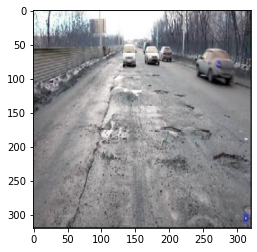

In [27]:
classes_names = ["포트홀 없음", "포트홀", "보수 완료된 포트홀"]
train_data = pd.read_csv("Train_datasets_labels.csv")
validation_data = pd.read_csv("Validation_datasets_labels.csv")

id = 10151
src = cv2.imread(train_data["file_path"][id], cv2.IMREAD_COLOR)
print(classes_names[train_data["label"][id]])
plt.imshow(src)
plt.show()

포트홀


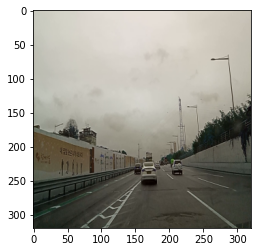

In [3]:
id = 131
src = cv2.imread(validation_data["file_path"][id], cv2.IMREAD_COLOR)
print(classes_names[validation_data["label"][id]])
plt.imshow(src)
plt.show()

# 데이터 Load
## Traing Data와 Validation Data 설정 1

In [47]:
seed = 7

classes_names = ["포트홀 없음", "포트홀", "보수 완료된 포트홀"]
train_data = pd.read_csv("Train_datasets_labels.csv")
validation_data = pd.read_csv("Validation_datasets_labels.csv")


train_data = train_data.sample(frac=1, random_state=seed).reset_index(drop=True)
validation_data = validation_data.sample(frac=1, random_state=seed).reset_index(drop=True)

print(len(train_data))
print(len(validation_data))

validation_data

23389
300


,file_path,label
0,Datasets_Validation/Image_255.png,2
1,Datasets_Validation/Image_58.png,0
2,Datasets_Validation/Image_151.png,1
3,Datasets_Validation/Image_67.png,0
4,Datasets_Validation/Image_115.png,1
...,...,...
295,Datasets_Validation/Image_212.png,2
296,Datasets_Validation/Image_68.png,0
297,Datasets_Validation/Image_26.png,0
298,Datasets_Validation/Image_197.png,1


In [48]:
import torch
from torch.utils.data import DataLoader, Dataset

In [52]:
class MyDataset(Dataset):
    def __init__(self, df):
        super(MyDataset, self).__init__()
        self.df = df
        
    def __len__(self):
        return len(self.df)
    
    def __getItem__(self, idx):
        file_path = self.df.iloc[idx][0]
        img = np.array(PIL.Image.open(train_data.iloc[idx][0])) / 255.
        
        x = torch.tensor(img).unsqueeze(0)
        y = torch.tensor([train_data.iloc[idx][1]]).unsqueeze(0)
        
        return x, y

In [53]:
train = MyDataset(train_data)

In [55]:
train.__getItem__(103)

(tensor([[[[0.2902, 0.2902, 0.2706],
           [0.2627, 0.2784, 0.2627],
           [0.2784, 0.2980, 0.2902],
           ...,
           [0.2863, 0.2824, 0.2588],
           [0.3765, 0.3647, 0.3137],
           [0.1412, 0.1333, 0.1216]],
 
          [[0.3020, 0.3020, 0.2784],
           [0.2941, 0.3098, 0.2980],
           [0.3020, 0.3216, 0.3137],
           ...,
           [0.2902, 0.2863, 0.2549],
           [0.4000, 0.3843, 0.3373],
           [0.2039, 0.1882, 0.1725]],
 
          [[0.3059, 0.3098, 0.2863],
           [0.3059, 0.3176, 0.3059],
           [0.3098, 0.3294, 0.3216],
           ...,
           [0.4118, 0.4078, 0.3725],
           [0.3961, 0.3804, 0.3373],
           [0.1804, 0.1647, 0.1412]],
 
          ...,
 
          [[0.1922, 0.2078, 0.2157],
           [0.1922, 0.2078, 0.2118],
           [0.1922, 0.2078, 0.2118],
           ...,
           [0.1451, 0.1608, 0.1765],
           [0.1451, 0.1608, 0.1765],
           [0.1451, 0.1608, 0.1765]],
 
          [[0.1882,